In [1]:
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.ndimage.interpolation import shift
from sklearn import preprocessing

from ssqueezepy.visuals import plot, imshow

import nbimporter
from lib import *

import gym
import gym_env
from stable_baselines3 import TD3, A2C, DDPG, SAC, PPO, HerReplayBuffer
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common import results_plotter

from torch.nn import functional as F
import torch as th

In [2]:
algorithms = {
    "td3" : TD3,
    "a2c" : A2C,
    "ddpg" : DDPG,
    "sac" : SAC,
    "ppo" : PPO,
}

# Data settings and gathering

In [3]:
step = 40
row_length = 40
columns = ["B1_temp"]

X, original_data = get_data(columns, step, row_length)
data = original_data[:110000].reshape((110000,))

# Reward Calculation

0 	 (0.6781577, 0.38299122) 	 0.47 	 0.900036 	-1.00
1 	 (0.15263605, 0.047230244) 	 0.47 	 0.000000 	-1.00
2 	 (0.23750836, 0.86511993) 	 0.47 	 0.444618 	-1.00
3 	 (0.14250964, 0.98412746) 	 0.47 	 0.383384 	-1.00
4 	 (0.46071944, 0.21383709) 	 0.47 	 1.863399 	-1.00
5 	 (0.79159784, 0.12542206) 	 0.47 	 0.121744 	-1.00
6 	 (0.48674884, 0.7556348) 	 0.47 	 0.527845 	-1.00
7 	 (0.51723707, 0.2273263) 	 0.47 	 1.719305 	-1.00
8 	 (0.22211233, 0.81523997) 	 0.47 	 0.467040 	-1.00
9 	 (0.042482585, 0.09991902) 	 0.47 	 0.000402 	-1.00
10 	 (0.6739192, 0.44455) 	 0.47 	 0.808785 	-1.00
11 	 (0.41131228, 0.7276923) 	 0.47 	 0.546376 	-1.00
12 	 (0.8957558, 0.3454968) 	 0.47 	 0.542705 	-1.00
13 	 (0.0612593, 0.1229907) 	 0.53 	 0.002519 	-1.00
14 	 (0.78014195, 0.896349) 	 0.53 	 0.427634 	-1.00
15 	 (0.7757444, 0.93273556) 	 0.47 	 0.405534 	-1.00
16 	 (0.34024268, 0.6363392) 	 0.47 	 0.613764 	-1.00
17 	 (0.07296184, 0.39807048) 	 0.47 	 0.607379 	-1.00
18 	 (0.28155226, 0.6080583) 	 0.4

178 	 (0.48024964, 0.2010706) 	 0.47 	 1.982387 	-1.00
179 	 (0.18923685, 0.9245641) 	 0.47 	 0.411775 	-1.00
180 	 (0.19393066, 0.924808) 	 0.47 	 0.412324 	-1.00
181 	 (0.2696916, 0.5834738) 	 0.47 	 0.643847 	-1.00
182 	 (0.71616197, 0.73731625) 	 0.47 	 0.512205 	-1.00
183 	 (0.043581367, 0.6058652) 	 0.47 	 0.512821 	-1.00
184 	 (0.21404576, 0.8064284) 	 0.47 	 0.470034 	-1.00
185 	 (0.20583218, 0.47392002) 	 0.47 	 0.718942 	-1.00
186 	 (0.34751812, 0.6186428) 	 0.47 	 0.631937 	-1.00
187 	 (0.27976397, 0.8182597) 	 0.47 	 0.474277 	-1.00
188 	 (0.6118897, 0.99506485) 	 0.47 	 0.396979 	-1.00
189 	 (0.49057993, 0.81351894) 	 0.47 	 0.490263 	-1.00
190 	 (0.47811615, 0.38306877) 	 0.47 	 1.041304 	-1.00
191 	 (0.6888244, 0.5982973) 	 0.47 	 0.624441 	-1.00
192 	 (0.9020703, 0.68279403) 	 0.47 	 0.479178 	-1.00
193 	 (0.49279493, 0.016542941) 	 0.47 	 10.929705 	1.00
194 	 (0.7573809, 0.33897868) 	 0.47 	 0.825817 	-1.00
195 	 (0.33422887, 0.15889665) 	 0.47 	 1.723583 	-1.00
196 	

413 	 (0.016023666, 0.14102471) 	 0.47 	 0.015159 	-1.00
414 	 (0.075339526, 0.13944209) 	 0.47 	 0.049997 	-1.00
415 	 (0.8422866, 0.5723922) 	 0.47 	 0.565413 	-1.00
416 	 (0.31476685, 0.17398351) 	 0.47 	 1.523981 	-1.00
417 	 (0.3566789, 0.14548683) 	 0.47 	 2.002506 	-1.00
418 	 (0.93155086, 0.7240501) 	 0.47 	 0.450470 	-1.00
419 	 (0.5690686, 0.93767834) 	 0.47 	 0.423184 	-1.00
420 	 (0.9467539, 0.55625266) 	 0.47 	 0.498328 	-1.00
421 	 (0.40971237, 0.95505345) 	 0.47 	 0.416827 	-1.00
422 	 (0.22615552, 0.17498413) 	 0.47 	 0.848716 	-1.00
423 	 (0.40390766, 0.016605467) 	 0.47 	 0.005253 	-1.00
424 	 (0.12354186, 0.059403002) 	 0.47 	 0.000000 	-1.00
425 	 (0.8929129, 0.8284752) 	 0.47 	 0.423264 	-1.00
426 	 (0.99131167, 0.58519197) 	 0.47 	 0.459896 	-1.00
427 	 (0.39270666, 0.91509414) 	 0.47 	 0.434321 	-1.00
428 	 (0.72523546, 0.029049933) 	 0.47 	 0.000000 	-1.00
429 	 (0.2681561, 0.29134694) 	 0.47 	 1.071887 	-1.00
430 	 (0.54941803, 0.97304314) 	 0.47 	 0.408699 	-1

702 	 (0.6981465, 0.5322735) 	 0.48 	 0.687981 	-1.00
703 	 (0.54942125, 0.43641272) 	 0.48 	 0.901926 	-1.00
704 	 (0.84256, 0.94795275) 	 0.48 	 0.390831 	-1.00
705 	 (0.35937086, 0.32256737) 	 0.48 	 1.156041 	-1.00
706 	 (0.075347364, 0.84985346) 	 0.48 	 0.419604 	-1.00
707 	 (0.55007595, 0.16173774) 	 0.48 	 2.232990 	-1.00
708 	 (0.93605244, 0.18191355) 	 0.48 	 0.091928 	-1.00
709 	 (0.65520835, 0.20355296) 	 0.48 	 1.340894 	-1.00
710 	 (0.97056556, 0.6786479) 	 0.48 	 0.451681 	-1.00
711 	 (0.56136584, 0.8187743) 	 0.48 	 0.484716 	-1.00
712 	 (0.97572565, 0.18486068) 	 0.48 	 0.057485 	-1.00
713 	 (0.5696906, 0.5892104) 	 0.48 	 0.668921 	-1.00
714 	 (0.6546727, 0.6181667) 	 0.48 	 0.619502 	-1.00
715 	 (0.8796544, 0.64453965) 	 0.48 	 0.509662 	-1.00
716 	 (0.27871025, 0.2500731) 	 0.48 	 1.161734 	-1.00
717 	 (0.6300692, 0.85015976) 	 0.48 	 0.461801 	-1.00
718 	 (0.27963048, 0.5289794) 	 0.48 	 0.703003 	-1.00
719 	 (0.18759614, 0.4645924) 	 0.48 	 0.706348 	-1.00
720 	 (

949 	 (0.9671735, 0.4234484) 	 0.48 	 0.482371 	-1.00
950 	 (0.83381516, 0.9104092) 	 0.48 	 0.405839 	-1.00
951 	 (0.04573828, 0.52050096) 	 0.48 	 0.543609 	-1.00
952 	 (0.6197171, 0.7829539) 	 0.48 	 0.501154 	-1.00
953 	 (0.68983, 0.6370205) 	 0.48 	 0.592305 	-1.00
954 	 (0.40587673, 0.63987905) 	 0.48 	 0.619618 	-1.00
955 	 (0.80504763, 0.4876907) 	 0.48 	 0.652465 	-1.00
956 	 (0.8031432, 0.38390887) 	 0.48 	 0.724601 	-1.00
957 	 (0.44585043, 0.62239325) 	 0.48 	 0.640172 	-1.00
958 	 (0.37606385, 0.9686374) 	 0.48 	 0.409620 	-1.00
959 	 (0.5814918, 0.111733735) 	 0.48 	 2.307156 	-1.00
960 	 (0.2735027, 0.9786707) 	 0.48 	 0.398913 	-1.00
961 	 (0.81866765, 0.84660417) 	 0.48 	 0.434381 	-1.00
962 	 (0.66764885, 0.72496724) 	 0.48 	 0.531601 	-1.00
963 	 (0.18789649, 0.8273384) 	 0.48 	 0.453627 	-1.00
964 	 (0.05218032, 0.24841791) 	 0.48 	 0.372114 	-1.00
965 	 (0.47522768, 0.37625998) 	 0.48 	 1.060272 	-1.00
966 	 (0.6004667, 0.79103965) 	 0.48 	 0.498218 	-1.00
967 	 (0

1220 	 (0.31233865, 0.73637396) 	 0.48 	 0.528509 	-1.00
1221 	 (0.4246479, 0.98436046) 	 0.48 	 0.404723 	-1.00
1222 	 (0.2470069, 0.21820176) 	 0.48 	 1.052940 	-1.00
1223 	 (0.98900455, 0.70583546) 	 0.48 	 0.434115 	-1.00
1224 	 (0.41472086, 0.1924119) 	 0.48 	 1.969916 	-1.00
1225 	 (0.8440131, 0.3866205) 	 0.48 	 0.656420 	-1.00
1226 	 (0.6075119, 0.6180322) 	 0.48 	 0.631109 	-1.00
1227 	 (0.114263296, 0.554434) 	 0.48 	 0.581428 	-1.00
1228 	 (0.814823, 0.97321206) 	 0.48 	 0.385864 	-1.00
1229 	 (0.8187043, 0.649307) 	 0.48 	 0.534672 	-1.00
1230 	 (0.46669602, 0.26350686) 	 0.48 	 1.512971 	-1.00
1231 	 (0.13090241, 0.59339386) 	 0.48 	 0.567548 	-1.00
1232 	 (0.4151527, 0.5687796) 	 0.48 	 0.697367 	-1.00
1233 	 (0.66716284, 0.7665268) 	 0.48 	 0.504563 	-1.00
1234 	 (0.7033276, 0.6088146) 	 0.48 	 0.611253 	-1.00
1235 	 (0.057765365, 0.65877616) 	 0.48 	 0.494891 	-1.00
1236 	 (0.16258946, 0.9842003) 	 0.48 	 0.385275 	-1.00
1237 	 (0.8730016, 0.041314006) 	 0.48 	 0.000000

1498 	 (0.8696216, 0.41688836) 	 0.48 	 0.614199 	-1.00
1499 	 (0.17878217, 0.58106345) 	 0.48 	 0.601840 	-1.00
1500 	 (0.8064204, 0.27352068) 	 0.48 	 0.706089 	-1.00
1501 	 (0.78401935, 0.9697066) 	 0.48 	 0.391288 	-1.00
1502 	 (0.29945523, 0.111377835) 	 0.48 	 1.006251 	-1.00
1503 	 (0.43518135, 0.77882415) 	 0.48 	 0.511501 	-1.00
1504 	 (0.7002789, 0.45050782) 	 0.48 	 0.783111 	-1.00
1505 	 (0.08953294, 0.44173232) 	 0.48 	 0.614837 	-1.00
1506 	 (0.21773583, 0.203527) 	 0.48 	 0.870868 	-1.00
1507 	 (0.42634693, 0.04620576) 	 0.48 	 4.735574 	-1.00
1508 	 (0.890111, 0.62220544) 	 0.48 	 0.514373 	-1.00
1509 	 (0.43401262, 0.6491582) 	 0.48 	 0.613210 	-1.00
1510 	 (0.21823823, 0.4047938) 	 0.48 	 0.803478 	-1.00
1511 	 (0.21191281, 0.5235867) 	 0.48 	 0.670261 	-1.00
1512 	 (0.061235428, 0.59055996) 	 0.48 	 0.527281 	-1.00
1513 	 (0.26439437, 0.31373745) 	 0.48 	 1.010808 	-1.00
1514 	 (0.37737346, 0.5772989) 	 0.48 	 0.680838 	-1.00
1515 	 (0.7001168, 0.44884983) 	 0.48 	 0

1759 	 (0.82932025, 0.30196387) 	 0.48 	 0.665775 	-1.00
1760 	 (0.085375845, 0.1152564) 	 0.48 	 0.011146 	-1.00
1761 	 (0.28346032, 0.119265735) 	 0.48 	 0.910842 	-1.00
1762 	 (0.7875565, 0.20806482) 	 0.48 	 0.624317 	-1.00
1763 	 (0.45600495, 0.23533869) 	 0.48 	 1.689157 	-1.00
1764 	 (0.18940198, 0.5563367) 	 0.48 	 0.628106 	-1.00
1765 	 (0.37414283, 0.32706383) 	 0.48 	 1.162250 	-1.00
1766 	 (0.06072676, 0.41848704) 	 0.48 	 0.582920 	-1.00
1767 	 (0.57257974, 0.6031615) 	 0.48 	 0.652947 	-1.00
1768 	 (0.99297136, 0.730662) 	 0.48 	 0.425014 	-1.00
1769 	 (0.6008378, 0.83457327) 	 0.48 	 0.472684 	-1.00
1770 	 (0.067726254, 0.40735617) 	 0.48 	 0.593128 	-1.00
1771 	 (0.17598885, 0.2803126) 	 0.48 	 0.803627 	-1.00
1772 	 (0.38366288, 0.25851816) 	 0.48 	 1.448526 	-1.00
1773 	 (0.364866, 0.26300782) 	 0.48 	 1.388080 	-1.00
1774 	 (0.13349617, 0.20445019) 	 0.48 	 0.481214 	-1.00
1775 	 (0.32208544, 0.2352969) 	 0.48 	 1.370451 	-1.00
1776 	 (0.057061493, 0.2253123) 	 0.48 

2046 	 (0.62339693, 0.99938667) 	 0.47 	 0.394796 	-1.00
2047 	 (0.61834705, 0.99913734) 	 0.47 	 0.395184 	-1.00
2048 	 (0.48990414, 0.6492376) 	 0.47 	 0.614310 	-1.00
2049 	 (0.3882038, 0.14798653) 	 0.47 	 2.272251 	-1.00
2050 	 (0.23218274, 0.3366369) 	 0.47 	 0.914164 	-1.00
2051 	 (0.17268533, 0.11969522) 	 0.47 	 0.138070 	-1.00
2052 	 (0.7261914, 0.7541662) 	 0.47 	 0.500382 	-1.00
2053 	 (0.8152784, 0.0890868) 	 0.47 	 0.003004 	-1.00
2054 	 (0.18200749, 0.42438215) 	 0.47 	 0.741060 	-1.00
2055 	 (0.035093278, 0.6029562) 	 0.47 	 0.507151 	-1.00
2056 	 (0.9089182, 0.74652255) 	 0.47 	 0.451273 	-1.00
2057 	 (0.94587016, 0.32459047) 	 0.47 	 0.428755 	-1.00
2058 	 (0.3382772, 0.44460183) 	 0.47 	 0.855983 	-1.00
2059 	 (0.53414017, 0.6350957) 	 0.47 	 0.625425 	-1.00
2060 	 (0.60561126, 0.74701303) 	 0.47 	 0.525934 	-1.00
2061 	 (0.12710118, 0.49675807) 	 0.47 	 0.628542 	-1.00
2062 	 (0.5993301, 0.15268922) 	 0.47 	 1.873322 	-1.00
2063 	 (0.7107992, 0.9669852) 	 0.47 	 0.4

2279 	 (0.1576674, 0.3114901) 	 0.47 	 0.782797 	-1.00
2280 	 (0.21552402, 0.7051575) 	 0.47 	 0.530652 	-1.00
2281 	 (0.505967, 0.7660855) 	 0.47 	 0.520112 	-1.00
2282 	 (0.14865392, 0.30445814) 	 0.47 	 0.759157 	-1.00
2283 	 (0.32702255, 0.9381065) 	 0.47 	 0.420424 	-1.00
2284 	 (0.7720299, 0.96314865) 	 0.47 	 0.394199 	-1.00
2285 	 (0.7424967, 0.6606385) 	 0.47 	 0.554514 	-1.00
2286 	 (0.06609407, 0.11446604) 	 0.47 	 0.006965 	-1.00
2287 	 (0.05492738, 0.10716635) 	 0.47 	 0.002036 	-1.00
2288 	 (0.34432322, 0.82419974) 	 0.47 	 0.478415 	-1.00
2289 	 (0.63317645, 0.7655171) 	 0.47 	 0.509550 	-1.00
2290 	 (0.936933, 0.9051789) 	 0.47 	 0.386006 	-1.00
2291 	 (0.003739804, 0.4560193) 	 0.47 	 0.517232 	-1.00
2292 	 (0.26202247, 0.39366105) 	 0.47 	 0.879913 	-1.00
2293 	 (0.23205304, 0.56681347) 	 0.47 	 0.643865 	-1.00
2294 	 (0.09816474, 0.52879834) 	 0.47 	 0.587814 	-1.00
2295 	 (0.74759465, 0.02323082) 	 0.47 	 0.000000 	-1.00
2296 	 (0.8524092, 0.57264864) 	 0.47 	 0.558

2567 	 (0.53729856, 0.6341896) 	 0.71 	 0.606870 	-1.00
2568 	 (0.015051812, 0.033332944) 	 0.71 	 0.000000 	-1.00
2569 	 (0.26857546, 0.7908343) 	 0.71 	 0.432498 	-1.00
2570 	 (0.5119049, 0.2918033) 	 0.71 	 1.092490 	-1.00
2571 	 (0.6724321, 0.627101) 	 0.71 	 0.635184 	-1.00
2572 	 (0.8109759, 0.32419977) 	 0.71 	 1.169422 	-1.00
2573 	 (0.42982653, 0.29785055) 	 0.71 	 0.867368 	-1.00
2574 	 (0.9943225, 0.0019757152) 	 0.71 	 0.000000 	-1.00
2575 	 (0.31503868, 0.45544413) 	 0.71 	 0.604209 	-1.00
2576 	 (0.47314742, 0.631712) 	 0.71 	 0.589516 	-1.00
2577 	 (0.29208967, 0.61539567) 	 0.71 	 0.516168 	-1.00
2578 	 (0.07188606, 0.43942058) 	 0.71 	 0.318815 	-1.00
2579 	 (0.17578447, 0.14497036) 	 0.71 	 0.003291 	-1.00
2580 	 (0.9338766, 0.6168361) 	 0.71 	 0.604667 	-1.00
2581 	 (0.74083656, 0.44053546) 	 0.71 	 0.903010 	-1.00
2582 	 (0.8555788, 0.10785478) 	 0.71 	 1.443849 	-1.00
2583 	 (0.9223176, 0.8582064) 	 0.71 	 0.450537 	-1.00
2584 	 (0.57987875, 0.9501864) 	 0.71 	 0.4

2800 	 (0.98722756, 0.49920264) 	 0.71 	 0.683347 	-1.00
2801 	 (0.7140149, 0.8690732) 	 0.71 	 0.459032 	-1.00
2802 	 (0.9848824, 0.606136) 	 0.71 	 0.592916 	-1.00
2803 	 (0.3580403, 0.5069857) 	 0.71 	 0.620173 	-1.00
2804 	 (0.23751798, 0.43887207) 	 0.71 	 0.511840 	-1.00
2805 	 (0.7754543, 0.7882021) 	 0.71 	 0.504286 	-1.00
2806 	 (0.12996864, 0.44597247) 	 0.71 	 0.386324 	-1.00
2807 	 (0.24330437, 0.10010016) 	 0.71 	 0.000084 	-1.00
2808 	 (0.2218523, 0.4598091) 	 0.71 	 0.496255 	-1.00
2809 	 (0.4377153, 0.78791094) 	 0.71 	 0.477420 	-1.00
2810 	 (0.77048624, 0.9525205) 	 0.71 	 0.417925 	-1.00
2811 	 (0.110249996, 0.94723815) 	 0.71 	 0.345152 	-1.00
2812 	 (0.38654843, 0.93289375) 	 0.71 	 0.403008 	-1.00
2813 	 (0.7123789, 0.8106174) 	 0.71 	 0.492139 	-1.00
2814 	 (0.550314, 0.07639843) 	 0.71 	 0.622368 	-1.00
2815 	 (0.7292793, 0.28546304) 	 1.00 	 0.891379 	-1.00
2816 	 (0.61275613, 0.94603187) 	 1.00 	 0.387811 	-1.00
2817 	 (0.70025927, 0.5784628) 	 1.00 	 0.603019

3091 	 (0.46578157, 0.16996217) 	 0.71 	 0.851003 	-1.00
3092 	 (0.4969511, 0.63195324) 	 0.71 	 0.597079 	-1.00
3093 	 (0.8147741, 0.58572763) 	 0.71 	 0.669859 	-1.00
3094 	 (0.62096554, 0.2967485) 	 0.71 	 1.287943 	-1.00
3095 	 (0.24932599, 0.7121609) 	 0.71 	 0.455302 	-1.00
3096 	 (0.87210315, 0.1325804) 	 0.71 	 1.397128 	-1.00
3097 	 (0.10642886, 0.12453535) 	 0.43 	 0.103132 	-1.00
3098 	 (0.77934426, 0.9485101) 	 0.71 	 0.419407 	-1.00
3099 	 (0.18109393, 0.4255369) 	 0.71 	 0.435699 	-1.00
3100 	 (0.5744287, 0.7924909) 	 0.71 	 0.496317 	-1.00
3101 	 (0.85552377, 0.45692027) 	 0.71 	 0.828695 	-1.00
3102 	 (0.9674759, 0.25988322) 	 0.43 	 0.185059 	-1.00
3103 	 (0.116253555, 0.49146786) 	 0.71 	 0.393323 	-1.00
3104 	 (0.18991145, 0.31860358) 	 0.71 	 0.333968 	-1.00
3105 	 (0.24950725, 0.0119313) 	 0.43 	 0.000000 	-1.00
3106 	 (0.51044416, 0.8128187) 	 0.43 	 0.488584 	-1.00
3107 	 (0.15270251, 0.9173377) 	 0.43 	 0.415071 	-1.00
3108 	 (0.69356716, 0.50454164) 	 0.43 	 0.

3315 	 (0.58449817, 0.83757013) 	 0.47 	 0.471620 	-1.00
3316 	 (0.2648789, 0.14794075) 	 0.47 	 1.062829 	-1.00
3317 	 (0.9080989, 0.45948958) 	 0.47 	 0.547398 	-1.00
3318 	 (0.4374714, 0.72634816) 	 0.47 	 0.548797 	-1.00
3319 	 (0.12834188, 0.9815653) 	 0.47 	 0.382980 	-1.00
3320 	 (0.42344686, 0.08309433) 	 0.47 	 4.192543 	-1.00
3321 	 (0.5491105, 0.3644921) 	 0.47 	 1.066900 	-1.00
3322 	 (0.21685636, 0.7396179) 	 0.47 	 0.509490 	-1.00
3323 	 (0.86439145, 0.9008918) 	 0.47 	 0.401714 	-1.00
3324 	 (0.107955575, 0.40118787) 	 0.47 	 0.666736 	-1.00
3325 	 (0.49384147, 0.5239443) 	 0.47 	 0.760402 	-1.00
3326 	 (0.7150206, 0.92153966) 	 0.47 	 0.417477 	-1.00
3327 	 (0.89112914, 0.8969202) 	 0.47 	 0.397673 	-1.00
3328 	 (0.781965, 0.25389758) 	 0.47 	 0.727068 	-1.00
3329 	 (0.7187453, 0.12734568) 	 0.47 	 0.442274 	-1.00
3330 	 (0.97092927, 0.83668864) 	 0.47 	 0.397659 	-1.00
3331 	 (0.7885833, 0.411575) 	 0.47 	 0.714037 	-1.00
3332 	 (0.8954402, 0.3726494) 	 0.47 	 0.552484

3560 	 (0.37293398, 0.052559853) 	 0.47 	 1.462620 	-1.00
3561 	 (0.25279152, 0.81245124) 	 0.47 	 0.474058 	-1.00
3562 	 (0.467631, 0.33546188) 	 0.47 	 1.189230 	-1.00
3563 	 (0.20116055, 0.92202795) 	 0.47 	 0.414890 	-1.00
3564 	 (0.02843973, 0.33857968) 	 0.47 	 0.506646 	-1.00
3565 	 (0.42546487, 0.13939124) 	 0.47 	 2.730442 	-1.00
3566 	 (0.39367267, 0.5454628) 	 0.47 	 0.724579 	-1.00
3567 	 (0.9624858, 0.34387892) 	 0.47 	 0.413002 	-1.00
3568 	 (0.6898822, 0.98998255) 	 0.47 	 0.393006 	-1.00
3569 	 (0.44790402, 0.15404886) 	 0.47 	 2.567409 	-1.00
3570 	 (0.08268565, 0.5772343) 	 0.47 	 0.552991 	-1.00
3571 	 (0.9691172, 0.6946117) 	 0.47 	 0.442856 	-1.00
3572 	 (0.6928353, 0.54134357) 	 0.47 	 0.676155 	-1.00
3573 	 (0.6314179, 0.88437456) 	 0.47 	 0.443483 	-1.00
3574 	 (0.9536156, 0.63441133) 	 0.47 	 0.469267 	-1.00
3575 	 (0.41237232, 0.9880302) 	 0.47 	 0.403131 	-1.00
3576 	 (0.6177316, 0.9964625) 	 0.47 	 0.395878 	-1.00
3577 	 (0.41157615, 0.32020503) 	 0.47 	 1.2

3728 	 (0.048812687, 0.16263151) 	 0.47 	 0.087590 	-1.00
3729 	 (0.86588335, 0.12949044) 	 0.47 	 0.027885 	-1.00
3730 	 (0.49300903, 0.29031503) 	 0.47 	 1.369335 	-1.00
3731 	 (0.1879875, 0.72406) 	 0.47 	 0.511108 	-1.00
3732 	 (0.49583584, 0.01066187) 	 0.47 	 1.427018 	-1.00
3733 	 (0.66511256, 0.38585344) 	 0.47 	 0.908145 	-1.00
3734 	 (0.4886408, 0.19910449) 	 0.47 	 1.993610 	-1.00
3735 	 (0.35258567, 0.40585482) 	 0.47 	 0.943583 	-1.00
3736 	 (0.7554872, 0.42795292) 	 0.47 	 0.744669 	-1.00
3737 	 (0.74562764, 0.35008454) 	 0.47 	 0.833261 	-1.00
3738 	 (0.63690156, 0.85446453) 	 0.47 	 0.457927 	-1.00
3739 	 (0.5564066, 0.2739125) 	 0.47 	 1.383597 	-1.00
3740 	 (0.7686418, 0.016942859) 	 0.47 	 0.000000 	-1.00
3741 	 (0.5873481, 0.46536347) 	 0.47 	 0.829848 	-1.00
3742 	 (0.6240579, 0.924179) 	 0.47 	 0.425611 	-1.00
3743 	 (0.97795886, 0.53646797) 	 0.47 	 0.473846 	-1.00
3744 	 (0.30142376, 0.5294203) 	 0.47 	 0.716897 	-1.00
3745 	 (0.3721851, 0.979198) 	 0.47 	 0.405

3958 	 (0.91531193, 0.93921685) 	 0.47 	 0.379505 	-1.00
3959 	 (0.6173867, 0.5892017) 	 0.47 	 0.656110 	-1.00
3960 	 (0.08308494, 0.8902808) 	 0.47 	 0.407815 	-1.00
3961 	 (0.8221218, 0.40211242) 	 0.47 	 0.675310 	-1.00
3962 	 (0.106407344, 0.69047016) 	 0.47 	 0.503203 	-1.00
3963 	 (0.62971896, 0.55087125) 	 0.47 	 0.694200 	-1.00
3964 	 (0.40511835, 0.9749772) 	 0.47 	 0.408291 	-1.00
3965 	 (0.95234483, 0.6818277) 	 0.47 	 0.455304 	-1.00
3966 	 (0.7823973, 0.9687487) 	 0.47 	 0.390872 	-1.00
3967 	 (0.19594026, 0.82765174) 	 0.47 	 0.456417 	-1.00
3968 	 (0.35820323, 0.6658034) 	 0.47 	 0.590868 	-1.00
3969 	 (0.4309258, 0.45443848) 	 0.47 	 0.874752 	-1.00
3970 	 (0.6271917, 0.6223696) 	 0.47 	 0.620711 	-1.00
3971 	 (0.016049057, 0.77294934) 	 0.47 	 0.434606 	-1.00
3972 	 (0.28875813, 0.8678336) 	 0.47 	 0.449856 	-1.00
3973 	 (0.5383974, 0.3163972) 	 0.47 	 1.231196 	-1.00
3974 	 (0.12583745, 0.8180157) 	 0.47 	 0.446557 	-1.00
3975 	 (0.46953845, 0.42413566) 	 0.47 	 0.94

4232 	 (0.17311746, 0.14148536) 	 0.53 	 0.114838 	-1.00
4233 	 (0.2039643, 0.12184572) 	 0.47 	 0.283439 	-1.00
4234 	 (0.19703084, 0.7804961) 	 0.47 	 0.480056 	-1.00
4235 	 (0.15368855, 0.13740206) 	 0.47 	 0.193186 	-1.00
4236 	 (0.30524868, 0.26179343) 	 0.47 	 1.239314 	-1.00
4237 	 (0.10657078, 0.17461783) 	 0.47 	 0.250811 	-1.00
4238 	 (0.60178125, 0.7827694) 	 0.47 	 0.502870 	-1.00
4239 	 (0.17357036, 0.8160789) 	 0.47 	 0.456891 	-1.00
4240 	 (0.44839475, 0.74899036) 	 0.47 	 0.532337 	-1.00
4241 	 (0.93472576, 0.7258895) 	 0.47 	 0.449178 	-1.00
4242 	 (0.29888272, 0.06616774) 	 0.47 	 0.184553 	-1.00
4243 	 (0.8642667, 0.1159296) 	 0.47 	 0.011773 	-1.00
4244 	 (0.93836784, 0.32556593) 	 0.53 	 0.561248 	-1.00
4245 	 (0.8771879, 0.5330173) 	 0.53 	 0.606515 	-1.00
4246 	 (0.7890148, 0.89673877) 	 0.47 	 0.418196 	-1.00
4247 	 (0.00072708726, 0.5369866) 	 0.47 	 0.504141 	-1.00
4248 	 (0.63546777, 0.4078687) 	 0.47 	 0.904093 	-1.00
4249 	 (0.6556778, 0.85596156) 	 0.47 	 

4473 	 (0.14573374, 0.5753551) 	 0.48 	 0.588239 	-1.00
4474 	 (0.7748983, 0.82375675) 	 0.48 	 0.453382 	-1.00
4475 	 (0.040788054, 0.9690213) 	 0.48 	 0.372242 	-1.00
4476 	 (0.7092694, 0.2905865) 	 0.48 	 0.994035 	-1.00
4477 	 (0.8343147, 0.9210429) 	 0.48 	 0.401540 	-1.00
4478 	 (0.9463549, 0.99989516) 	 0.48 	 0.357161 	-1.00
4479 	 (0.8143523, 0.75466305) 	 0.48 	 0.478039 	-1.00
4480 	 (0.79320335, 0.53901124) 	 0.48 	 0.622344 	-1.00
4481 	 (0.8949419, 0.6461452) 	 0.54 	 0.529102 	-1.00
4482 	 (0.5998872, 0.55708694) 	 0.54 	 0.711417 	-1.00
4483 	 (0.26812357, 0.19661969) 	 0.48 	 1.160268 	-1.00
4484 	 (0.13879204, 0.34535533) 	 0.48 	 0.717439 	-1.00
4485 	 (0.8127854, 0.016477853) 	 0.48 	 0.000000 	-1.00
4486 	 (0.33718997, 0.41215903) 	 0.48 	 0.914553 	-1.00
4487 	 (0.34856132, 0.1328485) 	 0.48 	 1.895294 	-1.00
4488 	 (0.5229447, 0.42258307) 	 0.48 	 0.938253 	-1.00
4489 	 (0.798134, 0.46216154) 	 0.48 	 0.677066 	-1.00
4490 	 (0.15318626, 0.19996557) 	 0.48 	 0.541

4753 	 (0.29282677, 0.36791137) 	 0.48 	 0.957945 	-1.00
4754 	 (0.3616626, 0.98296356) 	 0.54 	 0.399509 	-1.00
4755 	 (0.8628309, 0.7191517) 	 0.54 	 0.500375 	-1.00
4756 	 (0.748793, 0.6432449) 	 0.48 	 0.566840 	-1.00
4757 	 (0.11339122, 0.75417835) 	 0.48 	 0.471266 	-1.00
4758 	 (0.640234, 0.6192224) 	 0.48 	 0.621970 	-1.00
4759 	 (0.4305206, 0.124635756) 	 0.48 	 2.995139 	-1.00
4760 	 (0.93319845, 0.39903843) 	 0.48 	 0.518531 	-1.00
4761 	 (0.5356376, 0.65964997) 	 0.48 	 0.602309 	-1.00
4762 	 (0.25857666, 0.43497646) 	 0.48 	 0.809480 	-1.00
4763 	 (0.8117516, 0.14350039) 	 0.48 	 0.179680 	-1.00
4764 	 (0.46728483, 0.36420408) 	 0.48 	 1.095076 	-1.00
4765 	 (0.22554606, 0.90556777) 	 0.48 	 0.424037 	-1.00
4766 	 (0.2323291, 0.54239446) 	 0.48 	 0.665020 	-1.00
4767 	 (0.45235604, 0.43893674) 	 0.54 	 0.892535 	-1.00
4768 	 (0.95746976, 0.99609596) 	 0.54 	 0.366210 	-1.00
4769 	 (0.08606458, 0.3764956) 	 0.48 	 0.620129 	-1.00
4770 	 (0.9862481, 0.06342837) 	 0.48 	 0.00

4986 	 (0.8208378, 0.4480829) 	 0.47 	 0.660321 	-1.00
4987 	 (0.32619536, 0.061662644) 	 0.47 	 0.360015 	-1.00
4988 	 (0.85079426, 0.02092424) 	 0.53 	 0.000000 	-1.00
4989 	 (0.5402497, 0.22113079) 	 0.53 	 1.803169 	-1.00
4990 	 (0.9621115, 0.70005435) 	 0.47 	 0.447069 	-1.00
4991 	 (0.8257585, 0.4284378) 	 0.47 	 0.665298 	-1.00
4992 	 (0.33795425, 0.842248) 	 0.47 	 0.467485 	-1.00
4993 	 (0.22328451, 0.05580309) 	 0.47 	 0.000288 	-1.00
4994 	 (0.8536618, 0.15440404) 	 0.47 	 0.126361 	-1.00
4995 	 (0.4352183, 0.35882258) 	 0.47 	 1.105209 	-1.00
4996 	 (0.6406515, 0.49519733) 	 0.47 	 0.761464 	-1.00
4997 	 (0.87303764, 0.72633356) 	 0.47 	 0.472463 	-1.00
4998 	 (0.755457, 0.2854606) 	 0.47 	 0.860756 	-1.00
4999 	 (0.67991227, 0.33287418) 	 0.47 	 0.990410 	-1.00
Num timesteps: 5000
Best mean reward: -98.90 - Last mean reward per episode: -99.18
5000 	 (0.010332465, 0.10458872) 	 0.47 	 0.000203 	-1.00
5001 	 (0.15920717, 0.47302145) 	 0.53 	 0.617339 	-1.00
5002 	 (0.214601

5271 	 (0.45064119, 0.35646364) 	 0.47 	 1.117019 	-1.00
5272 	 (0.24382618, 0.2904309) 	 0.47 	 1.006637 	-1.00
5273 	 (0.74201006, 0.62725437) 	 0.47 	 0.580060 	-1.00
5274 	 (0.59139127, 0.7876602) 	 0.53 	 0.504937 	-1.00
5275 	 (0.3057215, 0.7740768) 	 0.53 	 0.494257 	-1.00
5276 	 (0.8321491, 0.22261363) 	 0.47 	 0.486836 	-1.00
5277 	 (0.89498407, 0.31835574) 	 0.47 	 0.520065 	-1.00
5278 	 (0.4467354, 0.9141003) 	 0.47 	 0.436255 	-1.00
5279 	 (0.49910805, 0.66161084) 	 0.47 	 0.602507 	-1.00
5280 	 (0.007373482, 0.20543402) 	 0.47 	 0.149294 	-1.00
5281 	 (0.23208958, 0.31355074) 	 0.47 	 0.947829 	-1.00
5282 	 (0.043929428, 0.68814415) 	 0.47 	 0.477448 	-1.00
5283 	 (0.56612056, 0.20651492) 	 0.47 	 1.744233 	-1.00
5284 	 (0.34714907, 0.37332293) 	 0.47 	 1.009792 	-1.00
5285 	 (0.6420597, 0.5881587) 	 0.47 	 0.650730 	-1.00
5286 	 (0.99118894, 0.37001675) 	 0.47 	 0.403865 	-1.00
5287 	 (0.35684186, 0.23865458) 	 0.53 	 1.286173 	-1.00
5288 	 (0.61960524, 0.69890577) 	 0.53

5506 	 (0.5055093, 0.59053296) 	 0.47 	 0.674475 	-1.00
5507 	 (0.20685643, 0.27472576) 	 0.47 	 0.911535 	-1.00
5508 	 (0.40707988, 0.6232805) 	 0.53 	 0.628103 	-1.00
5509 	 (0.14784062, 0.10615495) 	 0.53 	 0.006132 	-1.00
5510 	 (0.53293467, 0.37533584) 	 0.47 	 1.048964 	-1.00
5511 	 (0.51923513, 0.1596204) 	 0.47 	 2.392097 	-1.00
5512 	 (0.89021194, 0.23956811) 	 0.47 	 0.362769 	-1.00
5513 	 (0.24866766, 0.42907578) 	 0.47 	 0.811935 	-1.00
5514 	 (0.63162696, 0.42600995) 	 0.47 	 0.873014 	-1.00
5515 	 (0.82485515, 0.97636557) 	 0.47 	 0.382785 	-1.00
5516 	 (0.9930905, 0.8183427) 	 0.47 	 0.398078 	-1.00
5517 	 (0.66303164, 0.58848095) 	 0.47 	 0.643154 	-1.00
5518 	 (0.51318234, 0.34507626) 	 0.47 	 1.147928 	-1.00
5519 	 (0.7573817, 0.68320304) 	 0.47 	 0.535162 	-1.00
5520 	 (0.26003402, 0.15007603) 	 0.47 	 0.979986 	-1.00
5521 	 (0.5987137, 0.9936186) 	 0.53 	 0.400499 	-1.00
5522 	 (0.8056566, 0.7815677) 	 0.53 	 0.479296 	-1.00
5523 	 (0.3958362, 0.30282694) 	 0.47 	 1

5793 	 (0.033827394, 0.18815738) 	 0.47 	 0.142058 	-1.00
5794 	 (0.036901295, 0.5684725) 	 0.53 	 0.484052 	-1.00
5795 	 (0.4933569, 0.0397487) 	 0.53 	 7.035568 	0.00
5796 	 (0.45805117, 0.7930524) 	 0.47 	 0.502977 	-1.00
5797 	 (0.043752044, 0.49722388) 	 0.47 	 0.554380 	-1.00
5798 	 (0.10252392, 0.117979646) 	 0.47 	 0.025558 	-1.00
5799 	 (0.6730771, 0.43667126) 	 0.47 	 0.821145 	-1.00
5800 	 (0.9581916, 0.6341249) 	 0.47 	 0.468545 	-1.00
5801 	 (0.517651, 0.041760236) 	 0.47 	 5.177667 	0.00
5802 	 (0.74425924, 0.50146544) 	 0.47 	 0.686108 	-1.00
5803 	 (0.4938014, 0.6239785) 	 0.47 	 0.638944 	-1.00
5804 	 (0.97075397, 0.16037011) 	 0.47 	 0.019555 	-1.00
5805 	 (0.86092, 0.5535313) 	 0.47 	 0.562755 	-1.00
5806 	 (0.6210432, 0.95294327) 	 0.47 	 0.413522 	-1.00
5807 	 (0.90100145, 0.36976963) 	 0.53 	 0.646946 	-1.00
5808 	 (0.036618352, 0.18113631) 	 0.53 	 0.056389 	-1.00
5809 	 (0.86966723, 0.015865564) 	 0.47 	 0.000000 	-1.00
5810 	 (0.9255396, 0.14553058) 	 0.47 	 0.

6031 	 (0.5132311, 0.73555255) 	 0.47 	 0.541496 	-1.00
6032 	 (0.64765567, 0.8595445) 	 0.47 	 0.454479 	-1.00
6033 	 (0.89306617, 0.1840469) 	 0.47 	 0.157057 	-1.00
6034 	 (0.13776517, 0.7400448) 	 0.47 	 0.486993 	-1.00
6035 	 (0.8173591, 0.9682517) 	 0.47 	 0.386537 	-1.00
6036 	 (0.11661184, 0.12527049) 	 0.47 	 0.057783 	-1.00
6037 	 (0.5307539, 0.16076285) 	 0.48 	 2.345358 	-1.00
6038 	 (0.3186428, 0.30257848) 	 0.48 	 1.150248 	-1.00
6039 	 (0.7521344, 0.9138532) 	 0.48 	 0.417045 	-1.00
6040 	 (0.64073586, 0.34740812) 	 0.48 	 1.025995 	-1.00
6041 	 (0.83800304, 0.17732525) 	 0.53 	 0.501320 	-1.00
6042 	 (0.011859924, 0.9611815) 	 0.53 	 0.358778 	-1.00
6043 	 (0.11276677, 0.83894384) 	 0.47 	 0.433293 	-1.00
6044 	 (0.9148334, 0.44961184) 	 0.48 	 0.549955 	-1.00
6045 	 (0.046536386, 0.5098164) 	 0.48 	 0.549637 	-1.00
6046 	 (0.68317103, 0.33955327) 	 0.47 	 0.972072 	-1.00
6047 	 (0.2762574, 0.17592996) 	 0.47 	 1.204732 	-1.00
6048 	 (0.5749258, 0.38969448) 	 0.47 	 0.9

6313 	 (0.945612, 0.4782778) 	 0.47 	 0.510147 	-1.00
6314 	 (0.86382276, 0.42453298) 	 0.53 	 0.685693 	-1.00
6315 	 (0.03152567, 0.54226303) 	 0.53 	 0.484809 	-1.00
6316 	 (0.9503671, 0.7264043) 	 0.47 	 0.441892 	-1.00
6317 	 (0.9277151, 0.8728935) 	 0.47 	 0.398639 	-1.00
6318 	 (0.21727878, 0.57952744) 	 0.47 	 0.625341 	-1.00
6319 	 (0.15902516, 0.50423706) 	 0.47 	 0.653081 	-1.00
6320 	 (0.34372777, 0.60687464) 	 0.47 	 0.642996 	-1.00
6321 	 (0.96511745, 0.66795295) 	 0.47 	 0.454458 	-1.00
6322 	 (0.7571636, 0.41564098) 	 0.47 	 0.757701 	-1.00
6323 	 (0.4663823, 0.85805404) 	 0.47 	 0.464931 	-1.00
6324 	 (0.07946962, 0.5675434) 	 0.47 	 0.553873 	-1.00
6325 	 (0.16476691, 0.42662156) 	 0.47 	 0.722278 	-1.00
6326 	 (0.349469, 0.63066274) 	 0.47 	 0.620867 	-1.00
6327 	 (0.9980957, 0.56410986) 	 0.53 	 0.498915 	-1.00
6328 	 (0.22183126, 0.45696875) 	 0.53 	 0.698649 	-1.00
6329 	 (0.5019548, 0.8230743) 	 0.47 	 0.484362 	-1.00
6330 	 (0.41725725, 0.66203415) 	 0.47 	 0.600

6552 	 (0.31076187, 0.72828615) 	 0.47 	 0.534637 	-1.00
6553 	 (0.24857527, 0.57981044) 	 0.47 	 0.639135 	-1.00
6554 	 (0.89151484, 0.20465183) 	 0.47 	 0.236710 	-1.00
6555 	 (0.82593197, 0.6690345) 	 0.47 	 0.518080 	-1.00
6556 	 (0.63691545, 0.88406986) 	 0.47 	 0.443393 	-1.00
6557 	 (0.745147, 0.15666312) 	 0.47 	 0.551698 	-1.00
6558 	 (0.7181023, 0.87442875) 	 0.47 	 0.438395 	-1.00
6559 	 (0.5427576, 0.21417484) 	 0.47 	 1.761428 	-1.00
6560 	 (0.018898934, 0.67089915) 	 0.47 	 0.473785 	-1.00
6561 	 (0.24649674, 0.6098115) 	 0.53 	 0.588674 	-1.00
6562 	 (0.037400544, 0.51416355) 	 0.53 	 0.493371 	-1.00
6563 	 (0.0006522238, 0.96369743) 	 0.47 	 0.367439 	-1.00
6564 	 (0.501466, 0.53521895) 	 0.47 	 0.744186 	-1.00
6565 	 (0.7764887, 0.6652553) 	 0.47 	 0.539729 	-1.00
6566 	 (0.6963129, 0.16241044) 	 0.47 	 0.940337 	-1.00
6567 	 (0.43841404, 0.34312332) 	 0.47 	 1.157369 	-1.00
6568 	 (0.1985617, 0.36263072) 	 0.47 	 0.829058 	-1.00
6569 	 (0.9127507, 0.10989225) 	 0.47 	

6826 	 (0.09554696, 0.34725296) 	 0.47 	 0.640258 	-1.00
6827 	 (0.7482795, 0.7149607) 	 0.47 	 0.517590 	-1.00
6828 	 (0.49844533, 0.8165156) 	 0.47 	 0.488317 	-1.00
6829 	 (0.5996805, 0.8932841) 	 0.47 	 0.441992 	-1.00
6830 	 (0.7175073, 0.18841171) 	 0.47 	 0.899668 	-1.00
6831 	 (0.8957655, 0.25348213) 	 0.47 	 0.386322 	-1.00
6832 	 (0.58255947, 0.061982393) 	 0.47 	 1.270799 	-1.00
6833 	 (0.43049294, 0.58374983) 	 0.47 	 0.681773 	-1.00
6834 	 (0.88654387, 0.4487281) 	 0.47 	 0.578994 	-1.00
6835 	 (0.34020132, 0.7918226) 	 0.53 	 0.490109 	-1.00
6836 	 (0.88301575, 0.14778504) 	 0.53 	 0.146505 	-1.00
6837 	 (0.8578053, 0.8280938) 	 0.47 	 0.431971 	-1.00
6838 	 (0.06001103, 0.5256547) 	 0.47 	 0.559088 	-1.00
6839 	 (0.32333457, 0.9199501) 	 0.47 	 0.428107 	-1.00
6840 	 (0.43583173, 0.37777182) 	 0.47 	 1.051467 	-1.00
6841 	 (0.35740268, 0.1481899) 	 0.47 	 2.006443 	-1.00
6842 	 (0.95892566, 0.032082796) 	 0.47 	 0.000000 	-1.00
6843 	 (0.57423514, 0.97410643) 	 0.47 	 0.

7067 	 (0.9708388, 0.288618) 	 0.47 	 0.308745 	-1.00
7068 	 (0.6419546, 0.6012582) 	 0.47 	 0.637261 	-1.00
7069 	 (0.6384534, 0.8089434) 	 0.53 	 0.488457 	-1.00
7070 	 (0.22464192, 0.9051762) 	 0.53 	 0.416910 	-1.00
7071 	 (0.08390215, 0.54124403) 	 0.47 	 0.570650 	-1.00
7072 	 (0.6928646, 0.060430616) 	 0.47 	 0.007864 	-1.00
7073 	 (0.17739287, 0.016939133) 	 0.47 	 0.000000 	-1.00
7074 	 (0.40962628, 0.09449971) 	 0.47 	 3.415878 	-1.00
7075 	 (0.2278826, 0.83663386) 	 0.47 	 0.457108 	-1.00
7076 	 (0.9868607, 0.5802603) 	 0.47 	 0.463181 	-1.00
7077 	 (0.011678129, 0.15651369) 	 0.47 	 0.034287 	-1.00
7078 	 (0.9042062, 0.24867296) 	 0.47 	 0.351898 	-1.00
7079 	 (0.1624622, 0.51268) 	 0.47 	 0.649224 	-1.00
7080 	 (0.3753168, 0.9714786) 	 0.47 	 0.408669 	-1.00
7081 	 (0.09565228, 0.09730235) 	 0.47 	 0.002411 	-1.00
7082 	 (0.8636926, 0.2447375) 	 0.53 	 0.630412 	-1.00
7083 	 (0.39502823, 0.99715436) 	 0.53 	 0.396627 	-1.00
7084 	 (0.45515573, 0.9173988) 	 0.47 	 0.434797 

7320 	 (0.9197141, 0.40929356) 	 0.47 	 0.534392 	-1.00
7321 	 (0.78282064, 0.7271586) 	 0.47 	 0.500427 	-1.00
7322 	 (0.53364795, 0.768983) 	 0.47 	 0.517071 	-1.00
7323 	 (0.14266393, 0.13238323) 	 0.47 	 0.139418 	-1.00
7324 	 (0.38845232, 0.7221162) 	 0.47 	 0.548875 	-1.00
7325 	 (0.43998095, 0.7749976) 	 0.47 	 0.514356 	-1.00
7326 	 (0.001822412, 0.13987774) 	 0.47 	 0.010301 	-1.00
7327 	 (0.39112, 0.7205149) 	 0.47 	 0.550301 	-1.00
7328 	 (0.27303684, 0.6995848) 	 0.47 	 0.547884 	-1.00
7329 	 (0.06525615, 0.13090986) 	 0.53 	 0.006189 	-1.00
7330 	 (0.42584577, 0.65804905) 	 0.53 	 0.599240 	-1.00
7331 	 (0.8825673, 0.31908366) 	 0.47 	 0.544423 	-1.00
7332 	 (0.2888325, 0.88968575) 	 0.47 	 0.439108 	-1.00
7333 	 (0.6567224, 0.7210358) 	 0.47 	 0.535233 	-1.00
7334 	 (0.896381, 0.08347255) 	 0.47 	 0.000011 	-1.00
7335 	 (0.8260619, 0.06299001) 	 0.47 	 0.000001 	-1.00
7336 	 (0.042667598, 0.4938015) 	 0.47 	 0.554466 	-1.00
7337 	 (0.95524263, 0.23573738) 	 0.47 	 0.20544

7587 	 (0.3124476, 0.19257948) 	 0.47 	 1.475371 	-1.00
7588 	 (0.719817, 0.6122126) 	 0.47 	 0.600029 	-1.00
7589 	 (0.5911843, 0.87599427) 	 0.53 	 0.454174 	-1.00
7590 	 (0.008101732, 0.18696153) 	 0.53 	 0.045715 	-1.00
7591 	 (0.42878374, 0.90574014) 	 0.47 	 0.439979 	-1.00
7592 	 (0.25978288, 0.18780333) 	 0.47 	 1.127842 	-1.00
7593 	 (0.43557063, 0.6747436) 	 0.47 	 0.590431 	-1.00
7594 	 (0.52161205, 0.14728552) 	 0.47 	 2.554107 	-1.00
7595 	 (0.65456843, 0.9925265) 	 0.47 	 0.395140 	-1.00
7596 	 (0.39342254, 0.7443137) 	 0.47 	 0.533080 	-1.00
7597 	 (0.87632775, 0.8393962) 	 0.47 	 0.422982 	-1.00
7598 	 (0.34309447, 0.4259125) 	 0.47 	 0.895338 	-1.00
7599 	 (0.5783093, 0.88143414) 	 0.47 	 0.449268 	-1.00
7600 	 (0.6054768, 0.58454645) 	 0.47 	 0.664679 	-1.00
7601 	 (0.80491936, 0.08552194) 	 0.47 	 0.002291 	-1.00
7602 	 (0.04505226, 0.79101187) 	 0.53 	 0.419118 	-1.00
7603 	 (0.98241484, 0.19239953) 	 0.53 	 0.124899 	-1.00
7604 	 (0.47578615, 0.854918) 	 0.47 	 0.4

7839 	 (0.09913528, 0.13546559) 	 0.47 	 0.067840 	-1.00
7840 	 (0.63173956, 0.79062605) 	 0.47 	 0.494288 	-1.00
7841 	 (0.7095984, 0.41359174) 	 0.47 	 0.816880 	-1.00
7842 	 (0.6313608, 0.3222332) 	 0.47 	 1.094104 	-1.00
7843 	 (0.44508788, 0.4959842) 	 0.47 	 0.803234 	-1.00
7844 	 (0.81573206, 0.5679215) 	 0.47 	 0.584370 	-1.00
7845 	 (0.5646761, 0.1915304) 	 0.47 	 1.848404 	-1.00
7846 	 (0.4941942, 0.8806646) 	 0.47 	 0.452845 	-1.00
7847 	 (0.4747897, 0.58470416) 	 0.47 	 0.682284 	-1.00
7848 	 (0.1699351, 0.4185871) 	 0.47 	 0.735756 	-1.00
7849 	 (0.05894503, 0.3881407) 	 0.53 	 0.497754 	-1.00
7850 	 (0.26355466, 0.094548404) 	 0.53 	 0.088625 	-1.00
7851 	 (0.4203047, 0.3820313) 	 0.47 	 1.035108 	-1.00
7852 	 (0.5200228, 0.27698684) 	 0.47 	 1.417892 	-1.00
7853 	 (0.65941674, 0.43945134) 	 0.47 	 0.828079 	-1.00
7854 	 (0.9213497, 0.14759296) 	 0.47 	 0.025726 	-1.00
7855 	 (0.307702, 0.18927598) 	 0.47 	 1.452537 	-1.00
7856 	 (0.070094526, 0.26400277) 	 0.47 	 0.47663

8071 	 (0.50580686, 0.3458906) 	 0.53 	 1.151266 	-1.00
8072 	 (0.56408745, 0.43330255) 	 0.47 	 0.899778 	-1.00
8073 	 (0.10614854, 0.24549183) 	 0.47 	 0.537652 	-1.00
8074 	 (0.5687348, 0.37951759) 	 0.47 	 1.017090 	-1.00
8075 	 (0.05961892, 0.26143336) 	 0.47 	 0.441715 	-1.00
8076 	 (0.7310084, 0.8033057) 	 0.47 	 0.471334 	-1.00
8077 	 (0.45359784, 0.8475935) 	 0.47 	 0.470574 	-1.00
8078 	 (0.08421123, 0.26633355) 	 0.47 	 0.521048 	-1.00
8079 	 (0.9173829, 0.85288084) 	 0.47 	 0.407948 	-1.00
8080 	 (0.46286938, 0.32874066) 	 0.47 	 1.213153 	-1.00
8081 	 (0.58278745, 0.027061492) 	 0.47 	 0.003008 	-1.00
8082 	 (0.2915156, 0.7222151) 	 0.47 	 0.535547 	-1.00
8083 	 (0.0016865432, 0.13196856) 	 0.53 	 0.001108 	-1.00
8084 	 (0.27161545, 0.73958266) 	 0.53 	 0.508280 	-1.00
8085 	 (0.5455837, 0.80172265) 	 0.47 	 0.495465 	-1.00
8086 	 (0.32645306, 0.8615742) 	 0.47 	 0.456558 	-1.00
8087 	 (0.70926553, 0.24311233) 	 0.47 	 1.015603 	-1.00
8088 	 (0.94258064, 0.009565979) 	 0.4

8335 	 (0.2842396, 0.23534831) 	 0.47 	 1.237479 	-1.00
8336 	 (0.8086758, 0.7184915) 	 0.47 	 0.497175 	-1.00
8337 	 (0.5858027, 0.9681446) 	 0.47 	 0.409181 	-1.00
8338 	 (0.30682668, 0.30769384) 	 0.47 	 1.124576 	-1.00
8339 	 (0.67558384, 0.20867544) 	 0.47 	 1.182353 	-1.00
8340 	 (0.2113381, 0.38735685) 	 0.47 	 0.822646 	-1.00
8341 	 (0.7696988, 0.8823624) 	 0.48 	 0.427835 	-1.00
8342 	 (0.4827997, 0.54422396) 	 0.48 	 0.732998 	-1.00
8343 	 (0.47853062, 0.5154575) 	 0.53 	 0.769989 	-1.00
8344 	 (0.88205177, 0.12499568) 	 0.53 	 0.061550 	-1.00
8345 	 (0.40919504, 0.2651935) 	 0.47 	 1.458810 	-1.00
8346 	 (0.2823609, 0.53464836) 	 0.48 	 0.699013 	-1.00
8347 	 (0.6282256, 0.09396905) 	 0.48 	 1.134534 	-1.00
8348 	 (0.4765823, 0.4336818) 	 0.47 	 0.919884 	-1.00
8349 	 (0.27534223, 0.4914085) 	 0.47 	 0.747943 	-1.00
8350 	 (0.53859544, 0.3563277) 	 0.47 	 1.101211 	-1.00
8351 	 (0.38987774, 0.90447557) 	 0.47 	 0.439183 	-1.00
8352 	 (0.778038, 0.22783631) 	 0.47 	 0.716210 

8578 	 (0.836388, 0.6036943) 	 0.47 	 0.550561 	-1.00
8579 	 (0.18440276, 0.08577302) 	 0.47 	 0.017103 	-1.00
8580 	 (0.8392688, 0.6303265) 	 0.47 	 0.533869 	-1.00
8581 	 (0.73513407, 0.9152807) 	 0.47 	 0.418162 	-1.00
8582 	 (0.79484713, 0.65072906) 	 0.47 	 0.541861 	-1.00
8583 	 (0.39963484, 0.5034875) 	 0.47 	 0.784332 	-1.00
8584 	 (0.3760785, 0.05699119) 	 0.47 	 1.720908 	-1.00
8585 	 (0.67722154, 0.79333794) 	 0.47 	 0.486247 	-1.00
8586 	 (0.79622126, 0.54894465) 	 0.47 	 0.610182 	-1.00
8587 	 (0.6543843, 0.681016) 	 0.47 	 0.565053 	-1.00
8588 	 (0.26499888, 0.052102447) 	 0.47 	 0.002976 	-1.00
8589 	 (0.18603832, 0.63235015) 	 0.47 	 0.569752 	-1.00
8590 	 (0.9453671, 0.8134132) 	 0.47 	 0.413901 	-1.00
8591 	 (0.71716374, 0.31278113) 	 0.47 	 0.936902 	-1.00
8592 	 (0.7906026, 0.051274568) 	 0.47 	 0.000000 	-1.00
8593 	 (0.1448977, 0.27644476) 	 0.47 	 0.718199 	-1.00
8594 	 (0.68150437, 0.6597484) 	 0.47 	 0.574831 	-1.00
8595 	 (0.06411058, 0.018776894) 	 0.47 	 0.0

8851 	 (0.35664243, 0.4959507) 	 0.47 	 0.782919 	-1.00
8852 	 (0.073311, 0.95545965) 	 0.47 	 0.382718 	-1.00
8853 	 (0.2895483, 0.9566448) 	 0.47 	 0.409502 	-1.00
8854 	 (0.8077442, 0.3597701) 	 0.47 	 0.717417 	-1.00
8855 	 (0.2237221, 0.22495443) 	 0.47 	 0.964511 	-1.00
8856 	 (0.9692854, 0.9638838) 	 0.47 	 0.362312 	-1.00
8857 	 (0.70922726, 0.36707428) 	 0.47 	 0.881961 	-1.00
8858 	 (0.82297695, 0.46214774) 	 0.47 	 0.646939 	-1.00
8859 	 (0.8401265, 0.86735725) 	 0.47 	 0.420329 	-1.00
8860 	 (0.97470087, 0.26737687) 	 0.47 	 0.254711 	-1.00
8861 	 (0.51375365, 0.27910578) 	 0.47 	 1.413415 	-1.00
8862 	 (0.052446455, 0.7999207) 	 0.47 	 0.434623 	-1.00
8863 	 (0.008277297, 0.49257222) 	 0.47 	 0.520044 	-1.00
8864 	 (0.24850887, 0.12776732) 	 0.47 	 0.676835 	-1.00
8865 	 (0.4728618, 0.5350329) 	 0.47 	 0.745640 	-1.00
8866 	 (0.3413384, 0.68509954) 	 0.47 	 0.571829 	-1.00
8867 	 (0.8412829, 0.8669872) 	 0.47 	 0.420230 	-1.00
8868 	 (0.68669534, 0.6662493) 	 0.47 	 0.5684

9086 	 (0.9590889, 0.92123634) 	 0.53 	 0.388346 	-1.00
9087 	 (0.32747674, 0.35933703) 	 0.53 	 0.948604 	-1.00
9088 	 (0.41855264, 0.14076608) 	 0.47 	 2.634239 	-1.00
9089 	 (0.5450873, 0.084434986) 	 0.47 	 3.260204 	-1.00
9090 	 (0.4347095, 0.8537916) 	 0.47 	 0.466806 	-1.00
9091 	 (0.6872914, 0.24206713) 	 0.47 	 1.111344 	-1.00
9092 	 (0.3198194, 0.49551913) 	 0.47 	 0.767822 	-1.00
9093 	 (0.734069, 0.17508543) 	 0.47 	 0.746053 	-1.00
9094 	 (0.97571987, 0.7800966) 	 0.47 	 0.415316 	-1.00
9095 	 (0.39114597, 0.0236682) 	 0.47 	 0.046158 	-1.00
9096 	 (0.7344003, 0.04958892) 	 0.47 	 0.000007 	-1.00
9097 	 (0.3636351, 0.29346505) 	 0.47 	 1.269240 	-1.00
9098 	 (0.4570016, 0.9981104) 	 0.47 	 0.399650 	-1.00
9099 	 (0.980391, 0.58182395) 	 0.47 	 0.468332 	-1.00
9100 	 (0.666931, 0.7282613) 	 0.47 	 0.528603 	-1.00
9101 	 (0.88265043, 0.6493916) 	 0.47 	 0.503199 	-1.00
9102 	 (0.291883, 0.35792616) 	 0.47 	 0.981459 	-1.00
9103 	 (0.2896509, 0.563864) 	 0.47 	 0.671321 	-1.0

9344 	 (0.81325465, 0.66894054) 	 0.47 	 0.523707 	-1.00
9345 	 (0.061576664, 0.7627603) 	 0.47 	 0.452460 	-1.00
9346 	 (0.2971772, 0.37536222) 	 0.47 	 0.953242 	-1.00
9347 	 (0.52777654, 0.5003009) 	 0.47 	 0.792515 	-1.00
9348 	 (0.5426162, 0.38539898) 	 0.47 	 1.018071 	-1.00
9349 	 (0.64053136, 0.025084108) 	 0.47 	 0.000000 	-1.00
9350 	 (0.40614885, 0.4685814) 	 0.47 	 0.842924 	-1.00
9351 	 (0.937252, 0.058968276) 	 0.47 	 0.000000 	-1.00
9352 	 (0.20063907, 0.6324168) 	 0.47 	 0.575252 	-1.00
9353 	 (0.85309577, 0.28509948) 	 0.47 	 0.573448 	-1.00
9354 	 (0.7903104, 0.14434478) 	 0.47 	 0.244016 	-1.00
9355 	 (0.38058305, 0.5444288) 	 0.47 	 0.722440 	-1.00
9356 	 (0.6458112, 0.92606264) 	 0.47 	 0.423297 	-1.00
9357 	 (0.16933107, 0.9430547) 	 0.47 	 0.401757 	-1.00
9358 	 (0.86199164, 0.57754534) 	 0.47 	 0.550171 	-1.00
9359 	 (0.5544548, 0.2716088) 	 0.47 	 1.403240 	-1.00
9360 	 (0.71713006, 0.70162296) 	 0.47 	 0.535041 	-1.00
9361 	 (0.6467525, 0.7781825) 	 0.47 	 0.4

9615 	 (0.80512685, 0.93111014) 	 0.47 	 0.401973 	-1.00
9616 	 (0.6142883, 0.37527484) 	 0.47 	 0.989836 	-1.00
9617 	 (0.5982827, 0.755431) 	 0.47 	 0.520829 	-1.00
9618 	 (0.0738101, 0.35135266) 	 0.47 	 0.596597 	-1.00
9619 	 (0.2775695, 0.23446205) 	 0.47 	 1.204240 	-1.00
9620 	 (0.6335437, 0.13498363) 	 0.47 	 1.450820 	-1.00
9621 	 (0.7052473, 0.004396558) 	 0.47 	 0.000000 	-1.00
9622 	 (0.6916006, 0.44937643) 	 0.47 	 0.788279 	-1.00
9623 	 (0.37120757, 0.8801068) 	 0.47 	 0.450296 	-1.00
9624 	 (0.6069051, 0.5257817) 	 0.47 	 0.734347 	-1.00
9625 	 (0.012889117, 0.87929803) 	 0.47 	 0.395788 	-1.00
9626 	 (0.32368523, 0.11260006) 	 0.47 	 1.478491 	-1.00
9627 	 (0.2785277, 0.027757257) 	 0.47 	 0.000000 	-1.00
9628 	 (0.9970491, 0.8790218) 	 0.47 	 0.379839 	-1.00
9629 	 (0.5454744, 0.0875811) 	 0.47 	 3.220758 	-1.00
9630 	 (0.9416055, 0.63832015) 	 0.47 	 0.477111 	-1.00
9631 	 (0.10129827, 0.5963742) 	 0.47 	 0.551113 	-1.00
9632 	 (0.45645228, 0.079616785) 	 0.47 	 4.910

9853 	 (0.026067495, 0.09041214) 	 0.47 	 0.000022 	-1.00
9854 	 (0.6795085, 0.43943042) 	 0.53 	 0.856347 	-1.00
9855 	 (0.41753235, 0.40969765) 	 0.53 	 0.938175 	-1.00
9856 	 (0.27153096, 0.49671745) 	 0.47 	 0.740007 	-1.00
9857 	 (0.16083455, 0.9056589) 	 0.47 	 0.415168 	-1.00
9858 	 (0.5410878, 0.07164794) 	 0.47 	 3.523029 	-1.00
9859 	 (0.26397553, 0.6703601) 	 0.47 	 0.566996 	-1.00
9860 	 (0.016170323, 0.7399982) 	 0.47 	 0.445744 	-1.00
9861 	 (0.5826849, 0.70668423) 	 0.47 	 0.557713 	-1.00
9862 	 (0.4775459, 0.2820037) 	 0.47 	 1.414448 	-1.00
9863 	 (0.80640733, 0.86629933) 	 0.47 	 0.427555 	-1.00
9864 	 (0.98041767, 0.36990577) 	 0.47 	 0.420235 	-1.00
9865 	 (0.010605544, 0.22981223) 	 0.47 	 0.230224 	-1.00
9866 	 (0.74239177, 0.4040071) 	 0.47 	 0.790044 	-1.00
9867 	 (0.43090224, 0.31352705) 	 0.47 	 1.261246 	-1.00
9868 	 (0.9509079, 0.2464242) 	 0.47 	 0.246052 	-1.00
9869 	 (0.5154839, 0.7736831) 	 0.47 	 0.514848 	-1.00
9870 	 (0.5506842, 0.21784931) 	 0.47 	 1

10018 	 (0.4748128, 0.5987077) 	 0.47 	 0.666334 	-1.00
10019 	 (0.4748126, 0.5987042) 	 0.47 	 0.666338 	-1.00
10020 	 (0.4748128, 0.5987077) 	 0.47 	 0.666334 	-1.00
10021 	 (0.4748128, 0.5987077) 	 0.47 	 0.666334 	-1.00
10022 	 (0.47481263, 0.59870493) 	 0.47 	 0.666337 	-1.00
10023 	 (0.47481263, 0.59870493) 	 0.47 	 0.666337 	-1.00
10024 	 (0.5128429, 0.4534591) 	 0.47 	 0.876295 	-1.00
10025 	 (0.5128429, 0.4534591) 	 0.47 	 0.876298 	-1.00
10026 	 (0.51284295, 0.45345896) 	 0.47 	 0.876298 	-1.00
10027 	 (0.51284295, 0.45345896) 	 0.47 	 0.876298 	-1.00
10028 	 (0.51284295, 0.45345896) 	 0.47 	 0.876298 	-1.00
10029 	 (0.51284295, 0.45345896) 	 0.47 	 0.876304 	-1.00
10030 	 (0.51284313, 0.4534586) 	 0.47 	 0.876302 	-1.00
10031 	 (0.5128431, 0.4534588) 	 0.47 	 0.876302 	-1.00
10032 	 (0.48198554, 0.40187687) 	 0.47 	 0.992422 	-1.00
10033 	 (0.48198557, 0.40187645) 	 0.47 	 0.992422 	-1.00
10034 	 (0.48198554, 0.40187687) 	 0.47 	 0.992421 	-1.00
10035 	 (0.48198554, 0.401876

10160 	 (0.46685475, 0.0021163225) 	 0.47 	 5.031111 	0.00
10161 	 (0.46685475, 0.0021163225) 	 0.47 	 5.031111 	0.00
10162 	 (0.46685475, 0.0021163225) 	 0.47 	 5.710500 	0.00
10163 	 (0.4668364, 0.0021167397) 	 0.47 	 5.587426 	0.00
10164 	 (0.4668364, 0.0021167397) 	 0.47 	 6.200386 	0.00
10165 	 (0.4668211, 0.0021170974) 	 0.47 	 6.090327 	0.00
10166 	 (0.4668211, 0.0021170974) 	 0.53 	 0.000000 	-1.00
10167 	 (0.47722954, 0.0018814802) 	 0.53 	 0.000000 	-1.00
10168 	 (0.49585697, 0.0014138818) 	 0.47 	 0.000000 	-1.00
10169 	 (0.48449266, 0.0016002357) 	 0.47 	 0.000000 	-1.00
10170 	 (0.4845059, 0.0015999973) 	 0.47 	 0.000000 	-1.00
10171 	 (0.4845059, 0.0015999973) 	 0.47 	 0.000000 	-1.00
10172 	 (0.48449928, 0.0016001165) 	 0.47 	 0.000000 	-1.00
10173 	 (0.48449928, 0.0016001165) 	 0.47 	 0.000000 	-1.00
10174 	 (0.4845059, 0.0015999973) 	 0.47 	 0.000000 	-1.00
10175 	 (0.4845059, 0.0015999973) 	 0.47 	 0.000000 	-1.00
10176 	 (0.48625594, 0.0013304353) 	 0.47 	 0.000000 	

10304 	 (0.4741671, 0.00013172626) 	 0.53 	 0.000000 	-1.00
10305 	 (0.4741671, 0.00013172626) 	 0.47 	 0.000000 	-1.00
10306 	 (0.46519667, 0.00015571713) 	 0.47 	 0.000000 	-1.00
10307 	 (0.46519667, 0.00015571713) 	 0.47 	 0.000000 	-1.00
10308 	 (0.46519667, 0.00015571713) 	 0.47 	 0.000000 	-1.00
10309 	 (0.46519923, 0.00015571713) 	 0.47 	 0.000000 	-1.00
10310 	 (0.46519923, 0.00015571713) 	 0.47 	 0.000000 	-1.00
10311 	 (0.46519923, 0.00015571713) 	 0.47 	 0.000000 	-1.00
10312 	 (0.468659, 0.00014162064) 	 0.47 	 0.000000 	-1.00
10313 	 (0.468659, 0.00014162064) 	 0.47 	 0.000000 	-1.00
10314 	 (0.468659, 0.00014162064) 	 0.47 	 0.000000 	-1.00
10315 	 (0.46867365, 0.00014159083) 	 0.47 	 0.000000 	-1.00
10316 	 (0.46867365, 0.00014159083) 	 0.47 	 0.000000 	-1.00
10317 	 (0.46865657, 0.00014162064) 	 0.47 	 0.000000 	-1.00
10318 	 (0.46867123, 0.00014159083) 	 0.47 	 0.000000 	-1.00
10319 	 (0.46867123, 0.00014159083) 	 0.47 	 0.000000 	-1.00
10320 	 (0.46138877, 0.000129699

10448 	 (0.4711526, 0.00016543269) 	 0.47 	 0.000000 	-1.00
10449 	 (0.4711526, 0.00016543269) 	 0.47 	 0.000000 	-1.00
10450 	 (0.4711526, 0.00016543269) 	 0.47 	 0.000000 	-1.00
10451 	 (0.4711526, 0.00016543269) 	 0.47 	 0.000000 	-1.00
10452 	 (0.4711526, 0.00016543269) 	 0.47 	 0.000000 	-1.00
10453 	 (0.4711526, 0.00016543269) 	 0.47 	 0.000000 	-1.00
10454 	 (0.4711526, 0.00016543269) 	 0.47 	 0.000000 	-1.00
10455 	 (0.4711502, 0.0001654625) 	 0.47 	 0.000000 	-1.00
10456 	 (0.46626803, 0.00016286969) 	 0.47 	 0.000000 	-1.00
10457 	 (0.46626803, 0.00016286969) 	 0.47 	 0.000000 	-1.00
10458 	 (0.46626803, 0.00016286969) 	 0.47 	 0.000000 	-1.00
10459 	 (0.46626562, 0.00016286969) 	 0.47 	 0.000000 	-1.00
10460 	 (0.46626562, 0.00016286969) 	 0.47 	 0.000000 	-1.00
10461 	 (0.46626803, 0.00016286969) 	 0.47 	 0.000000 	-1.00
10462 	 (0.46626803, 0.00016286969) 	 0.47 	 0.000000 	-1.00
10463 	 (0.46626803, 0.00016286969) 	 0.47 	 0.000000 	-1.00
10464 	 (0.47420332, 0.0001667141

10592 	 (0.48525482, 0.00035458803) 	 0.47 	 0.000000 	-1.00
10593 	 (0.48525482, 0.00035458803) 	 0.47 	 0.000000 	-1.00
10594 	 (0.48524365, 0.00035461783) 	 0.47 	 0.000000 	-1.00
10595 	 (0.48524365, 0.00035461783) 	 0.47 	 0.000000 	-1.00
10596 	 (0.48524925, 0.00035458803) 	 0.47 	 0.000000 	-1.00
10597 	 (0.48524925, 0.00035458803) 	 0.47 	 0.000000 	-1.00
10598 	 (0.48525763, 0.00035455823) 	 0.47 	 0.000000 	-1.00
10599 	 (0.48525763, 0.00035455823) 	 0.47 	 0.000000 	-1.00
10600 	 (0.48712006, 0.0003966689) 	 0.47 	 0.000000 	-1.00
10601 	 (0.48712006, 0.0003966689) 	 0.47 	 0.000000 	-1.00
10602 	 (0.48710918, 0.00039672852) 	 0.47 	 0.000000 	-1.00
10603 	 (0.48710918, 0.00039672852) 	 0.47 	 0.000000 	-1.00
10604 	 (0.48711464, 0.0003966987) 	 0.47 	 0.000000 	-1.00
10605 	 (0.48711464, 0.0003966987) 	 0.47 	 0.000000 	-1.00
10606 	 (0.48710373, 0.00039675832) 	 0.47 	 0.000000 	-1.00
10607 	 (0.48710373, 0.00039675832) 	 0.47 	 0.000000 	-1.00
10608 	 (0.4843446, 0.000456

10736 	 (0.49065995, 0.040119797) 	 0.47 	 8.691039 	0.00
10737 	 (0.49065995, 0.040119797) 	 0.47 	 8.689154 	0.00
10738 	 (0.49065802, 0.040122777) 	 0.47 	 8.700177 	0.00
10739 	 (0.49066952, 0.040104926) 	 0.47 	 8.701725 	0.00
10740 	 (0.49066952, 0.040104926) 	 0.47 	 8.697963 	0.00
10741 	 (0.49066567, 0.040110886) 	 0.47 	 8.695570 	0.00
10742 	 (0.49066377, 0.040113866) 	 0.47 	 8.695312 	0.00
10743 	 (0.49066377, 0.040113866) 	 0.47 	 8.693430 	0.00
10744 	 (0.4849408, 0.037969828) 	 0.47 	 9.709582 	0.00
10745 	 (0.4849408, 0.037969828) 	 0.47 	 9.709582 	0.00
10746 	 (0.4849408, 0.037969828) 	 0.47 	 9.709582 	0.00
10747 	 (0.4849408, 0.037969828) 	 0.47 	 9.707878 	0.00
10748 	 (0.48493883, 0.037972778) 	 0.47 	 9.707443 	0.00
10749 	 (0.48493883, 0.037972778) 	 0.47 	 9.705740 	0.00
10750 	 (0.48493686, 0.0379757) 	 0.47 	 9.705315 	0.00
10751 	 (0.48493686, 0.0379757) 	 0.47 	 9.705315 	0.00
10752 	 (0.49151626, 0.03445974) 	 0.47 	 9.496041 	0.00
10753 	 (0.49151626, 0.

10880 	 (0.48642492, 0.024247289) 	 0.47 	 12.903843 	1.00
10881 	 (0.48642492, 0.024247289) 	 0.47 	 12.916253 	1.00
10882 	 (0.4864271, 0.024244696) 	 0.47 	 12.916161 	1.00
10883 	 (0.4864271, 0.024244696) 	 0.47 	 12.928571 	1.00
10884 	 (0.48642927, 0.024242103) 	 0.47 	 12.928478 	1.00
10885 	 (0.48642927, 0.024242103) 	 0.47 	 12.934675 	1.00
10886 	 (0.48643032, 0.024240822) 	 0.47 	 12.934645 	1.00
10887 	 (0.48643032, 0.024240822) 	 0.47 	 12.909819 	1.00
10888 	 (0.4852675, 0.030344874) 	 0.47 	 11.494276 	1.00
10889 	 (0.4852675, 0.030344874) 	 0.47 	 11.481108 	1.00
10890 	 (0.48526332, 0.030351162) 	 0.47 	 11.480194 	1.00
10891 	 (0.48526332, 0.030351162) 	 0.47 	 11.466992 	1.00
10892 	 (0.48525918, 0.03035739) 	 0.47 	 11.466101 	1.00
10893 	 (0.48525918, 0.03035739) 	 0.47 	 11.476002 	1.00
10894 	 (0.48526227, 0.030352712) 	 0.47 	 11.476680 	1.00
10895 	 (0.48526227, 0.030352712) 	 0.47 	 11.486557 	1.00
10896 	 (0.4756507, 0.030858368) 	 0.47 	 12.674303 	1.00
1089

11024 	 (0.48311, 0.04035178) 	 0.47 	 9.311248 	0.00
11025 	 (0.48311, 0.04035178) 	 0.47 	 9.309907 	0.00
11026 	 (0.4831092, 0.040353626) 	 0.47 	 9.309596 	0.00
11027 	 (0.4831092, 0.040353626) 	 0.47 	 9.309596 	0.00
11028 	 (0.4831092, 0.040353626) 	 0.47 	 9.309596 	0.00
11029 	 (0.4831092, 0.040353626) 	 0.47 	 9.308260 	0.00
11030 	 (0.48310837, 0.040355474) 	 0.47 	 9.307954 	0.00
11031 	 (0.48310837, 0.040355474) 	 0.47 	 9.307954 	0.00
11032 	 (0.48956248, 0.036598355) 	 0.47 	 9.323706 	0.00
11033 	 (0.48956248, 0.036598355) 	 0.47 	 9.309374 	0.00
11034 	 (0.48955747, 0.036608517) 	 0.47 	 9.308318 	0.00
11035 	 (0.48955747, 0.036608517) 	 0.47 	 9.308318 	0.00
11036 	 (0.48955747, 0.036608517) 	 0.47 	 9.308318 	0.00
11037 	 (0.48955747, 0.036608517) 	 0.47 	 9.310711 	0.00
11038 	 (0.4895583, 0.03660685) 	 0.47 	 9.310879 	0.00
11039 	 (0.4895583, 0.03660685) 	 0.47 	 9.310879 	0.00
11040 	 (0.48671257, 0.034374356) 	 0.47 	 10.165894 	1.00
11041 	 (0.48671257, 0.034374

11168 	 (0.48301575, 0.030462027) 	 0.47 	 11.742513 	1.00
11169 	 (0.48301575, 0.030462027) 	 0.47 	 11.751542 	1.00
11170 	 (0.48301798, 0.030456215) 	 0.47 	 11.752898 	1.00
11171 	 (0.48301798, 0.030456215) 	 0.47 	 11.758907 	1.00
11172 	 (0.4830195, 0.03045234) 	 0.47 	 11.759810 	1.00
11173 	 (0.4830195, 0.03045234) 	 0.47 	 11.762816 	1.00
11174 	 (0.48302025, 0.030450374) 	 0.47 	 11.763276 	1.00
11175 	 (0.48302025, 0.030450374) 	 0.47 	 11.769274 	1.00
11176 	 (0.4908652, 0.036096334) 	 0.47 	 9.187090 	0.00
11177 	 (0.4908652, 0.036096334) 	 0.47 	 9.174123 	0.00
11178 	 (0.49086162, 0.036105126) 	 0.47 	 9.173274 	0.00
11179 	 (0.49086162, 0.036105126) 	 0.47 	 9.162883 	0.00
11180 	 (0.4908588, 0.03611216) 	 0.47 	 9.162206 	0.00
11181 	 (0.4908588, 0.03611216) 	 0.47 	 9.169998 	0.00
11182 	 (0.4908609, 0.036106884) 	 0.47 	 9.170510 	0.00
11183 	 (0.4908609, 0.036106884) 	 0.47 	 9.175697 	0.00
11184 	 (0.49264133, 0.03570506) 	 0.47 	 8.949203 	0.00
11185 	 (0.49264133

11312 	 (0.4855602, 0.0316253) 	 0.47 	 10.956113 	1.00
11313 	 (0.4855602, 0.0316253) 	 0.47 	 10.943780 	1.00
11314 	 (0.48555785, 0.03163129) 	 0.47 	 10.942731 	1.00
11315 	 (0.48555785, 0.03163129) 	 0.47 	 10.936555 	1.00
11316 	 (0.48555663, 0.0316343) 	 0.47 	 10.936039 	1.00
11317 	 (0.48555663, 0.0316343) 	 0.47 	 10.926760 	1.00
11318 	 (0.48555487, 0.03163877) 	 0.47 	 10.925983 	1.00
11319 	 (0.48555487, 0.03163877) 	 0.47 	 10.919785 	1.00
11320 	 (0.4861242, 0.030356228) 	 0.47 	 11.121549 	1.00
11321 	 (0.4861242, 0.030356228) 	 0.47 	 11.075285 	1.00
11322 	 (0.4861126, 0.03038627) 	 0.47 	 11.070549 	1.00
11323 	 (0.4861126, 0.03038627) 	 0.47 	 11.091880 	1.00
11324 	 (0.48611805, 0.030371875) 	 0.47 	 11.111954 	1.00
11325 	 (0.48612243, 0.030360699) 	 0.47 	 11.113745 	1.00
11326 	 (0.48612243, 0.030360699) 	 0.47 	 11.106641 	1.00
11327 	 (0.4861207, 0.030365169) 	 0.47 	 11.102373 	1.00
11328 	 (0.48027033, 0.04024455) 	 0.47 	 9.497952 	0.00
11329 	 (0.48027033,

11456 	 (0.48377085, 0.032959282) 	 0.47 	 10.907868 	1.00
11457 	 (0.48377085, 0.032959282) 	 0.47 	 10.915444 	1.00
11458 	 (0.48377207, 0.03295365) 	 0.47 	 10.916740 	1.00
11459 	 (0.48377207, 0.03295365) 	 0.47 	 10.909163 	1.00
11460 	 (0.48377085, 0.032959282) 	 0.47 	 10.907868 	1.00
11461 	 (0.48377085, 0.032959282) 	 0.47 	 10.897741 	1.00
11462 	 (0.48376927, 0.032966584) 	 0.47 	 10.896073 	1.00
11463 	 (0.48376927, 0.032966584) 	 0.47 	 10.890998 	1.00
11464 	 (0.48568866, 0.0362159) 	 0.47 	 9.859566 	0.00
11465 	 (0.48568866, 0.0362159) 	 0.47 	 9.868140 	0.00
11466 	 (0.48569098, 0.03620547) 	 0.47 	 9.870060 	0.00
11467 	 (0.48569098, 0.03620547) 	 0.47 	 9.863628 	0.00
11468 	 (0.48568925, 0.03621328) 	 0.47 	 9.862189 	0.00
11469 	 (0.48568925, 0.03621328) 	 0.47 	 9.868620 	0.00
11470 	 (0.48569098, 0.03620547) 	 0.47 	 9.870060 	0.00
11471 	 (0.48569098, 0.03620547) 	 0.47 	 9.863628 	0.00
11472 	 (0.4837081, 0.033473194) 	 0.47 	 10.771477 	1.00
11473 	 (0.4837081

11600 	 (0.4854528, 0.03518057) 	 0.47 	 10.117631 	1.00
11601 	 (0.48545584, 0.03516689) 	 0.47 	 10.120251 	1.00
11602 	 (0.48545584, 0.03516689) 	 0.47 	 10.113338 	1.00
11603 	 (0.48545402, 0.035175085) 	 0.47 	 10.111771 	1.00
11604 	 (0.48545402, 0.035175085) 	 0.47 	 10.107153 	1.00
11605 	 (0.4854528, 0.03518057) 	 0.47 	 10.106112 	1.00
11606 	 (0.4854528, 0.03518057) 	 0.47 	 10.115330 	1.00
11607 	 (0.48545524, 0.03516963) 	 0.47 	 10.117418 	1.00
11608 	 (0.48008186, 0.03426972) 	 0.47 	 11.005950 	1.00
11609 	 (0.480081, 0.03427455) 	 0.47 	 11.004670 	1.00
11610 	 (0.480081, 0.03427455) 	 0.47 	 11.011850 	1.00
11611 	 (0.48008275, 0.034264863) 	 0.47 	 11.014429 	1.00
11612 	 (0.48008275, 0.034264863) 	 0.47 	 11.009042 	1.00
11613 	 (0.48008144, 0.034272134) 	 0.47 	 11.007111 	1.00
11614 	 (0.48008144, 0.034272134) 	 0.47 	 11.014282 	1.00
11615 	 (0.4800832, 0.03426245) 	 0.47 	 11.016867 	1.00
11616 	 (0.48179686, 0.03342247) 	 0.47 	 11.045692 	1.00
11617 	 (0.48179

11744 	 (0.4834445, 0.03402248) 	 0.47 	 10.661312 	1.00
11745 	 (0.4834458, 0.03401208) 	 0.47 	 10.663778 	1.00
11746 	 (0.4834458, 0.03401208) 	 0.47 	 10.659187 	1.00
11747 	 (0.4834453, 0.03401625) 	 0.47 	 10.658201 	1.00
11748 	 (0.4834453, 0.03401625) 	 0.47 	 10.653608 	1.00
11749 	 (0.48344475, 0.034020394) 	 0.47 	 10.652633 	1.00
11750 	 (0.48344475, 0.034020394) 	 0.47 	 10.648031 	1.00
11751 	 (0.48344424, 0.034024566) 	 0.47 	 10.647052 	1.00
11752 	 (0.4833108, 0.039199352) 	 0.47 	 9.474657 	0.00
11753 	 (0.48331052, 0.039201766) 	 0.47 	 9.474182 	0.00
11754 	 (0.48331052, 0.039201766) 	 0.47 	 9.472651 	0.00
11755 	 (0.48331028, 0.03920424) 	 0.47 	 9.472163 	0.00
11756 	 (0.48331028, 0.03920424) 	 0.47 	 9.470628 	0.00
11757 	 (0.48330998, 0.039206684) 	 0.47 	 9.470149 	0.00
11758 	 (0.48330998, 0.039206684) 	 0.47 	 9.460928 	0.00
11759 	 (0.4833084, 0.039221346) 	 0.47 	 9.458050 	0.00
11760 	 (0.480757, 0.031963527) 	 0.47 	 11.561251 	1.00
11761 	 (0.4807557, 0

11888 	 (0.4823731, 0.03484726) 	 0.47 	 10.574123 	1.00
11889 	 (0.48237538, 0.03483367) 	 0.47 	 10.577316 	1.00
11890 	 (0.48237538, 0.03483367) 	 0.47 	 10.575284 	1.00
11891 	 (0.482375, 0.034835905) 	 0.47 	 10.574764 	1.00
11892 	 (0.482375, 0.034835905) 	 0.47 	 10.572733 	1.00
11893 	 (0.4823746, 0.03483817) 	 0.47 	 10.572198 	1.00
11894 	 (0.4823746, 0.03483817) 	 0.47 	 10.570167 	1.00
11895 	 (0.48237425, 0.034840465) 	 0.47 	 10.569628 	1.00
11896 	 (0.48114714, 0.040464193) 	 0.47 	 9.384317 	0.00
11897 	 (0.48114714, 0.040464193) 	 0.47 	 9.384317 	0.00
11898 	 (0.48114714, 0.040464193) 	 0.47 	 9.383096 	0.00
11899 	 (0.4811468, 0.040466696) 	 0.47 	 9.382594 	0.00
11900 	 (0.4811468, 0.040466696) 	 0.47 	 9.382594 	0.00
11901 	 (0.4811468, 0.040466696) 	 0.47 	 9.382594 	0.00
11902 	 (0.4811468, 0.040466696) 	 0.47 	 9.381377 	0.00
11903 	 (0.48114648, 0.0404692) 	 0.47 	 9.380877 	0.00
11904 	 (0.4812175, 0.037757218) 	 0.47 	 9.974380 	0.00
11905 	 (0.4812175, 0.037

12048 	 (0.48087966, 0.03685367) 	 0.47 	 10.224986 	1.00
12049 	 (0.48087966, 0.03685367) 	 0.47 	 10.224986 	1.00
12050 	 (0.48087966, 0.03685367) 	 0.47 	 10.223416 	1.00
12051 	 (0.48087928, 0.036856562) 	 0.47 	 10.222744 	1.00
12052 	 (0.48087928, 0.036856562) 	 0.47 	 10.232132 	1.00
12053 	 (0.48088157, 0.036839247) 	 0.47 	 10.236187 	1.00
12054 	 (0.48088157, 0.036839247) 	 0.47 	 10.242416 	1.00
12055 	 (0.48088312, 0.036827683) 	 0.47 	 10.245128 	1.00
12056 	 (0.48258984, 0.035428643) 	 0.47 	 10.410168 	1.00
12057 	 (0.4825892, 0.035433143) 	 0.47 	 10.409130 	1.00
12058 	 (0.4825892, 0.035433143) 	 0.47 	 10.395440 	1.00
12059 	 (0.48258686, 0.03544888) 	 0.47 	 10.391832 	1.00
12060 	 (0.48258686, 0.03544888) 	 0.47 	 10.389870 	1.00
12061 	 (0.48258653, 0.035451144) 	 0.47 	 10.389350 	1.00
12062 	 (0.48258653, 0.035451144) 	 0.47 	 10.389350 	1.00
12063 	 (0.48258653, 0.035451144) 	 0.47 	 10.389350 	1.00
12064 	 (0.48406392, 0.036092818) 	 0.47 	 10.059821 	1.00
1206

12192 	 (0.48059916, 0.03433025) 	 0.47 	 10.913492 	1.00
12193 	 (0.4806005, 0.03431821) 	 0.47 	 10.916688 	1.00
12194 	 (0.4806005, 0.03431821) 	 0.47 	 10.903418 	1.00
12195 	 (0.48059893, 0.034332275) 	 0.47 	 10.899700 	1.00
12196 	 (0.48059893, 0.034332275) 	 0.47 	 10.901603 	1.00
12197 	 (0.48059916, 0.03433025) 	 0.47 	 10.902138 	1.00
12198 	 (0.48059916, 0.03433025) 	 0.47 	 10.902138 	1.00
12199 	 (0.48059916, 0.03433025) 	 0.47 	 10.902138 	1.00
12200 	 (0.4826449, 0.035559356) 	 0.47 	 10.346201 	1.00
12201 	 (0.4826449, 0.035559356) 	 0.47 	 10.346201 	1.00
12202 	 (0.4826449, 0.035559356) 	 0.47 	 10.348154 	1.00
12203 	 (0.48264515, 0.03555733) 	 0.47 	 10.348619 	1.00
12204 	 (0.48264515, 0.03555733) 	 0.47 	 10.348619 	1.00
12205 	 (0.48264515, 0.03555733) 	 0.47 	 10.348619 	1.00
12206 	 (0.48264515, 0.03555733) 	 0.47 	 10.348619 	1.00
12207 	 (0.48264515, 0.03555733) 	 0.47 	 10.348619 	1.00
12208 	 (0.4799144, 0.03221357) 	 0.47 	 11.598372 	1.00
12209 	 (0.4799

12336 	 (0.4820948, 0.030953586) 	 0.47 	 11.655822 	1.00
12337 	 (0.4820948, 0.030953586) 	 0.47 	 11.675541 	1.00
12338 	 (0.48209772, 0.03093794) 	 0.47 	 11.679790 	1.00
12339 	 (0.48209772, 0.03093794) 	 0.47 	 11.679790 	1.00
12340 	 (0.48209772, 0.03093794) 	 0.47 	 11.679790 	1.00
12341 	 (0.48209772, 0.03093794) 	 0.47 	 11.682591 	1.00
12342 	 (0.48209813, 0.030935705) 	 0.47 	 11.683205 	1.00
12343 	 (0.48209813, 0.030935705) 	 0.47 	 11.700018 	1.00
12344 	 (0.47823697, 0.030224055) 	 0.47 	 12.525334 	1.00
12345 	 (0.47823697, 0.030224055) 	 0.47 	 12.509523 	1.00
12346 	 (0.47823438, 0.030239463) 	 0.47 	 12.504186 	1.00
12347 	 (0.47823438, 0.030239463) 	 0.47 	 12.504186 	1.00
12348 	 (0.47823438, 0.030239463) 	 0.47 	 12.504186 	1.00
12349 	 (0.47823438, 0.030239463) 	 0.47 	 12.506446 	1.00
12350 	 (0.47823474, 0.030237257) 	 0.47 	 12.507215 	1.00
12351 	 (0.47823474, 0.030237257) 	 0.47 	 12.507215 	1.00
12352 	 (0.4801299, 0.033705384) 	 0.47 	 11.134883 	1.00
1235

12480 	 (0.48148358, 0.034434587) 	 0.47 	 10.750618 	1.00
12481 	 (0.48148358, 0.034434587) 	 0.47 	 10.754659 	1.00
12482 	 (0.4814844, 0.03442958) 	 0.47 	 10.755890 	1.00
12483 	 (0.4814844, 0.03442958) 	 0.47 	 10.757900 	1.00
12484 	 (0.4814848, 0.034427106) 	 0.47 	 10.758511 	1.00
12485 	 (0.4814848, 0.034427106) 	 0.47 	 10.762544 	1.00
12486 	 (0.48148564, 0.0344221) 	 0.47 	 10.763775 	1.00
12487 	 (0.48148564, 0.0344221) 	 0.47 	 10.753684 	1.00
12488 	 (0.48108622, 0.03307548) 	 0.47 	 11.175506 	1.00
12489 	 (0.48108622, 0.03307548) 	 0.47 	 11.177717 	1.00
12490 	 (0.48108658, 0.033073217) 	 0.47 	 11.178320 	1.00
12491 	 (0.48108658, 0.033073217) 	 0.47 	 11.182724 	1.00
12492 	 (0.48108727, 0.033068657) 	 0.47 	 11.183945 	1.00
12493 	 (0.48108727, 0.033068657) 	 0.47 	 11.186148 	1.00
12494 	 (0.48108763, 0.033066362) 	 0.47 	 11.186761 	1.00
12495 	 (0.48108763, 0.033066362) 	 0.47 	 11.188964 	1.00
12496 	 (0.479422, 0.033944815) 	 0.47 	 11.132994 	1.00
12497 	 (0.

12624 	 (0.48084363, 0.033904433) 	 0.47 	 10.959927 	1.00
12625 	 (0.48084363, 0.033904433) 	 0.47 	 10.951746 	1.00
12626 	 (0.48084155, 0.033916116) 	 0.47 	 10.948770 	1.00
12627 	 (0.48084155, 0.033916116) 	 0.47 	 10.942616 	1.00
12628 	 (0.48084, 0.033924907) 	 0.47 	 10.940383 	1.00
12629 	 (0.48084, 0.033924907) 	 0.47 	 10.936278 	1.00
12630 	 (0.48083895, 0.03393072) 	 0.47 	 10.934803 	1.00
12631 	 (0.48083895, 0.03393072) 	 0.47 	 10.943007 	1.00
12632 	 (0.47871757, 0.03143066) 	 0.47 	 11.973479 	1.00
12633 	 (0.47871757, 0.03143066) 	 0.47 	 11.966927 	1.00
12634 	 (0.47871605, 0.031438917) 	 0.47 	 11.964354 	1.00
12635 	 (0.47871605, 0.031438917) 	 0.47 	 11.973074 	1.00
12636 	 (0.47871807, 0.03142792) 	 0.47 	 11.976517 	1.00
12637 	 (0.47871807, 0.03142792) 	 0.47 	 11.969969 	1.00
12638 	 (0.47871655, 0.031436175) 	 0.47 	 11.967394 	1.00
12639 	 (0.47871655, 0.031436175) 	 0.47 	 11.976100 	1.00
12640 	 (0.48019263, 0.029040903) 	 0.47 	 12.581068 	1.00
12641 	 (

12768 	 (0.48168948, 0.030489504) 	 0.47 	 11.835508 	1.00
12769 	 (0.48168948, 0.030489504) 	 0.47 	 11.844225 	1.00
12770 	 (0.48169038, 0.030483902) 	 0.47 	 11.845812 	1.00
12771 	 (0.48169038, 0.030483902) 	 0.47 	 11.834176 	1.00
12772 	 (0.48168918, 0.030491352) 	 0.47 	 11.832071 	1.00
12773 	 (0.48168918, 0.030491352) 	 0.47 	 11.823318 	1.00
12774 	 (0.4816883, 0.030496925) 	 0.47 	 11.821756 	1.00
12775 	 (0.4816883, 0.030496925) 	 0.47 	 11.833414 	1.00
12776 	 (0.47911462, 0.028424352) 	 0.47 	 13.007883 	1.00
12777 	 (0.47911462, 0.028424352) 	 0.47 	 13.016825 	1.00
12778 	 (0.4791154, 0.028419137) 	 0.47 	 13.018718 	1.00
12779 	 (0.4791154, 0.028419137) 	 0.47 	 13.006773 	1.00
12780 	 (0.47911435, 0.02842614) 	 0.47 	 13.004243 	1.00
12781 	 (0.47911435, 0.02842614) 	 0.47 	 12.995255 	1.00
12782 	 (0.4791136, 0.028431356) 	 0.47 	 12.993378 	1.00
12783 	 (0.4791136, 0.028431356) 	 0.47 	 12.987363 	1.00
12784 	 (0.4844535, 0.028234184) 	 0.47 	 11.906223 	1.00
12785 

12912 	 (0.47939593, 0.03220901) 	 0.47 	 11.625736 	1.00
12913 	 (0.47939593, 0.03220901) 	 0.47 	 11.621429 	1.00
12914 	 (0.4793957, 0.032212585) 	 0.47 	 11.620338 	1.00
12915 	 (0.4793957, 0.032212585) 	 0.47 	 11.616017 	1.00
12916 	 (0.47939542, 0.03221616) 	 0.47 	 11.614925 	1.00
12917 	 (0.47939542, 0.03221616) 	 0.47 	 11.610601 	1.00
12918 	 (0.47939518, 0.032219768) 	 0.47 	 11.609499 	1.00
12919 	 (0.47939518, 0.032219768) 	 0.47 	 11.620295 	1.00
12920 	 (0.47924244, 0.030080825) 	 0.47 	 12.354513 	1.00
12921 	 (0.47924244, 0.030080825) 	 0.47 	 12.349323 	1.00
12922 	 (0.4792421, 0.030084223) 	 0.47 	 12.348181 	1.00
12923 	 (0.4792421, 0.030084223) 	 0.47 	 12.342989 	1.00
12924 	 (0.47924173, 0.03008765) 	 0.47 	 12.341835 	1.00
12925 	 (0.47924173, 0.03008765) 	 0.47 	 12.336628 	1.00
12926 	 (0.4792414, 0.030091047) 	 0.47 	 12.335487 	1.00
12927 	 (0.4792414, 0.030091047) 	 0.47 	 12.348482 	1.00
12928 	 (0.4781097, 0.037997246) 	 0.47 	 10.126831 	1.00
12929 	 (0

13056 	 (0.48286203, 0.029399514) 	 0.47 	 11.941658 	1.00
13057 	 (0.48286203, 0.029399514) 	 0.47 	 11.931321 	1.00
13058 	 (0.4828615, 0.029404134) 	 0.47 	 11.930041 	1.00
13059 	 (0.4828615, 0.029404134) 	 0.47 	 11.943798 	1.00
13060 	 (0.48286223, 0.029397994) 	 0.47 	 11.945507 	1.00
13061 	 (0.48286223, 0.029397994) 	 0.47 	 11.955805 	1.00
13062 	 (0.48286277, 0.029393375) 	 0.47 	 11.957093 	1.00
13063 	 (0.48286277, 0.029393375) 	 0.47 	 11.943360 	1.00
13064 	 (0.4765418, 0.03717357) 	 0.47 	 10.452152 	1.00
13065 	 (0.4765418, 0.03717357) 	 0.47 	 10.449985 	1.00
13066 	 (0.4765415, 0.037177414) 	 0.47 	 10.448983 	1.00
13067 	 (0.4765415, 0.037177414) 	 0.47 	 10.452228 	1.00
13068 	 (0.4765419, 0.03717169) 	 0.47 	 10.453723 	1.00
13069 	 (0.4765419, 0.03717169) 	 0.47 	 10.450473 	1.00
13070 	 (0.4765415, 0.037177414) 	 0.47 	 10.448983 	1.00
13071 	 (0.4765415, 0.037177414) 	 0.47 	 10.445715 	1.00
13072 	 (0.47970176, 0.02926907) 	 0.47 	 12.568495 	1.00
13073 	 (0.4

13200 	 (0.47834125, 0.03045407) 	 0.47 	 12.367970 	1.00
13201 	 (0.47834125, 0.03045407) 	 0.47 	 12.361036 	1.00
13202 	 (0.4783402, 0.030458719) 	 0.47 	 12.359515 	1.00
13203 	 (0.4783402, 0.030458719) 	 0.47 	 12.366442 	1.00
13204 	 (0.47834125, 0.03045407) 	 0.47 	 12.367970 	1.00
13205 	 (0.47834125, 0.03045407) 	 0.47 	 12.374871 	1.00
13206 	 (0.4783423, 0.03044945) 	 0.47 	 12.376394 	1.00
13207 	 (0.4783423, 0.03044945) 	 0.47 	 12.383265 	1.00
13208 	 (0.4807665, 0.030579388) 	 0.47 	 11.976077 	1.00
13209 	 (0.4807665, 0.030579388) 	 0.47 	 11.965203 	1.00
13210 	 (0.4807654, 0.030585408) 	 0.47 	 11.963434 	1.00
13211 	 (0.4807654, 0.030585408) 	 0.47 	 11.955252 	1.00
13212 	 (0.48076457, 0.030589908) 	 0.47 	 11.953935 	1.00
13213 	 (0.48076457, 0.030589908) 	 0.47 	 11.962111 	1.00
13214 	 (0.4807654, 0.030585408) 	 0.47 	 11.963434 	1.00
13215 	 (0.4807654, 0.030585408) 	 0.47 	 11.955252 	1.00
13216 	 (0.4824871, 0.03034544) 	 0.47 	 11.730402 	1.00
13217 	 (0.4824

13344 	 (0.47942734, 0.032153845) 	 0.47 	 11.681873 	1.00
13345 	 (0.47942734, 0.032153845) 	 0.47 	 11.683979 	1.00
13346 	 (0.4794275, 0.032152444) 	 0.47 	 11.684408 	1.00
13347 	 (0.4794275, 0.032152444) 	 0.47 	 11.684408 	1.00
13348 	 (0.4794275, 0.032152444) 	 0.47 	 11.684408 	1.00
13349 	 (0.4794275, 0.032152444) 	 0.47 	 11.686520 	1.00
13350 	 (0.47942764, 0.032151043) 	 0.47 	 11.686949 	1.00
13351 	 (0.47942764, 0.032151043) 	 0.47 	 11.689055 	1.00
13352 	 (0.47853667, 0.026845783) 	 0.47 	 13.821686 	1.00
13353 	 (0.47853667, 0.026845783) 	 0.47 	 13.821686 	1.00
13354 	 (0.47853667, 0.026845783) 	 0.47 	 13.821686 	1.00
13355 	 (0.47853667, 0.026845783) 	 0.47 	 13.824968 	1.00
13356 	 (0.47853684, 0.026844561) 	 0.47 	 13.825470 	1.00
13357 	 (0.47853684, 0.026844561) 	 0.47 	 13.845051 	1.00
13358 	 (0.47853783, 0.02683726) 	 0.47 	 13.848094 	1.00
13359 	 (0.47853783, 0.02683726) 	 0.47 	 13.844839 	1.00
13360 	 (0.47962174, 0.032031834) 	 0.47 	 11.715387 	1.00
133

13488 	 (0.47842354, 0.030168444) 	 0.47 	 12.664637 	1.00
13489 	 (0.4784239, 0.03016588) 	 0.47 	 12.665573 	1.00
13490 	 (0.4784239, 0.03016588) 	 0.47 	 12.657284 	1.00
13491 	 (0.47842315, 0.030171037) 	 0.47 	 12.649144 	1.00
13492 	 (0.47842258, 0.030174911) 	 0.47 	 12.647733 	1.00
13493 	 (0.47842258, 0.030174911) 	 0.47 	 12.651907 	1.00
13494 	 (0.47842297, 0.030172318) 	 0.47 	 12.652848 	1.00
13495 	 (0.47842297, 0.030172318) 	 0.47 	 12.659088 	1.00
13496 	 (0.47995275, 0.027023941) 	 0.47 	 13.709312 	1.00
13497 	 (0.47995335, 0.027021557) 	 0.47 	 13.710228 	1.00
13498 	 (0.47995335, 0.027021557) 	 0.47 	 13.716761 	1.00
13499 	 (0.47995394, 0.027019203) 	 0.47 	 13.720922 	1.00
13500 	 (0.47995424, 0.02701801) 	 0.47 	 13.721379 	1.00
13501 	 (0.47995424, 0.02701801) 	 0.47 	 13.727884 	1.00
13502 	 (0.47995484, 0.027015656) 	 0.47 	 13.728787 	1.00
13503 	 (0.47995484, 0.027015656) 	 0.47 	 13.754631 	1.00
13504 	 (0.4778145, 0.02751717) 	 0.47 	 13.891870 	1.00
13505

13632 	 (0.47903413, 0.026039153) 	 0.47 	 14.506105 	1.00
13633 	 (0.47903413, 0.026039153) 	 0.47 	 14.487503 	1.00
13634 	 (0.4790332, 0.026045889) 	 0.47 	 14.484346 	1.00
13635 	 (0.4790332, 0.026045889) 	 0.47 	 14.487462 	1.00
13636 	 (0.47903335, 0.026044756) 	 0.47 	 14.487994 	1.00
13637 	 (0.47903335, 0.026044756) 	 0.47 	 14.491096 	1.00
13638 	 (0.47903353, 0.026043624) 	 0.47 	 14.491628 	1.00
13639 	 (0.47903353, 0.026043624) 	 0.47 	 14.476048 	1.00
13640 	 (0.4798699, 0.028808802) 	 0.47 	 13.100807 	1.00
13641 	 (0.4798699, 0.028808802) 	 0.47 	 13.105867 	1.00
13642 	 (0.47987038, 0.028806359) 	 0.47 	 13.106787 	1.00
13643 	 (0.47987038, 0.028806359) 	 0.47 	 13.106787 	1.00
13644 	 (0.47987038, 0.028806359) 	 0.47 	 13.094093 	1.00
13645 	 (0.4798692, 0.028812468) 	 0.47 	 13.091808 	1.00
13646 	 (0.4798692, 0.028812468) 	 0.47 	 13.096897 	1.00
13647 	 (0.47986966, 0.028810024) 	 0.47 	 13.097815 	1.00
13648 	 (0.47672665, 0.02968669) 	 0.47 	 13.126407 	1.00
1364

13776 	 (0.47841266, 0.029266775) 	 0.47 	 13.161291 	1.00
13777 	 (0.47841266, 0.029266775) 	 0.47 	 13.157294 	1.00
13778 	 (0.47841212, 0.029269218) 	 0.47 	 13.156334 	1.00
13779 	 (0.47841212, 0.029269218) 	 0.47 	 13.154333 	1.00
13780 	 (0.47841185, 0.02927047) 	 0.47 	 13.153844 	1.00
13781 	 (0.47841185, 0.02927047) 	 0.47 	 13.163820 	1.00
13782 	 (0.4784132, 0.029264301) 	 0.47 	 13.144144 	1.00
13783 	 (0.47841027, 0.029277861) 	 0.47 	 13.138856 	1.00
13784 	 (0.47832763, 0.028731227) 	 0.47 	 13.411995 	1.00
13785 	 (0.47833082, 0.028712958) 	 0.47 	 13.409175 	1.00
13786 	 (0.47832978, 0.028719068) 	 0.47 	 13.406656 	1.00
13787 	 (0.47832978, 0.028719068) 	 0.47 	 13.423179 	1.00
13788 	 (0.47833148, 0.028709322) 	 0.47 	 13.427212 	1.00
13789 	 (0.47833148, 0.028709322) 	 0.47 	 13.433347 	1.00
13790 	 (0.4783321, 0.028705657) 	 0.47 	 13.434872 	1.00
13791 	 (0.4783321, 0.028705657) 	 0.47 	 13.440971 	1.00
13792 	 (0.4815281, 0.028768927) 	 0.47 	 12.954279 	1.00
137

13920 	 (0.47699633, 0.030999899) 	 0.47 	 12.647099 	1.00
13921 	 (0.47699633, 0.030999899) 	 0.47 	 12.647099 	1.00
13922 	 (0.47699633, 0.030999899) 	 0.47 	 12.647099 	1.00
13923 	 (0.47699633, 0.030999899) 	 0.47 	 12.645827 	1.00
13924 	 (0.47699627, 0.03100127) 	 0.47 	 12.645290 	1.00
13925 	 (0.47699627, 0.03100127) 	 0.47 	 12.645290 	1.00
13926 	 (0.47699627, 0.03100127) 	 0.47 	 12.645290 	1.00
13927 	 (0.47699627, 0.03100127) 	 0.53 	 3.569427 	-1.00
13928 	 (0.4804251, 0.022687316) 	 0.53 	 2.207474 	-1.00
13929 	 (0.4804251, 0.022687316) 	 0.47 	 16.212149 	1.00
13930 	 (0.48015755, 0.028065234) 	 0.47 	 13.505718 	1.00
13931 	 (0.48015675, 0.028072685) 	 0.47 	 13.502621 	1.00
13932 	 (0.48015675, 0.028072685) 	 0.47 	 13.515447 	1.00
13933 	 (0.48015743, 0.028066486) 	 0.47 	 13.518024 	1.00
13934 	 (0.48015743, 0.028066486) 	 0.47 	 13.533278 	1.00
13935 	 (0.48015824, 0.028059036) 	 0.47 	 13.536402 	1.00
13936 	 (0.4811124, 0.03038451) 	 0.47 	 12.466625 	1.00
13937

14064 	 (0.47772133, 0.026706517) 	 0.47 	 14.539913 	1.00
14065 	 (0.47772002, 0.026714444) 	 0.47 	 14.540218 	1.00
14066 	 (0.4777204, 0.02671218) 	 0.47 	 14.541335 	1.00
14067 	 (0.4777204, 0.02671218) 	 0.47 	 14.543436 	1.00
14068 	 (0.4777206, 0.026711047) 	 0.47 	 14.543998 	1.00
14069 	 (0.4777206, 0.026711047) 	 0.47 	 14.535553 	1.00
14070 	 (0.47771984, 0.026715577) 	 0.47 	 14.533315 	1.00
14071 	 (0.47771984, 0.026715577) 	 0.47 	 14.526934 	1.00
14072 	 (0.4796508, 0.032031804) 	 0.47 	 12.052718 	1.00
14073 	 (0.4796508, 0.032031804) 	 0.47 	 12.059145 	1.00
14074 	 (0.47965193, 0.0320265) 	 0.47 	 12.060905 	1.00
14075 	 (0.47965193, 0.0320265) 	 0.47 	 12.056087 	1.00
14076 	 (0.47965106, 0.032030463) 	 0.47 	 12.062792 	1.00
14077 	 (0.4796525, 0.032023847) 	 0.47 	 12.064983 	1.00
14078 	 (0.4796525, 0.032023847) 	 0.47 	 12.061785 	1.00
14079 	 (0.47965193, 0.0320265) 	 0.47 	 12.054478 	1.00
14080 	 (0.48066637, 0.029388607) 	 0.47 	 12.922937 	1.00
14081 	 (0.48

14208 	 (0.4763932, 0.034192115) 	 0.53 	 3.787762 	-1.00
14209 	 (0.47726774, 0.027696192) 	 0.53 	 2.747858 	-1.00
14210 	 (0.47726774, 0.027696192) 	 0.47 	 14.108994 	1.00
14211 	 (0.47638994, 0.03420064) 	 0.47 	 11.556284 	1.00
14212 	 (0.476394, 0.03418997) 	 0.47 	 11.559641 	1.00
14213 	 (0.476394, 0.03418997) 	 0.47 	 11.557304 	1.00
14214 	 (0.47639155, 0.034196377) 	 0.47 	 11.555292 	1.00
14215 	 (0.47639155, 0.034196377) 	 0.47 	 11.556852 	1.00
14216 	 (0.480838, 0.031978875) 	 0.47 	 11.975912 	1.00
14217 	 (0.480838, 0.031978875) 	 0.47 	 11.977705 	1.00
14218 	 (0.48083875, 0.031977385) 	 0.47 	 11.978139 	1.00
14219 	 (0.48083875, 0.031977385) 	 0.47 	 11.970956 	1.00
14220 	 (0.48083577, 0.031983316) 	 0.47 	 11.969238 	1.00
14221 	 (0.48083577, 0.031983316) 	 0.53 	 4.296441 	-1.00
14222 	 (0.48189476, 0.02633357) 	 0.53 	 3.374571 	-1.00
14223 	 (0.48189476, 0.02633357) 	 0.47 	 14.038028 	1.00
14224 	 (0.47809845, 0.031180441) 	 0.47 	 12.516743 	1.00
14225 	 (0.

14352 	 (0.47937986, 0.030275822) 	 0.47 	 12.775499 	1.00
14353 	 (0.47938025, 0.030274421) 	 0.47 	 12.776011 	1.00
14354 	 (0.47938025, 0.030274421) 	 0.47 	 12.776011 	1.00
14355 	 (0.47938025, 0.030274421) 	 0.47 	 12.776011 	1.00
14356 	 (0.47938025, 0.030274421) 	 0.47 	 12.776011 	1.00
14357 	 (0.47938025, 0.030274421) 	 0.47 	 12.772491 	1.00
14358 	 (0.47937945, 0.030277222) 	 0.47 	 12.771467 	1.00
14359 	 (0.47937945, 0.030277222) 	 0.47 	 12.774988 	1.00
14360 	 (0.4800248, 0.028501004) 	 0.47 	 13.433219 	1.00
14361 	 (0.4800248, 0.028501004) 	 0.47 	 13.433219 	1.00
14362 	 (0.4800248, 0.028501004) 	 0.47 	 13.433219 	1.00
14363 	 (0.4800248, 0.028501004) 	 0.47 	 13.433219 	1.00
14364 	 (0.4800248, 0.028501004) 	 0.47 	 13.433219 	1.00
14365 	 (0.4800248, 0.028501004) 	 0.47 	 13.433219 	1.00
14366 	 (0.4800248, 0.028501004) 	 0.47 	 13.435486 	1.00
14367 	 (0.4800252, 0.028499693) 	 0.47 	 13.435999 	1.00
14368 	 (0.4818734, 0.03200233) 	 0.47 	 11.871139 	1.00
14369 	

14496 	 (0.4779614, 0.029170066) 	 0.47 	 13.382634 	1.00
14497 	 (0.4779614, 0.029170066) 	 0.47 	 13.382634 	1.00
14498 	 (0.4779614, 0.029170066) 	 0.47 	 13.382634 	1.00
14499 	 (0.4779614, 0.029170066) 	 0.47 	 13.382634 	1.00
14500 	 (0.4779614, 0.029170066) 	 0.47 	 13.382634 	1.00
14501 	 (0.4779614, 0.029170066) 	 0.47 	 13.382634 	1.00
14502 	 (0.4779614, 0.029170066) 	 0.47 	 13.392159 	1.00
14503 	 (0.47796348, 0.02916199) 	 0.47 	 13.395517 	1.00
14504 	 (0.47560945, 0.031056434) 	 0.47 	 12.757627 	1.00
14505 	 (0.47560915, 0.031057864) 	 0.47 	 12.752979 	1.00
14506 	 (0.4756075, 0.031064987) 	 0.47 	 12.750182 	1.00
14507 	 (0.4756075, 0.031064987) 	 0.47 	 12.758235 	1.00
14508 	 (0.47561067, 0.031050771) 	 0.47 	 12.759050 	1.00
14509 	 (0.47560886, 0.031059265) 	 0.47 	 12.755698 	1.00
14510 	 (0.47560886, 0.031059265) 	 0.47 	 12.759701 	1.00
14511 	 (0.47561038, 0.031052172) 	 0.47 	 12.762506 	1.00
14512 	 (0.4812037, 0.027254522) 	 0.47 	 13.843413 	1.00
14513 	 

14640 	 (0.477329, 0.029937148) 	 0.53 	 3.154220 	-1.00
14641 	 (0.47722277, 0.023503423) 	 0.53 	 1.622627 	-1.00
14642 	 (0.47722277, 0.023503423) 	 0.47 	 16.554504 	1.00
14643 	 (0.4773284, 0.029940546) 	 0.47 	 13.113788 	1.00
14644 	 (0.4773287, 0.029938847) 	 0.47 	 13.114489 	1.00
14645 	 (0.4773287, 0.029938847) 	 0.47 	 13.111862 	1.00
14646 	 (0.4773281, 0.029942244) 	 0.47 	 13.110468 	1.00
14647 	 (0.4773281, 0.029942244) 	 0.47 	 13.117002 	1.00
14648 	 (0.47899216, 0.028896123) 	 0.47 	 13.411445 	1.00
14649 	 (0.47899216, 0.028896123) 	 0.47 	 13.409572 	1.00
14650 	 (0.47899187, 0.028897762) 	 0.47 	 13.408887 	1.00
14651 	 (0.47899187, 0.028897762) 	 0.47 	 13.407014 	1.00
14652 	 (0.4789915, 0.028899401) 	 0.47 	 13.406336 	1.00
14653 	 (0.4789915, 0.028899401) 	 0.53 	 3.238883 	-1.00
14654 	 (0.47905406, 0.02254051) 	 0.53 	 1.642836 	-1.00
14655 	 (0.47905406, 0.02254051) 	 0.47 	 16.845102 	1.00
14656 	 (0.48225197, 0.027490139) 	 0.47 	 13.531057 	1.00
14657 	 

14784 	 (0.48221874, 0.024294257) 	 0.53 	 2.650073 	-1.00
14785 	 (0.48221874, 0.024294257) 	 0.47 	 15.061208 	1.00
14786 	 (0.48189703, 0.030493408) 	 0.47 	 12.431353 	1.00
14787 	 (0.4818978, 0.03049013) 	 0.47 	 12.432449 	1.00
14788 	 (0.4818978, 0.03049013) 	 0.47 	 12.436808 	1.00
14789 	 (0.48189855, 0.030486852) 	 0.47 	 12.437910 	1.00
14790 	 (0.48189855, 0.030486852) 	 0.47 	 12.431370 	1.00
14791 	 (0.4818974, 0.03049177) 	 0.47 	 12.429716 	1.00
14792 	 (0.47933447, 0.029534787) 	 0.47 	 13.108324 	1.00
14793 	 (0.4793338, 0.029537946) 	 0.47 	 13.107080 	1.00
14794 	 (0.4793338, 0.029537946) 	 0.47 	 13.114332 	1.00
14795 	 (0.47933513, 0.029531568) 	 0.47 	 13.116852 	1.00
14796 	 (0.47933513, 0.029531568) 	 0.53 	 3.359224 	-1.00
14797 	 (0.47952387, 0.023637086) 	 0.53 	 1.954900 	-1.00
14798 	 (0.47952387, 0.023637086) 	 0.47 	 16.100910 	1.00
14799 	 (0.47933713, 0.029522032) 	 0.47 	 13.126024 	1.00
14800 	 (0.4791624, 0.026265413) 	 0.47 	 14.667045 	1.00
14801 

14928 	 (0.4738381, 0.03315282) 	 0.47 	 12.019058 	1.00
14929 	 (0.4738377, 0.033159375) 	 0.47 	 12.016697 	1.00
14930 	 (0.4738377, 0.033159375) 	 0.53 	 3.063175 	-1.00
14931 	 (0.4732731, 0.028132528) 	 0.53 	 2.037955 	-1.00
14932 	 (0.4732731, 0.028132528) 	 0.47 	 14.171146 	1.00
14933 	 (0.4738378, 0.033157706) 	 0.47 	 12.016394 	1.00
14934 	 (0.4738374, 0.033164293) 	 0.47 	 12.014022 	1.00
14935 	 (0.4738374, 0.033164293) 	 0.47 	 12.015798 	1.00
14936 	 (0.47278783, 0.028348476) 	 0.47 	 14.070423 	1.00
14937 	 (0.47278783, 0.028348476) 	 0.47 	 14.069946 	1.00
14938 	 (0.47278747, 0.028352767) 	 0.47 	 14.067820 	1.00
14939 	 (0.47278747, 0.028352767) 	 0.47 	 14.067297 	1.00
14940 	 (0.4727871, 0.028357118) 	 0.47 	 14.065144 	1.00
14941 	 (0.4727871, 0.028357118) 	 0.47 	 14.064573 	1.00
14942 	 (0.47278675, 0.02836144) 	 0.47 	 14.062434 	1.00
14943 	 (0.47278675, 0.02836144) 	 0.53 	 2.044830 	-1.00
14944 	 (0.47089985, 0.026513904) 	 0.53 	 1.422645 	-1.00
14945 	 (0

15072 	 (0.47555882, 0.030606866) 	 0.47 	 12.964494 	1.00
15073 	 (0.475559, 0.030605257) 	 0.47 	 12.965161 	1.00
15074 	 (0.475559, 0.030605257) 	 0.47 	 12.966620 	1.00
15075 	 (0.47555935, 0.030602068) 	 0.47 	 12.967944 	1.00
15076 	 (0.47555935, 0.030602068) 	 0.53 	 2.834054 	-1.00
15077 	 (0.47480035, 0.024757475) 	 0.53 	 1.464349 	-1.00
15078 	 (0.47480035, 0.024757475) 	 0.47 	 16.035349 	1.00
15079 	 (0.47555864, 0.030608445) 	 0.47 	 12.966027 	1.00
15080 	 (0.47586414, 0.026981533) 	 0.47 	 14.666807 	1.00
15081 	 (0.47586414, 0.026981533) 	 0.47 	 14.656174 	1.00
15082 	 (0.47586244, 0.026994497) 	 0.47 	 14.649375 	1.00
15083 	 (0.47586244, 0.026994497) 	 0.47 	 14.652966 	1.00
15084 	 (0.475863, 0.026990175) 	 0.47 	 14.655231 	1.00
15085 	 (0.475863, 0.026990175) 	 0.47 	 14.657593 	1.00
15086 	 (0.4758634, 0.026987284) 	 0.47 	 14.659116 	1.00
15087 	 (0.4758634, 0.026987284) 	 0.47 	 14.660291 	1.00
15088 	 (0.4768098, 0.031246841) 	 0.47 	 12.640046 	1.00
15089 	 

15216 	 (0.48016757, 0.031510442) 	 0.47 	 12.270539 	1.00
15217 	 (0.48016757, 0.031510442) 	 0.47 	 12.273792 	1.00
15218 	 (0.48016787, 0.031506658) 	 0.47 	 12.275145 	1.00
15219 	 (0.48016787, 0.031506658) 	 0.47 	 12.270258 	1.00
15220 	 (0.4801674, 0.03151232) 	 0.47 	 12.268240 	1.00
15221 	 (0.4801674, 0.03151232) 	 0.47 	 12.271499 	1.00
15222 	 (0.48016772, 0.031508535) 	 0.47 	 12.272850 	1.00
15223 	 (0.48016772, 0.031508535) 	 0.53 	 3.859328 	-1.00
15224 	 (0.48082325, 0.022300273) 	 0.53 	 1.778941 	-1.00
15225 	 (0.48082325, 0.022300273) 	 0.47 	 16.620169 	1.00
15226 	 (0.48089796, 0.028916627) 	 0.47 	 13.204364 	1.00
15227 	 (0.48089874, 0.028909624) 	 0.47 	 13.207178 	1.00
15228 	 (0.48089874, 0.028909624) 	 0.47 	 13.191223 	1.00
15229 	 (0.48089737, 0.028921902) 	 0.47 	 13.186312 	1.00
15230 	 (0.48089737, 0.028921902) 	 0.47 	 13.179422 	1.00
15231 	 (0.4808968, 0.028927177) 	 0.47 	 13.177317 	1.00
15232 	 (0.47922245, 0.031698763) 	 0.47 	 12.281807 	1.00
15

15360 	 (0.4791947, 0.032398432) 	 0.47 	 12.009525 	1.00
15361 	 (0.4791947, 0.032398432) 	 0.47 	 12.016428 	1.00
15362 	 (0.479195, 0.032388806) 	 0.47 	 12.019797 	1.00
15363 	 (0.479195, 0.032388806) 	 0.47 	 12.026631 	1.00
15364 	 (0.4791953, 0.03237918) 	 0.47 	 12.030010 	1.00
15365 	 (0.4791953, 0.03237918) 	 0.47 	 12.027286 	1.00
15366 	 (0.47919518, 0.032383025) 	 0.47 	 12.025938 	1.00
15367 	 (0.47919518, 0.032383025) 	 0.47 	 12.031375 	1.00
15368 	 (0.48226485, 0.028716385) 	 0.47 	 13.056902 	1.00
15369 	 (0.48226485, 0.028716385) 	 0.58 	 0.024360 	-1.00
15370 	 (0.14454964, 0.0063976645) 	 0.58 	 0.000000 	-1.00
15371 	 (0.14454964, 0.0063976645) 	 0.47 	 0.000000 	-1.00
15372 	 (0.48226485, 0.028716385) 	 0.47 	 13.064930 	1.00
15373 	 (0.48226526, 0.02871117) 	 0.47 	 13.066942 	1.00
15374 	 (0.48226526, 0.02871117) 	 0.47 	 13.053534 	1.00
15375 	 (0.48226455, 0.028719842) 	 0.47 	 13.050204 	1.00
15376 	 (0.47613686, 0.031776786) 	 0.47 	 12.452782 	1.00
15377 	

15504 	 (0.11634207, 0.0018003881) 	 0.59 	 0.000000 	-1.00
15505 	 (0.11634207, 0.0018003881) 	 0.47 	 0.000000 	-1.00
15506 	 (0.47571635, 0.032713264) 	 0.47 	 12.129480 	1.00
15507 	 (0.47571763, 0.03270319) 	 0.47 	 12.133124 	1.00
15508 	 (0.47571763, 0.03270319) 	 0.47 	 12.132483 	1.00
15509 	 (0.4757172, 0.03270656) 	 0.47 	 12.131262 	1.00
15510 	 (0.4757172, 0.03270656) 	 0.47 	 12.129301 	1.00
15511 	 (0.47571594, 0.032716632) 	 0.47 	 12.125657 	1.00
15512 	 (0.47943178, 0.030049384) 	 0.47 	 12.905905 	1.00
15513 	 (0.47943223, 0.030044854) 	 0.47 	 12.907689 	1.00
15514 	 (0.47943223, 0.030044854) 	 0.47 	 12.912805 	1.00
15515 	 (0.47943288, 0.030038029) 	 0.47 	 12.915508 	1.00
15516 	 (0.47943288, 0.030038029) 	 0.47 	 12.918908 	1.00
15517 	 (0.47943333, 0.03003347) 	 0.47 	 12.915613 	1.00
15518 	 (0.47943267, 0.030040294) 	 0.47 	 12.912910 	1.00
15519 	 (0.47943267, 0.030040294) 	 0.47 	 12.911204 	1.00
15520 	 (0.47871098, 0.033310533) 	 0.47 	 11.760147 	1.00
15

15648 	 (0.4794619, 0.022533745) 	 0.47 	 16.860025 	1.00
15649 	 (0.4794619, 0.022533745) 	 0.47 	 16.867834 	1.00
15650 	 (0.47946212, 0.022530645) 	 0.47 	 16.869884 	1.00
15651 	 (0.47946212, 0.022530645) 	 0.53 	 1.580854 	-1.00
15652 	 (0.47888273, 0.018457204) 	 0.53 	 0.542587 	-1.00
15653 	 (0.47888273, 0.018457204) 	 0.47 	 20.354197 	1.00
15654 	 (0.47946233, 0.022527546) 	 0.47 	 16.871927 	1.00
15655 	 (0.47946212, 0.022530645) 	 0.47 	 16.869884 	1.00
15656 	 (0.47662315, 0.02888617) 	 0.47 	 13.669847 	1.00
15657 	 (0.47662315, 0.028882354) 	 0.47 	 13.671613 	1.00
15658 	 (0.47662315, 0.028882354) 	 0.47 	 13.665884 	1.00
15659 	 (0.47662318, 0.028891832) 	 0.47 	 13.661492 	1.00
15660 	 (0.47662318, 0.028891832) 	 0.47 	 13.655651 	1.00
15661 	 (0.4766232, 0.028901339) 	 0.47 	 13.651256 	1.00
15662 	 (0.4766232, 0.028901339) 	 0.47 	 13.654772 	1.00
15663 	 (0.4766232, 0.028895646) 	 0.47 	 13.657402 	1.00
15664 	 (0.47726542, 0.034441084) 	 0.53 	 3.753269 	-1.00
156

15792 	 (0.47876185, 0.030885726) 	 0.47 	 12.621189 	1.00
15793 	 (0.47876236, 0.030891418) 	 0.47 	 12.618926 	1.00
15794 	 (0.47876236, 0.030891418) 	 0.47 	 12.624782 	1.00
15795 	 (0.47876167, 0.030883819) 	 0.47 	 12.627804 	1.00
15796 	 (0.47876167, 0.030883819) 	 0.53 	 3.475801 	-1.00
15797 	 (0.47281975, 0.023879975) 	 0.53 	 1.069996 	-1.00
15798 	 (0.47281975, 0.023879975) 	 0.47 	 16.701942 	1.00
15799 	 (0.4787607, 0.030872434) 	 0.47 	 12.636702 	1.00
15800 	 (0.47197443, 0.036555022) 	 0.47 	 10.913196 	1.00
15801 	 (0.47197443, 0.036555022) 	 0.47 	 10.912992 	1.00
15802 	 (0.47197393, 0.036542982) 	 0.47 	 10.916590 	1.00
15803 	 (0.47197393, 0.036542982) 	 0.47 	 10.916719 	1.00
15804 	 (0.47197422, 0.036550194) 	 0.47 	 10.914564 	1.00
15805 	 (0.47197422, 0.036550194) 	 0.47 	 10.914481 	1.00
15806 	 (0.47197402, 0.036545396) 	 0.47 	 10.915913 	1.00
15807 	 (0.47197402, 0.036545396) 	 0.47 	 10.915819 	1.00
15808 	 (0.48002103, 0.029744953) 	 0.47 	 12.971655 	1.0

15936 	 (0.47560692, 0.02847433) 	 0.47 	 13.925735 	1.00
15937 	 (0.47560498, 0.028462201) 	 0.47 	 13.929885 	1.00
15938 	 (0.47560546, 0.028465241) 	 0.47 	 13.923769 	1.00
15939 	 (0.47560668, 0.028472811) 	 0.47 	 13.923756 	1.00
15940 	 (0.4756057, 0.028466731) 	 0.47 	 13.923038 	1.00
15941 	 (0.47560668, 0.028472811) 	 0.47 	 13.919109 	1.00
15942 	 (0.47560692, 0.02847433) 	 0.47 	 13.914563 	1.00
15943 	 (0.47560787, 0.02848038) 	 0.47 	 13.910629 	1.00
15944 	 (0.4769597, 0.033443213) 	 0.47 	 11.817840 	1.00
15945 	 (0.47695783, 0.033429503) 	 0.47 	 11.809351 	1.00
15946 	 (0.47696158, 0.03345692) 	 0.47 	 11.800541 	1.00
15947 	 (0.47696137, 0.033455193) 	 0.47 	 11.807875 	1.00
15948 	 (0.47695947, 0.033441484) 	 0.47 	 11.811045 	1.00
15949 	 (0.47695994, 0.03344491) 	 0.47 	 11.815614 	1.00
15950 	 (0.4769583, 0.03343293) 	 0.47 	 11.814898 	1.00
15951 	 (0.4769597, 0.033443213) 	 0.47 	 11.804520 	1.00
15952 	 (0.47880688, 0.03239268) 	 0.47 	 12.049443 	1.00
15953 	 

16080 	 (0.48087734, 0.02991739) 	 0.47 	 12.677282 	1.00
16081 	 (0.48087734, 0.02991739) 	 0.47 	 12.704096 	1.00
16082 	 (0.48087928, 0.02989322) 	 0.47 	 12.710889 	1.00
16083 	 (0.48087913, 0.029895216) 	 0.47 	 12.714581 	1.00
16084 	 (0.4808794, 0.029891253) 	 0.47 	 12.702709 	1.00
16085 	 (0.4808785, 0.029903263) 	 0.47 	 12.720396 	1.00
16086 	 (0.48087984, 0.029883444) 	 0.47 	 12.736631 	1.00
16087 	 (0.4808802, 0.029875696) 	 0.47 	 12.726372 	1.00
16088 	 (0.48099345, 0.030629396) 	 0.47 	 12.419923 	1.00
16089 	 (0.48099253, 0.03063792) 	 0.47 	 12.431477 	1.00
16090 	 (0.48099387, 0.030623376) 	 0.47 	 12.426268 	1.00
16091 	 (0.480993, 0.030633658) 	 0.47 	 12.418419 	1.00
16092 	 (0.48099253, 0.03063792) 	 0.47 	 12.414825 	1.00
16093 	 (0.4809923, 0.030640036) 	 0.47 	 12.403559 	1.00
16094 	 (0.48099104, 0.030650765) 	 0.47 	 12.404009 	1.00
16095 	 (0.48099154, 0.030646473) 	 0.47 	 12.418076 	1.00
16096 	 (0.478674, 0.030296862) 	 0.47 	 12.823312 	1.00
16097 	 (0

16224 	 (0.47725302, 0.032553434) 	 0.47 	 12.087286 	1.00
16225 	 (0.47725955, 0.0325751) 	 0.47 	 12.089222 	1.00
16226 	 (0.47725302, 0.032553434) 	 0.47 	 12.097451 	1.00
16227 	 (0.47725302, 0.032553434) 	 0.47 	 12.091390 	1.00
16228 	 (0.47725695, 0.03256643) 	 0.47 	 12.094503 	1.00
16229 	 (0.47725174, 0.032549083) 	 0.47 	 12.094060 	1.00
16230 	 (0.4772563, 0.032564282) 	 0.47 	 12.094325 	1.00
16231 	 (0.47725236, 0.03255126) 	 0.47 	 12.093229 	1.00
16232 	 (0.48284698, 0.03228262) 	 0.47 	 11.665174 	1.00
16233 	 (0.48284847, 0.032289267) 	 0.47 	 11.660809 	1.00
16234 	 (0.48284897, 0.032291472) 	 0.47 	 11.660047 	1.00
16235 	 (0.48284897, 0.032291472) 	 0.47 	 11.670292 	1.00
16236 	 (0.4828465, 0.032280415) 	 0.47 	 11.659758 	1.00
16237 	 (0.48285, 0.032295913) 	 0.47 	 11.656445 	1.00
16238 	 (0.48284948, 0.032293677) 	 0.47 	 11.657217 	1.00
16239 	 (0.48284948, 0.032293677) 	 0.47 	 11.671561 	1.00
16240 	 (0.47900653, 0.027338862) 	 0.47 	 14.132001 	1.00
16241 	

16368 	 (0.47890592, 0.02923116) 	 0.47 	 13.270375 	1.00
16369 	 (0.47890633, 0.029224455) 	 0.47 	 13.275007 	1.00
16370 	 (0.47890645, 0.02922222) 	 0.47 	 13.274153 	1.00
16371 	 (0.47890633, 0.029224455) 	 0.47 	 13.271400 	1.00
16372 	 (0.47890618, 0.02922672) 	 0.47 	 13.268641 	1.00
16373 	 (0.47890607, 0.029228926) 	 0.47 	 13.276698 	1.00
16374 	 (0.47890672, 0.02921778) 	 0.47 	 13.281415 	1.00
16375 	 (0.47890672, 0.02921778) 	 0.47 	 13.276027 	1.00
16376 	 (0.47779346, 0.02835983) 	 0.47 	 13.776627 	1.00
16377 	 (0.47779357, 0.028357655) 	 0.47 	 13.769258 	1.00
16378 	 (0.47779295, 0.028368562) 	 0.47 	 13.769284 	1.00
16379 	 (0.47779334, 0.028362006) 	 0.47 	 13.758783 	1.00
16380 	 (0.47779235, 0.02837947) 	 0.47 	 13.752486 	1.00
16381 	 (0.47779247, 0.028377295) 	 0.47 	 13.753483 	1.00
16382 	 (0.47779247, 0.028377295) 	 0.47 	 13.731007 	1.00
16383 	 (0.47779077, 0.028405756) 	 0.47 	 13.731950 	1.00
16384 	 (0.47520038, 0.03070438) 	 0.47 	 12.920374 	1.00
16385

16512 	 (0.47126934, 0.041997492) 	 0.47 	 9.498808 	0.00
16513 	 (0.47126728, 0.04197511) 	 0.47 	 9.503901 	0.00
16514 	 (0.47126758, 0.04197833) 	 0.47 	 9.502863 	0.00
16515 	 (0.47126523, 0.04195279) 	 0.47 	 9.508497 	0.00
16516 	 (0.47126433, 0.041943192) 	 0.47 	 9.510719 	0.00
16517 	 (0.47126463, 0.04194638) 	 0.47 	 9.510180 	0.00
16518 	 (0.4712658, 0.041959167) 	 0.53 	 3.873230 	-1.00
16519 	 (0.46878666, 0.032928497) 	 0.47 	 12.074940 	1.00
16520 	 (0.47848648, 0.030081868) 	 0.47 	 12.920307 	1.00
16521 	 (0.4784853, 0.030063212) 	 0.47 	 12.926376 	1.00
16522 	 (0.47848544, 0.030065566) 	 0.47 	 12.941703 	1.00
16523 	 (0.47848395, 0.03004226) 	 0.47 	 12.943264 	1.00
16524 	 (0.4784847, 0.030053914) 	 0.47 	 12.949759 	1.00
16525 	 (0.47848365, 0.030037612) 	 0.47 	 12.951704 	1.00
16526 	 (0.4784841, 0.030044585) 	 0.47 	 12.955243 	1.00
16527 	 (0.4784835, 0.030035257) 	 0.47 	 12.957517 	1.00
16528 	 (0.47990754, 0.031017303) 	 0.53 	 3.957187 	-1.00
16529 	 (0.47

16656 	 (0.47804612, 0.026504636) 	 0.47 	 14.610595 	1.00
16657 	 (0.4780453, 0.026516348) 	 0.47 	 14.591045 	1.00
16658 	 (0.47804436, 0.026530385) 	 0.53 	 2.633938 	-1.00
16659 	 (0.47671366, 0.020556152) 	 0.47 	 18.784714 	1.00
16660 	 (0.47804418, 0.02653274) 	 0.47 	 14.605231 	1.00
16661 	 (0.47804597, 0.02650699) 	 0.47 	 14.591212 	1.00
16662 	 (0.47804403, 0.026535094) 	 0.47 	 14.601806 	1.00
16663 	 (0.4780458, 0.026509315) 	 0.47 	 14.608212 	1.00
16664 	 (0.4807461, 0.029567063) 	 0.47 	 12.855356 	1.00
16665 	 (0.4807452, 0.029572934) 	 0.47 	 12.844088 	1.00
16666 	 (0.4807434, 0.029584646) 	 0.47 	 12.851072 	1.00
16667 	 (0.48074564, 0.029569983) 	 0.47 	 12.852010 	1.00
16668 	 (0.48074475, 0.029575855) 	 0.53 	 3.922259 	-1.00
16669 	 (0.47971457, 0.022924483) 	 0.47 	 16.332376 	1.00
16670 	 (0.4807452, 0.029572934) 	 0.47 	 12.823441 	1.00
16671 	 (0.4807394, 0.029611021) 	 0.47 	 12.809409 	1.00
16672 	 (0.47884065, 0.028573662) 	 0.47 	 13.514416 	1.00
16673 

16800 	 (0.48262557, 0.03107956) 	 0.47 	 12.027486 	1.00
16801 	 (0.4826261, 0.031071782) 	 0.47 	 12.015941 	1.00
16802 	 (0.48262504, 0.031087339) 	 0.47 	 11.996698 	1.00
16803 	 (0.48262396, 0.031102926) 	 0.47 	 12.008157 	1.00
16804 	 (0.48262522, 0.031084746) 	 0.47 	 12.030457 	1.00
16805 	 (0.48262647, 0.031066597) 	 0.47 	 12.031725 	1.00
16806 	 (0.4826261, 0.031071782) 	 0.47 	 12.041689 	1.00
16807 	 (0.482627, 0.031058788) 	 0.47 	 12.034285 	1.00
16808 	 (0.48108363, 0.02594322) 	 0.53 	 3.241592 	-1.00
16809 	 (0.4802399, 0.020055503) 	 0.47 	 18.022562 	1.00
16810 	 (0.48108256, 0.025954187) 	 0.47 	 14.302307 	1.00
16811 	 (0.48108128, 0.02596736) 	 0.47 	 14.303351 	1.00
16812 	 (0.4810817, 0.025962979) 	 0.47 	 14.305336 	1.00
16813 	 (0.4810817, 0.025962979) 	 0.47 	 14.301844 	1.00
16814 	 (0.4810815, 0.025965154) 	 0.47 	 14.321723 	1.00
16815 	 (0.48108277, 0.025952011) 	 0.47 	 14.320746 	1.00
16816 	 (0.4785032, 0.029034555) 	 0.47 	 13.338549 	1.00
16817 	 (

16944 	 (0.47932205, 0.025075048) 	 0.47 	 15.115514 	1.00
16945 	 (0.4793223, 0.025101274) 	 0.47 	 15.110916 	1.00
16946 	 (0.47932222, 0.025094718) 	 0.47 	 15.120884 	1.00
16947 	 (0.4793222, 0.025090337) 	 0.47 	 15.116861 	1.00
16948 	 (0.47932222, 0.025094718) 	 0.53 	 2.635892 	-1.00
16949 	 (0.47691295, 0.01890707) 	 0.47 	 20.210508 	1.00
16950 	 (0.47932222, 0.025092542) 	 0.47 	 15.125255 	1.00
16951 	 (0.47932217, 0.025088131) 	 0.47 	 15.149832 	1.00
16952 	 (0.47376934, 0.032172352) 	 0.47 	 12.369272 	1.00
16953 	 (0.47376958, 0.032175034) 	 0.47 	 12.362545 	1.00
16954 	 (0.47377247, 0.0322074) 	 0.47 	 12.355797 	1.00
16955 	 (0.47376958, 0.032175034) 	 0.47 	 12.362545 	1.00
16956 	 (0.47377247, 0.0322074) 	 0.47 	 12.350601 	1.00
16957 	 (0.47377223, 0.032204717) 	 0.47 	 12.355450 	1.00
16958 	 (0.47377032, 0.03218314) 	 0.53 	 3.146652 	-1.00
16959 	 (0.47082552, 0.024279594) 	 0.47 	 16.427393 	1.00
16960 	 (0.47751218, 0.026607841) 	 0.47 	 14.587671 	1.00
16961

17088 	 (0.4753275, 0.03244874) 	 0.53 	 3.471923 	-1.00
17089 	 (0.47333005, 0.024968922) 	 0.47 	 15.929735 	1.00
17090 	 (0.47532713, 0.032440692) 	 0.47 	 12.200661 	1.00
17091 	 (0.47532827, 0.032464862) 	 0.47 	 12.194031 	1.00
17092 	 (0.47532788, 0.032456785) 	 0.47 	 12.189060 	1.00
17093 	 (0.47532913, 0.032483637) 	 0.47 	 12.179903 	1.00
17094 	 (0.475329, 0.032480955) 	 0.47 	 12.184103 	1.00
17095 	 (0.4753285, 0.032470226) 	 0.47 	 12.188089 	1.00
17096 	 (0.47751716, 0.03379309) 	 0.47 	 11.599617 	1.00
17097 	 (0.47751728, 0.033798575) 	 0.47 	 11.597797 	1.00
17098 	 (0.47751728, 0.033798575) 	 0.47 	 11.594551 	1.00
17099 	 (0.47751746, 0.0338068) 	 0.47 	 11.591815 	1.00
17100 	 (0.47751746, 0.0338068) 	 0.47 	 11.597206 	1.00
17101 	 (0.47751716, 0.03379309) 	 0.47 	 11.601768 	1.00
17102 	 (0.47751716, 0.03379309) 	 0.53 	 4.076944 	-1.00
17103 	 (0.47577956, 0.026175499) 	 0.47 	 15.017485 	1.00
17104 	 (0.47609264, 0.03398657) 	 0.47 	 11.612871 	1.00
17105 	 (0

17232 	 (0.47866264, 0.028186083) 	 0.47 	 13.674417 	1.00
17233 	 (0.4786626, 0.028188378) 	 0.47 	 13.673380 	1.00
17234 	 (0.4786626, 0.028188378) 	 0.47 	 13.675506 	1.00
17235 	 (0.47866264, 0.028186083) 	 0.47 	 13.676542 	1.00
17236 	 (0.47866264, 0.028186083) 	 0.47 	 13.674417 	1.00
17237 	 (0.4786626, 0.028188378) 	 0.47 	 13.673380 	1.00
17238 	 (0.4786626, 0.028188378) 	 0.47 	 13.673380 	1.00
17239 	 (0.4786626, 0.028188378) 	 0.47 	 13.673380 	1.00
17240 	 (0.47465464, 0.03416598) 	 0.47 	 11.618631 	1.00
17241 	 (0.4746548, 0.03416869) 	 0.47 	 11.617712 	1.00
17242 	 (0.4746548, 0.03416869) 	 0.53 	 3.617297 	-1.00
17243 	 (0.47296152, 0.026473463) 	 0.47 	 15.042081 	1.00
17244 	 (0.4746538, 0.034149766) 	 0.47 	 11.623552 	1.00
17245 	 (0.4746549, 0.034171373) 	 0.47 	 11.616239 	1.00
17246 	 (0.4746549, 0.034171373) 	 0.47 	 11.615092 	1.00
17247 	 (0.4746552, 0.034176767) 	 0.47 	 11.613264 	1.00
17248 	 (0.4798256, 0.029661328) 	 0.47 	 12.886171 	1.00
17249 	 (0.4

17376 	 (0.48374283, 0.028565735) 	 0.47 	 12.681527 	1.00
17377 	 (0.48374268, 0.028573036) 	 0.47 	 12.678946 	1.00
17378 	 (0.48374268, 0.028573036) 	 0.47 	 12.675680 	1.00
17379 	 (0.48374265, 0.02857548) 	 0.47 	 12.674816 	1.00
17380 	 (0.48374265, 0.02857548) 	 0.47 	 12.671547 	1.00
17381 	 (0.48374262, 0.028577894) 	 0.47 	 12.670689 	1.00
17382 	 (0.48374262, 0.028577894) 	 0.53 	 4.495968 	-1.00
17383 	 (0.48233622, 0.02166754) 	 0.47 	 16.157932 	1.00
17384 	 (0.47919548, 0.030361235) 	 0.47 	 12.708029 	1.00
17385 	 (0.47919488, 0.03034839) 	 0.47 	 12.713114 	1.00
17386 	 (0.47919488, 0.03034839) 	 0.47 	 12.711301 	1.00
17387 	 (0.479195, 0.030350953) 	 0.47 	 12.710289 	1.00
17388 	 (0.479195, 0.030350953) 	 0.47 	 12.699318 	1.00
17389 	 (0.4791957, 0.030366391) 	 0.47 	 12.693228 	1.00
17390 	 (0.4791957, 0.030366391) 	 0.47 	 12.687708 	1.00
17391 	 (0.4791961, 0.03037414) 	 0.47 	 12.684653 	1.00
17392 	 (0.47885188, 0.029533237) 	 0.47 	 13.071442 	1.00
17393 	 (0

17520 	 (0.479419, 0.026839286) 	 0.47 	 14.155221 	1.00
17521 	 (0.47942278, 0.026858628) 	 0.47 	 14.145404 	1.00
17522 	 (0.47942278, 0.026858628) 	 0.53 	 3.289681 	-1.00
17523 	 (0.47613645, 0.01934889) 	 0.47 	 19.880075 	1.00
17524 	 (0.47942656, 0.026878) 	 0.47 	 14.132830 	1.00
17525 	 (0.4794233, 0.0268614) 	 0.47 	 14.141243 	1.00
17526 	 (0.4794233, 0.0268614) 	 0.47 	 14.144001 	1.00
17527 	 (0.47942278, 0.026858628) 	 0.47 	 14.145404 	1.00
17528 	 (0.47743243, 0.02382201) 	 0.47 	 16.127819 	1.00
17529 	 (0.47743708, 0.023842037) 	 0.47 	 16.114429 	1.00
17530 	 (0.47743708, 0.023842037) 	 0.47 	 16.114429 	1.00
17531 	 (0.47743708, 0.023842037) 	 0.47 	 16.114429 	1.00
17532 	 (0.47743708, 0.023842037) 	 0.47 	 16.120623 	1.00
17533 	 (0.47743592, 0.02383703) 	 0.47 	 16.123976 	1.00
17534 	 (0.47743592, 0.02383703) 	 0.47 	 16.139343 	1.00
17535 	 (0.47743303, 0.023824513) 	 0.47 	 16.147734 	1.00
17536 	 (0.47514063, 0.029889762) 	 0.47 	 13.216256 	1.00
17537 	 (0.4

17664 	 (0.47792825, 0.036014825) 	 0.47 	 10.891876 	1.00
17665 	 (0.47792855, 0.036017597) 	 0.47 	 10.891045 	1.00
17666 	 (0.47792855, 0.036017597) 	 0.47 	 10.886367 	1.00
17667 	 (0.47793, 0.036031395) 	 0.47 	 10.882261 	1.00
17668 	 (0.47793, 0.036031395) 	 0.47 	 10.882261 	1.00
17669 	 (0.47793, 0.036031395) 	 0.47 	 10.882261 	1.00
17670 	 (0.47793, 0.036031395) 	 0.47 	 10.880378 	1.00
17671 	 (0.4779306, 0.03603694) 	 0.47 	 10.878728 	1.00
17672 	 (0.47687304, 0.03221917) 	 0.47 	 12.189164 	1.00
17673 	 (0.47687358, 0.03222412) 	 0.47 	 12.187317 	1.00
17674 	 (0.47687358, 0.03222412) 	 0.47 	 12.199463 	1.00
17675 	 (0.47687054, 0.03219682) 	 0.47 	 12.209705 	1.00
17676 	 (0.47687054, 0.03219682) 	 0.47 	 12.206422 	1.00
17677 	 (0.47687137, 0.03220427) 	 0.47 	 12.203629 	1.00
17678 	 (0.47687137, 0.03220427) 	 0.47 	 12.192484 	1.00
17679 	 (0.47687414, 0.032229066) 	 0.47 	 12.183214 	1.00
17680 	 (0.47559604, 0.029564232) 	 0.47 	 13.342059 	1.00
17681 	 (0.4755957

17808 	 (0.474934, 0.032444894) 	 0.47 	 12.197106 	1.00
17809 	 (0.47493526, 0.032459825) 	 0.47 	 12.191525 	1.00
17810 	 (0.47493526, 0.032459825) 	 0.47 	 12.188305 	1.00
17811 	 (0.47493628, 0.032471776) 	 0.47 	 12.183842 	1.00
17812 	 (0.47493628, 0.032471776) 	 0.47 	 12.184649 	1.00
17813 	 (0.474936, 0.032468796) 	 0.47 	 12.185764 	1.00
17814 	 (0.474936, 0.032468796) 	 0.47 	 12.180856 	1.00
17815 	 (0.47493753, 0.032486707) 	 0.47 	 12.174184 	1.00
17816 	 (0.47763133, 0.033172786) 	 0.47 	 11.763552 	1.00
17817 	 (0.47763133, 0.033172786) 	 0.47 	 11.763552 	1.00
17818 	 (0.47763133, 0.033172786) 	 0.47 	 11.768517 	1.00
17819 	 (0.47763023, 0.03316158) 	 0.47 	 11.772400 	1.00
17820 	 (0.47763023, 0.03316158) 	 0.47 	 11.778555 	1.00
17821 	 (0.47762886, 0.033147633) 	 0.47 	 11.783402 	1.00
17822 	 (0.47762886, 0.033147633) 	 0.53 	 4.219191 	-1.00
17823 	 (0.47493237, 0.024451762) 	 0.47 	 16.072168 	1.00
17824 	 (0.47699788, 0.03147462) 	 0.47 	 12.432508 	1.00
17825 

17952 	 (0.47985828, 0.029635042) 	 0.47 	 12.810667 	1.00
17953 	 (0.47986037, 0.029651284) 	 0.47 	 12.804059 	1.00
17954 	 (0.47986037, 0.029651284) 	 0.47 	 12.808602 	1.00
17955 	 (0.47985977, 0.029646635) 	 0.47 	 12.810496 	1.00
17956 	 (0.47985977, 0.029646635) 	 0.47 	 12.830768 	1.00
17957 	 (0.4798571, 0.029625773) 	 0.47 	 12.839306 	1.00
17958 	 (0.4798571, 0.029625773) 	 0.47 	 12.825801 	1.00
17959 	 (0.47985888, 0.029639691) 	 0.47 	 12.820121 	1.00
17960 	 (0.4802103, 0.026903212) 	 0.47 	 13.910975 	1.00
17961 	 (0.4802106, 0.026905358) 	 0.47 	 13.909952 	1.00
17962 	 (0.4802106, 0.026905358) 	 0.53 	 3.598214 	-1.00
17963 	 (0.47406957, 0.019944847) 	 0.47 	 19.706470 	1.00
17964 	 (0.48021, 0.026901126) 	 0.47 	 13.899549 	1.00
17965 	 (0.48021185, 0.026913792) 	 0.47 	 13.893513 	1.00
17966 	 (0.48021185, 0.026913792) 	 0.47 	 13.884162 	1.00
17967 	 (0.48021278, 0.02692011) 	 0.47 	 13.881157 	1.00
17968 	 (0.476207, 0.026256472) 	 0.47 	 14.842561 	1.00
17969 	 

18096 	 (0.48014915, 0.026994139) 	 0.47 	 13.856708 	1.00
18097 	 (0.4801489, 0.026991934) 	 0.47 	 13.857738 	1.00
18098 	 (0.4801489, 0.026991934) 	 0.47 	 13.857738 	1.00
18099 	 (0.4801489, 0.026991934) 	 0.47 	 13.857738 	1.00
18100 	 (0.4801489, 0.026991934) 	 0.47 	 13.832902 	1.00
18101 	 (0.480151, 0.027009487) 	 0.47 	 13.824712 	1.00
18102 	 (0.480151, 0.027009487) 	 0.53 	 3.708745 	-1.00
18103 	 (0.47735906, 0.019649953) 	 0.47 	 19.071453 	1.00
18104 	 (0.48012015, 0.031496584) 	 0.47 	 12.058294 	1.00
18105 	 (0.48012298, 0.03152263) 	 0.47 	 12.048972 	1.00
18106 	 (0.48012298, 0.03152263) 	 0.47 	 12.036884 	1.00
18107 	 (0.48012465, 0.031538308) 	 0.47 	 12.031295 	1.00
18108 	 (0.48012465, 0.031538308) 	 0.47 	 12.055334 	1.00
18109 	 (0.48012128, 0.031507015) 	 0.47 	 12.066554 	1.00
18110 	 (0.48012128, 0.031507015) 	 0.47 	 12.062568 	1.00
18111 	 (0.48012185, 0.03151223) 	 0.47 	 12.060698 	1.00
18112 	 (0.47417766, 0.03143078) 	 0.47 	 12.598568 	1.00
18113 	 (

18240 	 (0.47744024, 0.028366268) 	 0.47 	 13.616267 	1.00
18241 	 (0.47744, 0.028349519) 	 0.47 	 13.623820 	1.00
18242 	 (0.47744, 0.028349519) 	 0.52 	 3.488997 	-1.00
18243 	 (0.47380546, 0.019162983) 	 0.47 	 20.468069 	1.00
18244 	 (0.47743982, 0.028339446) 	 0.47 	 13.634504 	1.00
18245 	 (0.47743982, 0.028339446) 	 0.47 	 13.634504 	1.00
18246 	 (0.47743982, 0.028339446) 	 0.47 	 13.624262 	1.00
18247 	 (0.4774401, 0.028356224) 	 0.47 	 13.616695 	1.00
18248 	 (0.4772642, 0.028648019) 	 0.47 	 13.521177 	1.00
18249 	 (0.47726357, 0.028628588) 	 0.47 	 13.529883 	1.00
18250 	 (0.47726357, 0.028628588) 	 0.47 	 13.535633 	1.00
18251 	 (0.47726333, 0.028620243) 	 0.47 	 13.539384 	1.00
18252 	 (0.47726333, 0.028620243) 	 0.47 	 13.531703 	1.00
18253 	 (0.47726366, 0.02863136) 	 0.47 	 13.526723 	1.00
18254 	 (0.47726366, 0.02863136) 	 0.47 	 13.526723 	1.00
18255 	 (0.47726366, 0.02863136) 	 0.47 	 13.526723 	1.00
18256 	 (0.475635, 0.029036492) 	 0.47 	 13.517200 	1.00
18257 	 (0

18384 	 (0.47661358, 0.035286844) 	 0.47 	 11.127596 	1.00
18385 	 (0.47661275, 0.03528124) 	 0.47 	 11.129353 	1.00
18386 	 (0.47661275, 0.03528124) 	 0.47 	 11.126518 	1.00
18387 	 (0.476614, 0.035289645) 	 0.47 	 11.123887 	1.00
18388 	 (0.476614, 0.035289645) 	 0.47 	 11.113310 	1.00
18389 	 (0.47661868, 0.03532046) 	 0.47 	 11.103675 	1.00
18390 	 (0.47661868, 0.03532046) 	 0.47 	 11.109468 	1.00
18391 	 (0.4766161, 0.035303652) 	 0.47 	 11.114725 	1.00
18392 	 (0.4749813, 0.033396035) 	 0.47 	 11.826933 	1.00
18393 	 (0.47497913, 0.033384204) 	 0.47 	 11.831152 	1.00
18394 	 (0.47497913, 0.033384204) 	 0.47 	 11.834480 	1.00
18395 	 (0.47497696, 0.033372343) 	 0.47 	 11.838714 	1.00
18396 	 (0.47497696, 0.033372343) 	 0.47 	 11.834538 	1.00
18397 	 (0.47497967, 0.033387154) 	 0.47 	 11.829256 	1.00
18398 	 (0.47497967, 0.033387154) 	 0.47 	 11.835897 	1.00
18399 	 (0.4749753, 0.03336346) 	 0.47 	 11.844355 	1.00
18400 	 (0.47401524, 0.03183666) 	 0.47 	 12.449285 	1.00
18401 	 (0

18528 	 (0.47675824, 0.037204683) 	 0.47 	 10.567888 	1.00
18529 	 (0.4767587, 0.037211508) 	 0.47 	 10.567606 	1.00
18530 	 (0.47675824, 0.037204683) 	 0.47 	 10.562160 	1.00
18531 	 (0.47676024, 0.03723541) 	 0.47 	 10.551126 	1.00
18532 	 (0.4767609, 0.03724566) 	 0.47 	 10.554851 	1.00
18533 	 (0.47675914, 0.037218332) 	 0.47 	 10.555872 	1.00
18534 	 (0.4767609, 0.03724566) 	 0.47 	 10.549105 	1.00
18535 	 (0.4767607, 0.037242264) 	 0.47 	 10.539963 	1.00
18536 	 (0.47854564, 0.0269005) 	 0.47 	 14.115602 	1.00
18537 	 (0.4785454, 0.026895702) 	 0.47 	 14.128922 	1.00
18538 	 (0.47854486, 0.026886076) 	 0.47 	 14.133577 	1.00
18539 	 (0.47854486, 0.026886076) 	 0.47 	 14.147239 	1.00
18540 	 (0.47854424, 0.026874036) 	 0.47 	 14.111665 	1.00
18541 	 (0.47854617, 0.026910156) 	 0.47 	 14.060510 	1.00
18542 	 (0.47854772, 0.026939064) 	 0.47 	 14.043913 	1.00
18543 	 (0.47854784, 0.026941478) 	 0.47 	 14.019872 	1.00
18544 	 (0.4749984, 0.033333212) 	 0.47 	 11.807852 	1.00
18545 	 

18672 	 (0.47759718, 0.02833128) 	 0.47 	 13.335337 	1.00
18673 	 (0.47759712, 0.028309017) 	 0.47 	 13.313118 	1.00
18674 	 (0.47759718, 0.0283387) 	 0.47 	 13.300752 	1.00
18675 	 (0.47759718, 0.0283387) 	 0.47 	 13.306036 	1.00
18676 	 (0.47759718, 0.028333753) 	 0.47 	 13.284158 	1.00
18677 	 (0.47759718, 0.028356105) 	 0.47 	 13.269559 	1.00
18678 	 (0.47759718, 0.028361082) 	 0.47 	 13.286154 	1.00
18679 	 (0.47759718, 0.028343678) 	 0.47 	 13.303961 	1.00
18680 	 (0.47695646, 0.030155867) 	 0.47 	 12.664546 	1.00
18681 	 (0.47695646, 0.030161083) 	 0.47 	 12.662554 	1.00
18682 	 (0.47695646, 0.030161083) 	 0.47 	 12.652124 	1.00
18683 	 (0.47695646, 0.030174136) 	 0.47 	 12.642945 	1.00
18684 	 (0.47695643, 0.030179352) 	 0.47 	 12.659692 	1.00
18685 	 (0.47695646, 0.030155867) 	 0.47 	 12.645713 	1.00
18686 	 (0.47695643, 0.030184567) 	 0.47 	 12.645248 	1.00
18687 	 (0.47695646, 0.030171514) 	 0.47 	 12.633417 	1.00
18688 	 (0.4763605, 0.030785173) 	 0.47 	 12.476539 	1.00
186

18816 	 (0.47215775, 0.03307411) 	 0.47 	 11.948738 	1.00
18817 	 (0.47215778, 0.03306642) 	 0.47 	 11.953119 	1.00
18818 	 (0.4721578, 0.033061266) 	 0.47 	 11.954949 	1.00
18819 	 (0.4721578, 0.033061266) 	 0.47 	 11.954949 	1.00
18820 	 (0.4721578, 0.033061266) 	 0.47 	 11.950777 	1.00
18821 	 (0.47215775, 0.03307411) 	 0.47 	 11.951216 	1.00
18822 	 (0.47215784, 0.033058733) 	 0.47 	 11.951677 	1.00
18823 	 (0.47215775, 0.03307411) 	 0.47 	 11.952037 	1.00
18824 	 (0.47190076, 0.033560008) 	 0.47 	 11.793791 	1.00
18825 	 (0.47190076, 0.033560008) 	 0.47 	 11.787781 	1.00
18826 	 (0.4719008, 0.033581138) 	 0.47 	 11.785746 	1.00
18827 	 (0.47190076, 0.03356263) 	 0.47 	 11.789146 	1.00
18828 	 (0.4719008, 0.03357318) 	 0.47 	 11.787004 	1.00
18829 	 (0.47190076, 0.033567905) 	 0.47 	 11.787325 	1.00
18830 	 (0.4719008, 0.03357318) 	 0.47 	 11.792171 	1.00
18831 	 (0.47190076, 0.033549458) 	 0.47 	 11.798183 	1.00
18832 	 (0.47311452, 0.031947702) 	 0.47 	 12.313437 	1.00
18833 	 (0

18960 	 (0.47554758, 0.031013578) 	 0.47 	 12.531010 	1.00
18961 	 (0.4755483, 0.031020701) 	 0.47 	 12.541997 	1.00
18962 	 (0.47554612, 0.030999333) 	 0.47 	 12.548888 	1.00
18963 	 (0.47554636, 0.031001717) 	 0.47 	 12.549469 	1.00
18964 	 (0.47554612, 0.030999333) 	 0.47 	 12.557957 	1.00
18965 	 (0.47554493, 0.030987442) 	 0.47 	 12.556610 	1.00
18966 	 (0.47554588, 0.030996948) 	 0.47 	 12.546777 	1.00
18967 	 (0.47554684, 0.031006455) 	 0.47 	 12.543037 	1.00
18968 	 (0.47233224, 0.034824014) 	 0.47 	 11.386814 	1.00
18969 	 (0.47233337, 0.03483194) 	 0.47 	 11.387188 	1.00
18970 	 (0.47233146, 0.03481874) 	 0.47 	 11.395586 	1.00
18971 	 (0.47232875, 0.03480029) 	 0.47 	 11.405039 	1.00
18972 	 (0.47232646, 0.034784466) 	 0.47 	 11.413543 	1.00
18973 	 (0.47232413, 0.03476867) 	 0.47 	 11.421955 	1.00
18974 	 (0.47232184, 0.034752876) 	 0.47 	 11.424509 	1.00
18975 	 (0.47232375, 0.03476602) 	 0.47 	 11.412945 	1.00
18976 	 (0.47269222, 0.033863366) 	 0.47 	 11.703450 	1.00
189

19120 	 (0.47440055, 0.026737988) 	 0.47 	 14.624982 	1.00
19121 	 (0.47440004, 0.02673456) 	 0.47 	 14.626837 	1.00
19122 	 (0.47440004, 0.02673456) 	 0.47 	 14.626837 	1.00
19123 	 (0.47440004, 0.02673456) 	 0.47 	 14.634120 	1.00
19124 	 (0.47439796, 0.026720941) 	 0.47 	 14.628699 	1.00
19125 	 (0.4744016, 0.026744813) 	 0.47 	 14.619452 	1.00
19126 	 (0.47440055, 0.026737988) 	 0.47 	 14.606395 	1.00
19127 	 (0.47440523, 0.026768714) 	 0.47 	 14.601005 	1.00
19128 	 (0.47388226, 0.025687277) 	 0.47 	 15.256798 	1.00
19129 	 (0.4738807, 0.025677413) 	 0.47 	 15.264497 	1.00
19130 	 (0.4738802, 0.025674134) 	 0.47 	 15.273874 	1.00
19131 	 (0.47387818, 0.025661051) 	 0.47 	 15.270415 	1.00
19132 	 (0.4738812, 0.025680691) 	 0.47 	 15.258813 	1.00
19133 	 (0.4738812, 0.025680691) 	 0.47 	 15.260691 	1.00
19134 	 (0.4738807, 0.025677413) 	 0.47 	 15.264497 	1.00
19135 	 (0.4738802, 0.025674134) 	 0.47 	 15.266433 	1.00
19136 	 (0.47210315, 0.027994543) 	 0.47 	 14.161695 	1.00
19137 	

19264 	 (0.47482744, 0.024661273) 	 0.47 	 15.729359 	1.00
19265 	 (0.47482744, 0.024661273) 	 0.47 	 15.721740 	1.00
19266 	 (0.47482932, 0.024669051) 	 0.47 	 15.726921 	1.00
19267 	 (0.47482684, 0.02465868) 	 0.47 	 15.738571 	1.00
19268 	 (0.4748256, 0.024653494) 	 0.47 	 15.744396 	1.00
19269 	 (0.474825, 0.024650902) 	 0.47 	 15.760951 	1.00
19270 	 (0.47482127, 0.024635375) 	 0.47 	 15.763477 	1.00
19271 	 (0.47482312, 0.024643123) 	 0.47 	 15.753528 	1.00
19272 	 (0.47746748, 0.024417907) 	 0.47 	 15.399873 	1.00
19273 	 (0.47746748, 0.024417907) 	 0.47 	 15.396238 	1.00
19274 	 (0.477468, 0.0244205) 	 0.47 	 15.394682 	1.00
19275 	 (0.477468, 0.0244205) 	 0.47 	 15.394682 	1.00
19276 	 (0.477468, 0.0244205) 	 0.47 	 15.394682 	1.00
19277 	 (0.477468, 0.0244205) 	 0.47 	 15.394682 	1.00
19278 	 (0.477468, 0.0244205) 	 0.47 	 15.394682 	1.00
19279 	 (0.477468, 0.0244205) 	 0.47 	 15.387395 	1.00
19280 	 (0.48009744, 0.022080362) 	 0.47 	 15.937113 	1.00
19281 	 (0.48009703, 0.02

19408 	 (0.47368556, 0.024733365) 	 0.47 	 15.809810 	1.00
19409 	 (0.4736888, 0.02474296) 	 0.47 	 15.805649 	1.00
19410 	 (0.473688, 0.024740577) 	 0.47 	 15.809342 	1.00
19411 	 (0.47368717, 0.024738163) 	 0.47 	 15.831861 	1.00
19412 	 (0.47367904, 0.024714112) 	 0.47 	 15.851810 	1.00
19413 	 (0.4736774, 0.024709314) 	 0.47 	 15.854978 	1.00
19414 	 (0.4736774, 0.024709314) 	 0.47 	 15.848803 	1.00
19415 	 (0.47367984, 0.024716526) 	 0.47 	 15.820888 	1.00
19416 	 (0.4748959, 0.022197992) 	 0.47 	 17.310919 	1.00
19417 	 (0.47489217, 0.022187024) 	 0.47 	 17.347954 	1.00
19418 	 (0.47488624, 0.02216947) 	 0.47 	 17.361948 	1.00
19419 	 (0.47488624, 0.02216947) 	 0.47 	 17.344290 	1.00
19420 	 (0.47488993, 0.022180438) 	 0.47 	 17.328436 	1.00
19421 	 (0.47489142, 0.022184819) 	 0.47 	 17.353216 	1.00
19422 	 (0.4748855, 0.022167295) 	 0.47 	 17.377653 	1.00
19423 	 (0.47488326, 0.022160709) 	 0.47 	 17.386396 	1.00
19424 	 (0.47673097, 0.025261015) 	 0.47 	 15.046112 	1.00
19425 	

19552 	 (0.47652793, 0.03425184) 	 0.47 	 11.350981 	1.00
19553 	 (0.47653243, 0.0342876) 	 0.47 	 11.338154 	1.00
19554 	 (0.4765329, 0.034291565) 	 0.47 	 11.339387 	1.00
19555 	 (0.47653192, 0.034283638) 	 0.47 	 11.330561 	1.00
19556 	 (0.47653636, 0.03431943) 	 0.47 	 11.339090 	1.00
19557 	 (0.47652844, 0.034255803) 	 0.47 	 11.349697 	1.00
19558 	 (0.47653243, 0.0342876) 	 0.47 	 11.348145 	1.00
19559 	 (0.4765289, 0.034259796) 	 0.47 	 11.360863 	1.00
19560 	 (0.47591785, 0.03004545) 	 0.47 	 12.910724 	1.00
19561 	 (0.47592252, 0.030069292) 	 0.47 	 12.900582 	1.00
19562 	 (0.47592252, 0.030069292) 	 0.47 	 12.915742 	1.00
19563 	 (0.4759165, 0.030038625) 	 0.47 	 12.903332 	1.00
19564 	 (0.47592655, 0.030089766) 	 0.47 	 12.903683 	1.00
19565 	 (0.47591785, 0.03004545) 	 0.47 	 12.907308 	1.00
19566 	 (0.47592387, 0.030076087) 	 0.47 	 12.911180 	1.00
19567 	 (0.4759172, 0.030042022) 	 0.47 	 12.934015 	1.00
19568 	 (0.47771475, 0.031393617) 	 0.47 	 12.224106 	1.00
19569 	 (

19696 	 (0.47063968, 0.029578388) 	 0.47 	 13.426226 	1.00
19697 	 (0.47064352, 0.029595822) 	 0.47 	 13.422501 	1.00
19698 	 (0.47064024, 0.029580861) 	 0.47 	 13.427244 	1.00
19699 	 (0.47064188, 0.029588342) 	 0.47 	 13.423806 	1.00
19700 	 (0.47064188, 0.029588342) 	 0.47 	 13.420190 	1.00
19701 	 (0.47064462, 0.0296008) 	 0.47 	 13.411509 	1.00
19702 	 (0.4706468, 0.029610753) 	 0.47 	 13.408440 	1.00
19703 	 (0.47064573, 0.029605776) 	 0.47 	 13.410716 	1.00
19704 	 (0.47354797, 0.026905179) 	 0.47 	 14.487047 	1.00
19705 	 (0.47354797, 0.026905179) 	 0.47 	 14.492858 	1.00
19706 	 (0.4735468, 0.026898295) 	 0.47 	 14.496529 	1.00
19707 	 (0.4735468, 0.026898295) 	 0.47 	 14.504203 	1.00
19708 	 (0.47354522, 0.026889116) 	 0.47 	 14.516706 	1.00
19709 	 (0.47354364, 0.026879966) 	 0.47 	 14.502454 	1.00
19710 	 (0.47354758, 0.026902884) 	 0.47 	 14.482413 	1.00
19711 	 (0.47354916, 0.026912034) 	 0.47 	 14.500655 	1.00
19712 	 (0.47357056, 0.02815032) 	 0.47 	 13.878622 	1.00
197

19840 	 (0.4829958, 0.028835714) 	 0.47 	 12.037096 	1.00
19841 	 (0.48299643, 0.028838784) 	 0.47 	 12.050758 	1.00
19842 	 (0.48299396, 0.028826475) 	 0.47 	 12.029202 	1.00
19843 	 (0.4829983, 0.028847992) 	 0.47 	 12.040208 	1.00
19844 	 (0.48299518, 0.028832614) 	 0.47 	 12.023392 	1.00
19845 	 (0.4829989, 0.028851062) 	 0.47 	 12.061164 	1.00
19846 	 (0.48299146, 0.028814167) 	 0.47 	 12.040851 	1.00
19847 	 (0.48299706, 0.028841823) 	 0.47 	 12.031295 	1.00
19848 	 (0.4778495, 0.031819373) 	 0.47 	 11.907450 	1.00
19849 	 (0.47785485, 0.031841606) 	 0.47 	 11.911351 	1.00
19850 	 (0.47785082, 0.031824946) 	 0.47 	 11.937222 	1.00
19851 	 (0.47784418, 0.03179717) 	 0.47 	 11.929581 	1.00
19852 	 (0.47785017, 0.031822175) 	 0.47 	 11.920443 	1.00
19853 	 (0.47785017, 0.031822175) 	 0.47 	 11.914459 	1.00
19854 	 (0.47785217, 0.03183049) 	 0.47 	 11.921381 	1.00
19855 	 (0.47784883, 0.0318166) 	 0.47 	 11.918488 	1.00
19856 	 (0.47437268, 0.03360474) 	 0.47 	 11.638494 	1.00
19857 

19984 	 (0.47963923, 0.029115379) 	 0.47 	 12.611437 	1.00
19985 	 (0.47963923, 0.029115379) 	 0.47 	 12.596622 	1.00
19986 	 (0.4796426, 0.029127449) 	 0.47 	 12.588714 	1.00
19987 	 (0.4796433, 0.029129863) 	 0.47 	 12.584746 	1.00
19988 	 (0.47964397, 0.029132307) 	 0.47 	 12.592658 	1.00
19989 	 (0.47964194, 0.029125035) 	 0.47 	 12.589692 	1.00
19990 	 (0.4796433, 0.029129863) 	 0.47 	 12.584746 	1.00
19991 	 (0.47964397, 0.029132307) 	 0.47 	 12.583751 	1.00
19992 	 (0.4822908, 0.03266135) 	 0.47 	 11.036279 	1.00
19993 	 (0.4822941, 0.03267494) 	 0.47 	 11.039742 	1.00
19994 	 (0.48229212, 0.032666802) 	 0.47 	 11.042237 	1.00
19995 	 (0.48229212, 0.032666802) 	 0.52 	 6.377421 	0.00
19996 	 (0.47935066, 0.024300635) 	 0.47 	 14.619090 	1.00
19997 	 (0.48229146, 0.03266406) 	 0.47 	 11.045618 	1.00
19998 	 (0.48229146, 0.03266406) 	 0.47 	 11.045618 	1.00
19999 	 (0.48229146, 0.03266406) 	 0.47 	 11.048152 	1.00
Num timesteps: 20000
Best mean reward: 54.55 - Last mean reward per

20128 	 (0.47805592, 0.028614193) 	 0.47 	 13.229207 	1.00
20129 	 (0.4780548, 0.028611958) 	 0.47 	 13.227794 	1.00
20130 	 (0.47805592, 0.028614193) 	 0.47 	 13.244184 	1.00
20131 	 (0.47804788, 0.028598368) 	 0.47 	 13.266794 	1.00
20132 	 (0.47804096, 0.028584808) 	 0.47 	 13.280846 	1.00
20133 	 (0.4780375, 0.028578013) 	 0.47 	 13.284196 	1.00
20134 	 (0.4780375, 0.028578013) 	 0.47 	 13.249478 	1.00
20135 	 (0.47805363, 0.028609663) 	 0.47 	 13.233932 	1.00
20136 	 (0.47415707, 0.03391376) 	 0.47 	 11.618587 	1.00
20137 	 (0.47415572, 0.03391114) 	 0.47 	 11.624012 	1.00
20138 	 (0.4741489, 0.033898056) 	 0.47 	 11.626972 	1.00
20139 	 (0.47415164, 0.0339033) 	 0.47 	 11.617828 	1.00
20140 	 (0.47416252, 0.033924222) 	 0.47 	 11.616598 	1.00
20141 	 (0.47415298, 0.033905923) 	 0.47 	 11.621425 	1.00
20142 	 (0.47415572, 0.03391114) 	 0.47 	 11.619535 	1.00
20143 	 (0.47415572, 0.03391114) 	 0.47 	 11.610369 	1.00
20144 	 (0.47554153, 0.027825594) 	 0.47 	 13.904336 	1.00
20145 	

20272 	 (0.4685129, 0.03022319) 	 0.47 	 13.195255 	1.00
20273 	 (0.46851978, 0.030237913) 	 0.47 	 13.189852 	1.00
20274 	 (0.4685129, 0.03022319) 	 0.47 	 13.195822 	1.00
20275 	 (0.46851632, 0.030230552) 	 0.47 	 13.192575 	1.00
20276 	 (0.46851632, 0.030230552) 	 0.47 	 13.192575 	1.00
20277 	 (0.46851632, 0.030230552) 	 0.47 	 13.192575 	1.00
20278 	 (0.46851632, 0.030230552) 	 0.47 	 13.193431 	1.00
20279 	 (0.4685106, 0.030218303) 	 0.47 	 13.198503 	1.00
20280 	 (0.46886465, 0.03225842) 	 0.47 	 12.360092 	1.00
20281 	 (0.4688669, 0.032263607) 	 0.47 	 12.357859 	1.00
20282 	 (0.46886805, 0.0322662) 	 0.47 	 12.357076 	1.00
20283 	 (0.4688669, 0.032263607) 	 0.47 	 12.360948 	1.00
20284 	 (0.46884987, 0.032224625) 	 0.47 	 12.375721 	1.00
20285 	 (0.46885216, 0.03222981) 	 0.47 	 12.374205 	1.00
20286 	 (0.46884874, 0.032222033) 	 0.47 	 12.376559 	1.00
20287 	 (0.4688533, 0.032232404) 	 0.47 	 12.372529 	1.00
20288 	 (0.46928778, 0.03373736) 	 0.47 	 11.817389 	1.00
20289 	 (0

20416 	 (0.47163412, 0.026528925) 	 0.47 	 14.894850 	1.00
20417 	 (0.47163942, 0.026545376) 	 0.47 	 14.887969 	1.00
20418 	 (0.4716379, 0.026540667) 	 0.47 	 14.886790 	1.00
20419 	 (0.47164017, 0.02654773) 	 0.47 	 14.882723 	1.00
20420 	 (0.47164017, 0.02654773) 	 0.47 	 14.885328 	1.00
20421 	 (0.47163868, 0.026543021) 	 0.47 	 14.889324 	1.00
20422 	 (0.4716379, 0.026540667) 	 0.47 	 14.891959 	1.00
20423 	 (0.47163713, 0.026538312) 	 0.47 	 14.888139 	1.00
20424 	 (0.46922365, 0.027204573) 	 0.47 	 14.651240 	1.00
20425 	 (0.46921763, 0.027187377) 	 0.47 	 14.660626 	1.00
20426 	 (0.46921763, 0.027187377) 	 0.47 	 14.658229 	1.00
20427 	 (0.46922278, 0.02720213) 	 0.47 	 14.649753 	1.00
20428 	 (0.46922365, 0.027204573) 	 0.47 	 14.652729 	1.00
20429 	 (0.46921414, 0.027177483) 	 0.47 	 14.667157 	1.00
20430 	 (0.46921504, 0.027179986) 	 0.47 	 14.665786 	1.00
20431 	 (0.46921504, 0.027179986) 	 0.47 	 14.665045 	1.00
20432 	 (0.47071344, 0.025291204) 	 0.47 	 15.692006 	1.00
20

20560 	 (0.4649291, 0.040225327) 	 0.47 	 9.870239 	0.00
20561 	 (0.4649321, 0.040235817) 	 0.47 	 9.870531 	0.00
20562 	 (0.46493918, 0.040260285) 	 0.47 	 9.860374 	0.00
20563 	 (0.4649281, 0.04022184) 	 0.47 	 9.870249 	0.00
20564 	 (0.46493012, 0.040228814) 	 0.52 	 3.663170 	-1.00
20565 	 (0.46051198, 0.028986841) 	 0.47 	 13.220107 	1.00
20566 	 (0.46494016, 0.040263772) 	 0.47 	 9.869561 	0.00
20567 	 (0.46495426, 0.040312767) 	 0.47 	 9.857963 	0.00
20568 	 (0.4703309, 0.028820693) 	 0.47 	 13.819650 	1.00
20569 	 (0.47032398, 0.028792828) 	 0.47 	 13.833172 	1.00
20570 	 (0.47032398, 0.028792828) 	 0.47 	 13.832710 	1.00
20571 	 (0.4703246, 0.028795362) 	 0.47 	 13.831484 	1.00
20572 	 (0.4703246, 0.028795362) 	 0.47 	 13.831016 	1.00
20573 	 (0.47032523, 0.028797895) 	 0.47 	 13.829788 	1.00
20574 	 (0.47032523, 0.028797895) 	 0.47 	 13.834643 	1.00
20575 	 (0.47031832, 0.02877006) 	 0.47 	 13.848166 	1.00
20576 	 (0.46812326, 0.028745681) 	 0.47 	 13.875022 	1.00
20577 	 (0.

20704 	 (0.4741325, 0.030593932) 	 0.47 	 12.872911 	1.00
20705 	 (0.4741374, 0.030611932) 	 0.47 	 12.865204 	1.00
20706 	 (0.4741374, 0.030611932) 	 0.47 	 12.874127 	1.00
20707 	 (0.47413182, 0.030591339) 	 0.47 	 12.882952 	1.00
20708 	 (0.47413182, 0.030591339) 	 0.47 	 12.870610 	1.00
20709 	 (0.47413948, 0.03061968) 	 0.47 	 12.858489 	1.00
20710 	 (0.47413948, 0.03061968) 	 0.47 	 12.867498 	1.00
20711 	 (0.4741339, 0.030599087) 	 0.47 	 12.876313 	1.00
20712 	 (0.47529218, 0.030819565) 	 0.47 	 12.690195 	1.00
20713 	 (0.47529867, 0.03084305) 	 0.47 	 12.680384 	1.00
20714 	 (0.47529867, 0.03084305) 	 0.47 	 12.699233 	1.00
20715 	 (0.47528857, 0.030806512) 	 0.47 	 12.698391 	1.00
20716 	 (0.47529724, 0.030837804) 	 0.52 	 4.020678 	-1.00
20717 	 (0.4718176, 0.022124052) 	 0.47 	 17.896854 	1.00
20718 	 (0.47530085, 0.030850857) 	 0.47 	 12.679858 	1.00
20719 	 (0.47529724, 0.030837804) 	 0.47 	 12.685307 	1.00
20720 	 (0.47771734, 0.03659886) 	 0.47 	 10.618390 	1.00
20721 	

20848 	 (0.4758378, 0.02208358) 	 0.47 	 17.337378 	1.00
20849 	 (0.4758418, 0.022092879) 	 0.47 	 17.352215 	1.00
20850 	 (0.475837, 0.022081733) 	 0.47 	 17.357620 	1.00
20851 	 (0.4758378, 0.02208358) 	 0.47 	 17.322222 	1.00
20852 	 (0.47584498, 0.02210033) 	 0.47 	 17.304770 	1.00
20853 	 (0.47584575, 0.022102177) 	 0.47 	 17.348328 	1.00
20854 	 (0.47583622, 0.022079885) 	 0.47 	 17.362843 	1.00
20855 	 (0.475837, 0.022081733) 	 0.47 	 17.357620 	1.00
20856 	 (0.47412035, 0.024147302) 	 0.47 	 16.217840 	1.00
20857 	 (0.47412694, 0.024161965) 	 0.47 	 16.185501 	1.00
20858 	 (0.47413638, 0.024182945) 	 0.47 	 16.170757 	1.00
20859 	 (0.47413638, 0.024182945) 	 0.47 	 16.186234 	1.00
20860 	 (0.47412977, 0.024168253) 	 0.47 	 16.209543 	1.00
20861 	 (0.4741241, 0.024155676) 	 0.47 	 16.218395 	1.00
20862 	 (0.4741241, 0.024155676) 	 0.47 	 16.220531 	1.00
20863 	 (0.47412318, 0.02415359) 	 0.47 	 16.222000 	1.00
20864 	 (0.47280878, 0.025008917) 	 0.47 	 15.797602 	1.00
20865 	 (0

20992 	 (0.47319162, 0.031433225) 	 0.47 	 12.591698 	1.00
20993 	 (0.47318774, 0.03141439) 	 0.47 	 12.593325 	1.00
20994 	 (0.47319162, 0.031433225) 	 0.47 	 12.585707 	1.00
20995 	 (0.47319162, 0.031433225) 	 0.47 	 12.583961 	1.00
20996 	 (0.47319272, 0.03143859) 	 0.47 	 12.580913 	1.00
20997 	 (0.47319326, 0.0314413) 	 0.47 	 12.579821 	1.00
20998 	 (0.47319326, 0.0314413) 	 0.47 	 12.583306 	1.00
20999 	 (0.47319108, 0.031430542) 	 0.47 	 12.580625 	1.00
Num timesteps: 21000
Best mean reward: 74.49 - Last mean reward per episode: 87.33
Saving new best model to tmp/best_models/ddpg_models/
21000 	 (0.47226202, 0.030831814) 	 0.47 	 12.875103 	1.00
21001 	 (0.47225553, 0.030802429) 	 0.47 	 12.886134 	1.00
21002 	 (0.47225672, 0.030807763) 	 0.47 	 12.881742 	1.00
21003 	 (0.47225848, 0.03081578) 	 0.47 	 12.884647 	1.00
21004 	 (0.47225314, 0.03079176) 	 0.47 	 12.889944 	1.00
21005 	 (0.47225732, 0.030810446) 	 0.47 	 12.882030 	1.00
21006 	 (0.47225732, 0.030810446) 	 0.47 	 12

21136 	 (0.4738715, 0.032804668) 	 0.47 	 12.033349 	1.00
21137 	 (0.4738722, 0.0328072) 	 0.47 	 12.032402 	1.00
21138 	 (0.4738722, 0.0328072) 	 0.47 	 12.032402 	1.00
21139 	 (0.4738722, 0.0328072) 	 0.47 	 12.032402 	1.00
21140 	 (0.4738722, 0.0328072) 	 0.47 	 12.032402 	1.00
21141 	 (0.4738722, 0.0328072) 	 0.47 	 12.032402 	1.00
21142 	 (0.4738722, 0.0328072) 	 0.47 	 12.032402 	1.00
21143 	 (0.4738722, 0.0328072) 	 0.47 	 12.036826 	1.00
21144 	 (0.4748796, 0.034689993) 	 0.47 	 11.346402 	1.00
21145 	 (0.4748796, 0.034689993) 	 0.47 	 11.345505 	1.00
21146 	 (0.47488028, 0.034692645) 	 0.47 	 11.344622 	1.00
21147 	 (0.47488028, 0.034692645) 	 0.47 	 11.343719 	1.00
21148 	 (0.47488096, 0.034695297) 	 0.47 	 11.342837 	1.00
21149 	 (0.47488096, 0.034695297) 	 0.47 	 11.342837 	1.00
21150 	 (0.47488096, 0.034695297) 	 0.47 	 11.342837 	1.00
21151 	 (0.47488096, 0.034695297) 	 0.47 	 11.341934 	1.00
21152 	 (0.47588357, 0.028220385) 	 0.47 	 13.738369 	1.00
21153 	 (0.47588357, 

21280 	 (0.47615963, 0.024634391) 	 0.47 	 15.537501 	1.00
21281 	 (0.47615963, 0.024634391) 	 0.47 	 15.537501 	1.00
21282 	 (0.47615963, 0.024634391) 	 0.47 	 15.537501 	1.00
21283 	 (0.47615963, 0.024634391) 	 0.47 	 15.534457 	1.00
21284 	 (0.47615996, 0.024636239) 	 0.47 	 15.533331 	1.00
21285 	 (0.47615996, 0.024636239) 	 0.47 	 15.536376 	1.00
21286 	 (0.47615963, 0.024634391) 	 0.47 	 15.537501 	1.00
21287 	 (0.47615963, 0.024634391) 	 0.47 	 15.537501 	1.00
21288 	 (0.47346452, 0.025981784) 	 0.47 	 15.136589 	1.00
21289 	 (0.47346452, 0.025981784) 	 0.47 	 15.136589 	1.00
21290 	 (0.47346452, 0.025981784) 	 0.47 	 15.136589 	1.00
21291 	 (0.47346452, 0.025981784) 	 0.47 	 15.136589 	1.00
21292 	 (0.47346452, 0.025981784) 	 0.47 	 15.136589 	1.00
21293 	 (0.47346452, 0.025981784) 	 0.47 	 15.136589 	1.00
21294 	 (0.47346452, 0.025981784) 	 0.47 	 15.136589 	1.00
21295 	 (0.47346452, 0.025981784) 	 0.47 	 15.136589 	1.00
21296 	 (0.47566524, 0.028711528) 	 0.47 	 13.531206 	1.

21424 	 (0.4731135, 0.029747933) 	 0.47 	 13.282283 	1.00
21425 	 (0.4731126, 0.029745728) 	 0.47 	 13.283302 	1.00
21426 	 (0.4731126, 0.029745728) 	 0.47 	 13.290468 	1.00
21427 	 (0.4731062, 0.02973026) 	 0.47 	 13.290481 	1.00
21428 	 (0.4731126, 0.029745728) 	 0.47 	 13.283302 	1.00
21429 	 (0.4731126, 0.029745728) 	 0.47 	 13.289454 	1.00
21430 	 (0.47310713, 0.029732466) 	 0.47 	 13.295609 	1.00
21431 	 (0.47310713, 0.029732466) 	 0.47 	 13.301607 	1.00
21432 	 (0.4777155, 0.021962404) 	 0.47 	 16.845520 	1.00
21433 	 (0.4777155, 0.021962404) 	 0.47 	 16.840540 	1.00
21434 	 (0.47771615, 0.021964103) 	 0.47 	 16.839231 	1.00
21435 	 (0.47771615, 0.021964103) 	 0.47 	 16.834230 	1.00
21436 	 (0.4777168, 0.021965772) 	 0.47 	 16.832954 	1.00
21437 	 (0.4777168, 0.021965772) 	 0.47 	 16.827946 	1.00
21438 	 (0.4777175, 0.02196744) 	 0.47 	 16.826662 	1.00
21439 	 (0.4777175, 0.02196744) 	 0.47 	 16.826662 	1.00
21440 	 (0.47975776, 0.027378052) 	 0.47 	 13.515337 	1.00
21441 	 (0.4

21568 	 (0.4735374, 0.028056592) 	 0.47 	 14.033322 	1.00
21569 	 (0.4735374, 0.028056592) 	 0.47 	 14.033322 	1.00
21570 	 (0.4735374, 0.028056592) 	 0.47 	 14.034681 	1.00
21571 	 (0.473536, 0.028054029) 	 0.47 	 14.034681 	1.00
21572 	 (0.4735374, 0.028056592) 	 0.47 	 14.033322 	1.00
21573 	 (0.4735374, 0.028056592) 	 0.47 	 14.036033 	1.00
21574 	 (0.47353467, 0.028051496) 	 0.47 	 14.038737 	1.00
21575 	 (0.47353467, 0.028051496) 	 0.47 	 14.030552 	1.00
21576 	 (0.47024053, 0.031621188) 	 0.47 	 12.605287 	1.00
21577 	 (0.47024053, 0.031621188) 	 0.47 	 12.605563 	1.00
21578 	 (0.47023904, 0.031618357) 	 0.47 	 12.606710 	1.00
21579 	 (0.47023904, 0.031618357) 	 0.47 	 12.606987 	1.00
21580 	 (0.47023758, 0.031615525) 	 0.47 	 12.608135 	1.00
21581 	 (0.47023758, 0.031615525) 	 0.47 	 12.608406 	1.00
21582 	 (0.4702361, 0.031612724) 	 0.47 	 12.609543 	1.00
21583 	 (0.4702361, 0.031612724) 	 0.47 	 12.611328 	1.00
21584 	 (0.47201782, 0.030795455) 	 0.47 	 12.891260 	1.00
21585 

21712 	 (0.4714113, 0.02650699) 	 0.47 	 14.991842 	1.00
21713 	 (0.4714113, 0.02650699) 	 0.47 	 14.991842 	1.00
21714 	 (0.4714113, 0.02650699) 	 0.47 	 14.991842 	1.00
21715 	 (0.4714113, 0.02650699) 	 0.47 	 14.991842 	1.00
21716 	 (0.4714113, 0.02650699) 	 0.47 	 14.991842 	1.00
21717 	 (0.4714113, 0.02650699) 	 0.47 	 14.991842 	1.00
21718 	 (0.4714113, 0.02650699) 	 0.47 	 14.991842 	1.00
21719 	 (0.4714113, 0.02650699) 	 0.47 	 14.996754 	1.00
21720 	 (0.47199726, 0.02583763) 	 0.47 	 15.348205 	1.00
21721 	 (0.47199726, 0.02583763) 	 0.47 	 15.347115 	1.00
21722 	 (0.47199836, 0.025839686) 	 0.47 	 15.345834 	1.00
21723 	 (0.47199836, 0.025839686) 	 0.47 	 15.344736 	1.00
21724 	 (0.47199944, 0.025841743) 	 0.47 	 15.343456 	1.00
21725 	 (0.47199944, 0.025841743) 	 0.47 	 15.343456 	1.00
21726 	 (0.47199944, 0.025841743) 	 0.47 	 15.343456 	1.00
21727 	 (0.47199944, 0.025841743) 	 0.47 	 15.342351 	1.00
21728 	 (0.47011116, 0.02680999) 	 0.47 	 14.870189 	1.00
21729 	 (0.47011

21856 	 (0.4710555, 0.03546843) 	 0.47 	 11.229902 	1.00
21857 	 (0.4710555, 0.03546843) 	 0.47 	 11.229902 	1.00
21858 	 (0.4710555, 0.03546843) 	 0.47 	 11.229902 	1.00
21859 	 (0.4710555, 0.03546843) 	 0.47 	 11.229902 	1.00
21860 	 (0.4710555, 0.03546843) 	 0.47 	 11.229902 	1.00
21861 	 (0.4710555, 0.03546843) 	 0.47 	 11.229902 	1.00
21862 	 (0.4710555, 0.03546843) 	 0.47 	 11.229902 	1.00
21863 	 (0.4710555, 0.03546843) 	 0.47 	 11.228371 	1.00
21864 	 (0.47409588, 0.033712953) 	 0.47 	 11.697464 	1.00
21865 	 (0.47409588, 0.033712953) 	 0.47 	 11.697464 	1.00
21866 	 (0.47409588, 0.033712953) 	 0.47 	 11.697464 	1.00
21867 	 (0.47409588, 0.033712953) 	 0.47 	 11.698345 	1.00
21868 	 (0.47409487, 0.03371054) 	 0.47 	 11.699221 	1.00
21869 	 (0.47409487, 0.03371054) 	 0.47 	 11.700096 	1.00
21870 	 (0.47409385, 0.033708096) 	 0.47 	 11.700983 	1.00
21871 	 (0.47409385, 0.033708096) 	 0.47 	 11.700983 	1.00
21872 	 (0.47377053, 0.035394907) 	 0.47 	 11.168666 	1.00
21873 	 (0.4737

22000 	 (0.48212272, 0.028294802) 	 0.47 	 12.696932 	1.00
22001 	 (0.48212573, 0.028299063) 	 0.47 	 12.694807 	1.00
22002 	 (0.48212573, 0.028299063) 	 0.47 	 12.674109 	1.00
22003 	 (0.4821348, 0.028311938) 	 0.47 	 12.688380 	1.00
22004 	 (0.48212573, 0.028299063) 	 0.47 	 12.694807 	1.00
22005 	 (0.48212573, 0.028299063) 	 0.47 	 12.674109 	1.00
22006 	 (0.4821348, 0.028311938) 	 0.47 	 12.667705 	1.00
22007 	 (0.4821348, 0.028311938) 	 0.47 	 12.667705 	1.00
22008 	 (0.4837522, 0.025803328) 	 0.47 	 13.150019 	1.00
22009 	 (0.4837522, 0.025803328) 	 0.47 	 13.150019 	1.00
22010 	 (0.4837522, 0.025803328) 	 0.47 	 13.150019 	1.00
22011 	 (0.4837522, 0.025803328) 	 0.47 	 13.150019 	1.00
22012 	 (0.4837522, 0.025803328) 	 0.47 	 13.150019 	1.00
22013 	 (0.4837522, 0.025803328) 	 0.47 	 13.150019 	1.00
22014 	 (0.4837522, 0.025803328) 	 0.47 	 13.145160 	1.00
22015 	 (0.48375365, 0.025805295) 	 0.47 	 13.144056 	1.00
22016 	 (0.47469202, 0.026677072) 	 0.47 	 14.626035 	1.00
22017 	

22144 	 (0.47172228, 0.02513057) 	 0.47 	 15.792058 	1.00
22145 	 (0.47172353, 0.025132418) 	 0.47 	 15.790823 	1.00
22146 	 (0.47172353, 0.025132418) 	 0.47 	 15.790823 	1.00
22147 	 (0.47172353, 0.025132418) 	 0.47 	 15.790823 	1.00
22148 	 (0.47172353, 0.025132418) 	 0.47 	 15.790823 	1.00
22149 	 (0.47172353, 0.025132418) 	 0.47 	 15.790823 	1.00
22150 	 (0.47172353, 0.025132418) 	 0.47 	 15.789747 	1.00
22151 	 (0.4717248, 0.025134265) 	 0.47 	 15.788512 	1.00
22152 	 (0.46959156, 0.027909428) 	 0.47 	 14.292136 	1.00
22153 	 (0.46959284, 0.027911454) 	 0.47 	 14.291086 	1.00
22154 	 (0.46959284, 0.027911454) 	 0.47 	 14.291086 	1.00
22155 	 (0.46959284, 0.027911454) 	 0.47 	 14.291086 	1.00
22156 	 (0.46959284, 0.027911454) 	 0.47 	 14.291748 	1.00
22157 	 (0.46958643, 0.027901292) 	 0.47 	 14.296996 	1.00
22158 	 (0.46958643, 0.027901292) 	 0.47 	 14.296880 	1.00
22159 	 (0.4695877, 0.027903318) 	 0.47 	 14.295830 	1.00
22160 	 (0.47625673, 0.028570503) 	 0.47 	 13.540430 	1.00


22288 	 (0.47896948, 0.023042053) 	 0.47 	 15.792133 	1.00
22289 	 (0.47896948, 0.023042053) 	 0.47 	 15.792133 	1.00
22290 	 (0.47896948, 0.023042053) 	 0.47 	 15.792133 	1.00
22291 	 (0.47896948, 0.023042053) 	 0.47 	 15.792133 	1.00
22292 	 (0.47896948, 0.023042053) 	 0.47 	 15.792133 	1.00
22293 	 (0.47896948, 0.023042053) 	 0.47 	 15.792133 	1.00
22294 	 (0.47896948, 0.023042053) 	 0.47 	 15.792133 	1.00
22295 	 (0.47896948, 0.023042053) 	 0.47 	 15.792133 	1.00
22296 	 (0.4800092, 0.025179148) 	 0.47 	 14.421323 	1.00
22297 	 (0.4800092, 0.025179148) 	 0.47 	 14.421323 	1.00
22298 	 (0.4800092, 0.025179148) 	 0.47 	 14.396273 	1.00
22299 	 (0.4800039, 0.025205642) 	 0.47 	 14.385362 	1.00
22300 	 (0.4800039, 0.025205642) 	 0.47 	 14.385362 	1.00
22301 	 (0.4800039, 0.025205642) 	 0.47 	 14.385362 	1.00
22302 	 (0.4800039, 0.025205642) 	 0.47 	 14.389533 	1.00
22303 	 (0.4800048, 0.025201231) 	 0.47 	 14.391351 	1.00
22304 	 (0.4782359, 0.024261504) 	 0.47 	 15.294741 	1.00
22305 

22432 	 (0.47439295, 0.032840163) 	 0.47 	 11.999205 	1.00
22433 	 (0.47439295, 0.032840163) 	 0.47 	 11.998243 	1.00
22434 	 (0.47439453, 0.032843232) 	 0.47 	 11.997059 	1.00
22435 	 (0.47439453, 0.032843232) 	 0.47 	 11.996093 	1.00
22436 	 (0.4743961, 0.0328463) 	 0.47 	 11.994909 	1.00
22437 	 (0.4743961, 0.0328463) 	 0.47 	 11.994909 	1.00
22438 	 (0.4743961, 0.0328463) 	 0.47 	 11.992970 	1.00
22439 	 (0.4743993, 0.03285244) 	 0.47 	 11.990597 	1.00
22440 	 (0.47296414, 0.030910522) 	 0.47 	 12.808651 	1.00
22441 	 (0.47296575, 0.030913413) 	 0.47 	 12.807387 	1.00
22442 	 (0.47296575, 0.030913413) 	 0.47 	 12.807387 	1.00
22443 	 (0.47296575, 0.030913413) 	 0.47 	 12.807387 	1.00
22444 	 (0.47296575, 0.030913413) 	 0.47 	 12.806532 	1.00
22445 	 (0.4729674, 0.030916333) 	 0.47 	 12.805256 	1.00
22446 	 (0.4729674, 0.030916333) 	 0.47 	 12.804396 	1.00
22447 	 (0.472969, 0.030919224) 	 0.47 	 12.803131 	1.00
22448 	 (0.47547823, 0.025891751) 	 0.47 	 14.950408 	1.00
22449 	 (0.4

22576 	 (0.4756216, 0.023414373) 	 0.47 	 16.406921 	1.00
22577 	 (0.4756216, 0.023414373) 	 0.47 	 16.403698 	1.00
22578 	 (0.475623, 0.02341643) 	 0.47 	 16.402094 	1.00
22579 	 (0.475623, 0.02341643) 	 0.47 	 16.418152 	1.00
22580 	 (0.47561598, 0.023406148) 	 0.47 	 16.410114 	1.00
22581 	 (0.475623, 0.02341643) 	 0.47 	 16.402094 	1.00
22582 	 (0.475623, 0.02341643) 	 0.47 	 16.414957 	1.00
22583 	 (0.47561738, 0.023408204) 	 0.47 	 16.421377 	1.00
22584 	 (0.47497016, 0.025188982) 	 0.47 	 15.442294 	1.00
22585 	 (0.47496423, 0.025180131) 	 0.47 	 15.448267 	1.00
22586 	 (0.47496423, 0.025180131) 	 0.47 	 15.443635 	1.00
22587 	 (0.47496718, 0.025184572) 	 0.47 	 15.440645 	1.00
22588 	 (0.47496718, 0.025184572) 	 0.47 	 15.435986 	1.00
22589 	 (0.47497016, 0.025188982) 	 0.47 	 15.433012 	1.00
22590 	 (0.47497016, 0.025188982) 	 0.47 	 15.430672 	1.00
22591 	 (0.47497165, 0.025191218) 	 0.47 	 15.429164 	1.00
22592 	 (0.47445336, 0.024716794) 	 0.47 	 15.780541 	1.00
22593 	 (0.

22720 	 (0.47243282, 0.025473118) 	 0.47 	 15.533368 	1.00
22721 	 (0.47243282, 0.025473118) 	 0.47 	 15.532057 	1.00
22722 	 (0.47243467, 0.025475442) 	 0.47 	 15.530517 	1.00
22723 	 (0.47243467, 0.025475442) 	 0.47 	 15.529199 	1.00
22724 	 (0.47243652, 0.025477767) 	 0.47 	 15.527658 	1.00
22725 	 (0.47243652, 0.025477767) 	 0.47 	 15.527658 	1.00
22726 	 (0.47243652, 0.025477767) 	 0.47 	 15.527658 	1.00
22727 	 (0.47243652, 0.025477767) 	 0.47 	 15.527658 	1.00
22728 	 (0.4751391, 0.024320036) 	 0.47 	 15.925186 	1.00
22729 	 (0.4751302, 0.02430883) 	 0.47 	 15.933511 	1.00
22730 	 (0.4751302, 0.02430883) 	 0.47 	 15.930837 	1.00
22731 	 (0.475132, 0.024311066) 	 0.47 	 15.929173 	1.00
22732 	 (0.475132, 0.024311066) 	 0.47 	 15.926493 	1.00
22733 	 (0.47513378, 0.0243133) 	 0.47 	 15.924829 	1.00
22734 	 (0.47513378, 0.0243133) 	 0.47 	 15.922149 	1.00
22735 	 (0.47513556, 0.024315536) 	 0.47 	 15.920486 	1.00
22736 	 (0.47531375, 0.026758581) 	 0.47 	 14.519039 	1.00
22737 	 (0

22864 	 (0.46913067, 0.030027062) 	 0.47 	 13.286090 	1.00
22865 	 (0.46913067, 0.030027062) 	 0.47 	 13.286090 	1.00
22866 	 (0.46913236, 0.030029595) 	 0.47 	 13.284968 	1.00
22867 	 (0.46913236, 0.030029595) 	 0.47 	 13.284968 	1.00
22868 	 (0.46913236, 0.030029595) 	 0.47 	 13.284968 	1.00
22869 	 (0.46913236, 0.030029595) 	 0.47 	 13.284968 	1.00
22870 	 (0.46913236, 0.030029595) 	 0.47 	 13.284968 	1.00
22871 	 (0.46913403, 0.030032128) 	 0.47 	 13.283848 	1.00
22872 	 (0.4694749, 0.030316591) 	 0.47 	 13.158304 	1.00
22873 	 (0.4694749, 0.030316591) 	 0.47 	 13.158304 	1.00
22874 	 (0.4694749, 0.030316591) 	 0.47 	 13.158216 	1.00
22875 	 (0.4694766, 0.030319184) 	 0.47 	 13.157081 	1.00
22876 	 (0.4694766, 0.030319184) 	 0.47 	 13.157081 	1.00
22877 	 (0.4694766, 0.030319184) 	 0.47 	 13.157081 	1.00
22878 	 (0.4694766, 0.030319184) 	 0.47 	 13.157545 	1.00
22879 	 (0.46946636, 0.030303717) 	 0.47 	 13.164304 	1.00
22880 	 (0.47041118, 0.029878289) 	 0.47 	 13.340736 	1.00
2288

23008 	 (0.4669199, 0.024831593) 	 0.47 	 16.010403 	1.00
23009 	 (0.4669199, 0.024831593) 	 0.47 	 16.009502 	1.00
23010 	 (0.46691847, 0.024829447) 	 0.47 	 16.010799 	1.00
23011 	 (0.46691847, 0.024829447) 	 0.47 	 16.010799 	1.00
23012 	 (0.46691847, 0.024829447) 	 0.47 	 16.011700 	1.00
23013 	 (0.4669199, 0.024831593) 	 0.47 	 16.010403 	1.00
23014 	 (0.4669199, 0.024831593) 	 0.47 	 16.008593 	1.00
23015 	 (0.466917, 0.024827302) 	 0.47 	 16.011181 	1.00
23016 	 (0.47294617, 0.029105484) 	 0.47 	 13.588843 	1.00
23017 	 (0.4729383, 0.029090732) 	 0.47 	 13.596096 	1.00
23018 	 (0.4729383, 0.029090732) 	 0.47 	 13.596096 	1.00
23019 	 (0.4729383, 0.029090732) 	 0.47 	 13.596096 	1.00
23020 	 (0.4729383, 0.029090732) 	 0.47 	 13.588799 	1.00
23021 	 (0.47294745, 0.029107958) 	 0.47 	 13.580325 	1.00
23022 	 (0.47294745, 0.029107958) 	 0.47 	 13.581381 	1.00
23023 	 (0.47294617, 0.029105484) 	 0.47 	 13.582599 	1.00
23024 	 (0.47186852, 0.028728455) 	 0.47 	 13.818537 	1.00
23025 	

23152 	 (0.47545195, 0.02655086) 	 0.47 	 14.623845 	1.00
23153 	 (0.47545195, 0.02655086) 	 0.47 	 14.619543 	1.00
23154 	 (0.47545493, 0.026555657) 	 0.47 	 14.616665 	1.00
23155 	 (0.47545493, 0.026555657) 	 0.47 	 14.627381 	1.00
23156 	 (0.47544748, 0.026543677) 	 0.47 	 14.623859 	1.00
23157 	 (0.47545493, 0.026555657) 	 0.47 	 14.616665 	1.00
23158 	 (0.47545493, 0.026555657) 	 0.47 	 14.623113 	1.00
23159 	 (0.47545046, 0.026548475) 	 0.47 	 14.627430 	1.00
23160 	 (0.47369102, 0.02678284) 	 0.47 	 14.701446 	1.00
23161 	 (0.47368494, 0.026773304) 	 0.47 	 14.707090 	1.00
23162 	 (0.47368494, 0.026773304) 	 0.47 	 14.711523 	1.00
23163 	 (0.47368035, 0.026766151) 	 0.47 	 14.715754 	1.00
23164 	 (0.47368035, 0.026766151) 	 0.47 	 14.711319 	1.00
23165 	 (0.47368494, 0.026773304) 	 0.47 	 14.707090 	1.00
23166 	 (0.47368494, 0.026773304) 	 0.47 	 14.704103 	1.00
23167 	 (0.47368798, 0.026778102) 	 0.47 	 14.701263 	1.00
23168 	 (0.4736739, 0.028361589) 	 0.47 	 13.899046 	1.00
2

23296 	 (0.48222128, 0.028653532) 	 0.47 	 12.530998 	1.00
23297 	 (0.48222128, 0.028653532) 	 0.47 	 12.530998 	1.00
23298 	 (0.48222128, 0.028653532) 	 0.47 	 12.530998 	1.00
23299 	 (0.48222128, 0.028653532) 	 0.47 	 12.530998 	1.00
23300 	 (0.48222128, 0.028653532) 	 0.47 	 12.530998 	1.00
23301 	 (0.48222128, 0.028653532) 	 0.47 	 12.530998 	1.00
23302 	 (0.48222128, 0.028653532) 	 0.47 	 12.530998 	1.00
23303 	 (0.48222128, 0.028653532) 	 0.47 	 12.530998 	1.00
23304 	 (0.48118436, 0.030411929) 	 0.47 	 12.133251 	1.00
23305 	 (0.4811748, 0.030395746) 	 0.47 	 12.140207 	1.00
23306 	 (0.4811748, 0.030395746) 	 0.47 	 12.137563 	1.00
23307 	 (0.4811764, 0.030398428) 	 0.47 	 12.136405 	1.00
23308 	 (0.4811764, 0.030398428) 	 0.47 	 12.133760 	1.00
23309 	 (0.481178, 0.03040114) 	 0.47 	 12.132598 	1.00
23310 	 (0.481178, 0.03040114) 	 0.47 	 12.132598 	1.00
23311 	 (0.481178, 0.03040114) 	 0.47 	 12.132598 	1.00
23312 	 (0.47847104, 0.03132221) 	 0.47 	 12.181570 	1.00
23313 	 (0.

23440 	 (0.4725495, 0.03094852) 	 0.47 	 12.810062 	1.00
23441 	 (0.4725495, 0.03094852) 	 0.47 	 12.809280 	1.00
23442 	 (0.4725512, 0.030950963) 	 0.47 	 12.808206 	1.00
23443 	 (0.4725512, 0.030950963) 	 0.47 	 12.807424 	1.00
23444 	 (0.4725529, 0.030953348) 	 0.47 	 12.801605 	1.00
23445 	 (0.47256306, 0.030967861) 	 0.47 	 12.794392 	1.00
23446 	 (0.47256476, 0.030970305) 	 0.47 	 12.794124 	1.00
23447 	 (0.47256306, 0.030967861) 	 0.47 	 12.796002 	1.00
23448 	 (0.47569698, 0.032726735) 	 0.47 	 11.938976 	1.00
23449 	 (0.47569314, 0.032721043) 	 0.47 	 11.942500 	1.00
23450 	 (0.47569185, 0.032719165) 	 0.47 	 11.939505 	1.00
23451 	 (0.4756957, 0.032724857) 	 0.47 	 11.937228 	1.00
23452 	 (0.4756957, 0.032724857) 	 0.47 	 11.935976 	1.00
23453 	 (0.47569698, 0.032726735) 	 0.47 	 11.938976 	1.00
23454 	 (0.47569314, 0.032721043) 	 0.47 	 11.938753 	1.00
23455 	 (0.4756957, 0.032724857) 	 0.47 	 11.940974 	1.00
23456 	 (0.46945688, 0.029229224) 	 0.47 	 13.647338 	1.00
23457 	

23584 	 (0.47519132, 0.029266387) 	 0.47 	 13.334853 	1.00
23585 	 (0.47519132, 0.029266387) 	 0.47 	 13.334853 	1.00
23586 	 (0.47519132, 0.029266387) 	 0.47 	 13.334853 	1.00
23587 	 (0.47519132, 0.029266387) 	 0.47 	 13.334853 	1.00
23588 	 (0.47519132, 0.029266387) 	 0.47 	 13.334853 	1.00
23589 	 (0.47519132, 0.029266387) 	 0.47 	 13.334853 	1.00
23590 	 (0.47519132, 0.029266387) 	 0.47 	 13.334853 	1.00
23591 	 (0.47519132, 0.029266387) 	 0.47 	 13.336450 	1.00
23592 	 (0.47305456, 0.027929306) 	 0.47 	 14.139348 	1.00
23593 	 (0.47305456, 0.027929306) 	 0.47 	 14.139348 	1.00
23594 	 (0.47305456, 0.027929306) 	 0.47 	 14.139348 	1.00
23595 	 (0.47305456, 0.027929306) 	 0.47 	 14.139348 	1.00
23596 	 (0.47305456, 0.027929306) 	 0.47 	 14.139348 	1.00
23597 	 (0.47305456, 0.027929306) 	 0.47 	 14.139348 	1.00
23598 	 (0.47305456, 0.027929306) 	 0.47 	 14.139348 	1.00
23599 	 (0.47305456, 0.027929306) 	 0.47 	 14.139348 	1.00
23600 	 (0.4709797, 0.026810795) 	 0.47 	 14.842200 	1.0

23728 	 (0.47159106, 0.025608063) 	 0.47 	 15.502445 	1.00
23729 	 (0.47159106, 0.025608063) 	 0.47 	 15.502445 	1.00
23730 	 (0.47159106, 0.025608063) 	 0.47 	 15.502445 	1.00
23731 	 (0.47159106, 0.025608063) 	 0.47 	 15.502445 	1.00
23732 	 (0.47159106, 0.025608063) 	 0.47 	 15.503444 	1.00
23733 	 (0.47158992, 0.025606424) 	 0.47 	 15.503495 	1.00
23734 	 (0.47159106, 0.025608063) 	 0.47 	 15.502445 	1.00
23735 	 (0.47159106, 0.025608063) 	 0.47 	 15.503444 	1.00
23736 	 (0.47172895, 0.026305348) 	 0.47 	 15.088524 	1.00
23737 	 (0.47172895, 0.026305348) 	 0.47 	 15.088524 	1.00
23738 	 (0.47172895, 0.026305348) 	 0.47 	 15.088524 	1.00
23739 	 (0.47172895, 0.026305348) 	 0.47 	 15.088524 	1.00
23740 	 (0.47172895, 0.026305348) 	 0.47 	 15.088524 	1.00
23741 	 (0.47172895, 0.026305348) 	 0.47 	 15.088524 	1.00
23742 	 (0.47172895, 0.026305348) 	 0.47 	 15.088524 	1.00
23743 	 (0.47172895, 0.026305348) 	 0.47 	 15.088524 	1.00
23744 	 (0.4735297, 0.024158329) 	 0.47 	 16.234621 	1.0

23872 	 (0.47610995, 0.031044602) 	 0.47 	 12.512017 	1.00
23873 	 (0.47610748, 0.031040639) 	 0.47 	 12.513760 	1.00
23874 	 (0.47610748, 0.031040639) 	 0.47 	 12.515323 	1.00
23875 	 (0.47610626, 0.031038642) 	 0.47 	 12.516193 	1.00
23876 	 (0.47610626, 0.031038642) 	 0.47 	 12.527001 	1.00
23877 	 (0.4760976, 0.031024843) 	 0.47 	 12.520706 	1.00
23878 	 (0.47610748, 0.031040639) 	 0.47 	 12.513760 	1.00
23879 	 (0.47610748, 0.031040639) 	 0.47 	 12.526129 	1.00
23880 	 (0.47983852, 0.027592778) 	 0.47 	 13.397984 	1.00
23881 	 (0.47983852, 0.027592778) 	 0.47 	 13.397984 	1.00
23882 	 (0.47983852, 0.027592778) 	 0.47 	 13.397984 	1.00
23883 	 (0.47983852, 0.027592778) 	 0.47 	 13.397984 	1.00
23884 	 (0.47983852, 0.027592778) 	 0.47 	 13.397984 	1.00
23885 	 (0.47983852, 0.027592778) 	 0.47 	 13.397984 	1.00
23886 	 (0.47983852, 0.027592778) 	 0.47 	 13.397984 	1.00
23887 	 (0.47983852, 0.027592778) 	 0.47 	 13.397984 	1.00
23888 	 (0.47570872, 0.030286431) 	 0.47 	 12.859598 	1.0

24016 	 (0.4730483, 0.02600795) 	 0.47 	 15.151739 	1.00
24017 	 (0.4730466, 0.026005358) 	 0.47 	 15.153365 	1.00
24018 	 (0.4730466, 0.026005358) 	 0.47 	 15.154890 	1.00
24019 	 (0.47304487, 0.026002795) 	 0.47 	 15.156501 	1.00
24020 	 (0.47304487, 0.026002795) 	 0.47 	 15.158027 	1.00
24021 	 (0.47304314, 0.026000202) 	 0.47 	 15.158134 	1.00
24022 	 (0.47304487, 0.026002795) 	 0.47 	 15.156501 	1.00
24023 	 (0.47304487, 0.026002795) 	 0.47 	 15.158027 	1.00
24024 	 (0.46976078, 0.02477789) 	 0.47 	 16.093204 	1.00
24025 	 (0.46976078, 0.02477789) 	 0.47 	 16.091448 	1.00
24026 	 (0.46976957, 0.024790227) 	 0.47 	 16.083254 	1.00
24027 	 (0.46976957, 0.024790227) 	 0.47 	 16.083622 	1.00
24028 	 (0.4697678, 0.024787754) 	 0.47 	 16.085264 	1.00
24029 	 (0.4697678, 0.024787754) 	 0.47 	 16.083345 	1.00
24030 	 (0.46977663, 0.024800092) 	 0.47 	 16.075150 	1.00
24031 	 (0.46977663, 0.024800092) 	 0.47 	 16.075939 	1.00
24032 	 (0.4718666, 0.027693778) 	 0.47 	 14.322263 	1.00
24033 

24160 	 (0.46956077, 0.021695077) 	 0.47 	 18.384521 	1.00
24161 	 (0.4695623, 0.021696806) 	 0.47 	 18.383030 	1.00
24162 	 (0.4695623, 0.021696806) 	 0.47 	 18.383030 	1.00
24163 	 (0.4695623, 0.021696806) 	 0.47 	 18.383030 	1.00
24164 	 (0.4695623, 0.021696806) 	 0.47 	 18.383030 	1.00
24165 	 (0.4695623, 0.021696806) 	 0.47 	 18.382723 	1.00
24166 	 (0.46956384, 0.021698505) 	 0.47 	 18.381260 	1.00
24167 	 (0.46956384, 0.021698505) 	 0.47 	 18.381260 	1.00
24168 	 (0.47120398, 0.02175951) 	 0.47 	 18.247549 	1.00
24169 	 (0.47120398, 0.02175951) 	 0.47 	 18.247549 	1.00
24170 	 (0.47120398, 0.02175951) 	 0.47 	 18.247549 	1.00
24171 	 (0.47120398, 0.02175951) 	 0.47 	 18.247549 	1.00
24172 	 (0.47120398, 0.02175951) 	 0.47 	 18.247549 	1.00
24173 	 (0.47120398, 0.02175951) 	 0.47 	 18.247549 	1.00
24174 	 (0.47120398, 0.02175951) 	 0.47 	 18.247549 	1.00
24175 	 (0.47120398, 0.02175951) 	 0.47 	 18.247549 	1.00
24176 	 (0.47046906, 0.026006103) 	 0.47 	 15.318140 	1.00
24177 	 (0

24304 	 (0.47364435, 0.027852684) 	 0.47 	 14.139678 	1.00
24305 	 (0.4736321, 0.027840376) 	 0.47 	 14.146767 	1.00
24306 	 (0.4736321, 0.027840376) 	 0.47 	 14.145397 	1.00
24307 	 (0.47363415, 0.027842432) 	 0.52 	 3.069480 	-1.00
24308 	 (0.46572173, 0.0205473) 	 0.52 	 0.426108 	-1.00
24309 	 (0.46572173, 0.0205473) 	 0.47 	 19.149502 	1.00
24310 	 (0.4736362, 0.027844489) 	 0.47 	 14.141661 	1.00
24311 	 (0.4736362, 0.027844489) 	 0.47 	 14.141661 	1.00
24312 	 (0.47524023, 0.029149055) 	 0.47 	 13.397511 	1.00
24313 	 (0.4752299, 0.029138297) 	 0.47 	 13.403230 	1.00
24314 	 (0.4752299, 0.029138297) 	 0.47 	 13.411119 	1.00
24315 	 (0.47521955, 0.029127568) 	 0.47 	 13.416818 	1.00
24316 	 (0.47521955, 0.029127568) 	 0.47 	 13.413677 	1.00
24317 	 (0.4752237, 0.02913186) 	 0.47 	 13.411394 	1.00
24318 	 (0.4752237, 0.02913186) 	 0.47 	 13.408236 	1.00
24319 	 (0.4752278, 0.029136151) 	 0.47 	 13.405959 	1.00
24320 	 (0.4689728, 0.030612439) 	 0.47 	 13.031189 	1.00
24321 	 (0.46

24448 	 (0.47712606, 0.02352053) 	 0.47 	 15.971553 	1.00
24449 	 (0.47712398, 0.023518652) 	 0.47 	 15.973167 	1.00
24450 	 (0.47712398, 0.023518652) 	 0.47 	 15.977098 	1.00
24451 	 (0.47712186, 0.023516774) 	 0.47 	 15.978721 	1.00
24452 	 (0.47712186, 0.023516774) 	 0.47 	 15.982653 	1.00
24453 	 (0.47711977, 0.023514897) 	 0.47 	 15.984268 	1.00
24454 	 (0.47711977, 0.023514897) 	 0.47 	 15.960567 	1.00
24455 	 (0.47713238, 0.023526132) 	 0.47 	 15.950889 	1.00
24456 	 (0.47494096, 0.022646844) 	 0.47 	 16.987076 	1.00
24457 	 (0.47494927, 0.022653997) 	 0.47 	 16.993904 	1.00
24458 	 (0.47494096, 0.022646844) 	 0.47 	 17.000551 	1.00
24459 	 (0.47494096, 0.022646844) 	 0.47 	 16.973465 	1.00
24460 	 (0.47495762, 0.02266118) 	 0.47 	 16.960123 	1.00
24461 	 (0.47495762, 0.02266118) 	 0.47 	 16.966959 	1.00
24462 	 (0.47495344, 0.022657603) 	 0.47 	 16.970284 	1.00
24463 	 (0.47495344, 0.022657603) 	 0.47 	 16.960035 	1.00
24464 	 (0.47790602, 0.022160947) 	 0.47 	 16.529785 	1.00


24592 	 (0.4720967, 0.03247592) 	 0.47 	 12.225580 	1.00
24593 	 (0.4720967, 0.03247592) 	 0.47 	 12.226198 	1.00
24594 	 (0.47209486, 0.032473475) 	 0.47 	 12.227178 	1.00
24595 	 (0.47209486, 0.032473475) 	 0.47 	 12.227790 	1.00
24596 	 (0.47209302, 0.03247106) 	 0.47 	 12.228758 	1.00
24597 	 (0.47209302, 0.03247106) 	 0.47 	 12.225668 	1.00
24598 	 (0.47210222, 0.03248313) 	 0.47 	 12.220824 	1.00
24599 	 (0.47210222, 0.03248313) 	 0.47 	 12.222072 	1.00
24600 	 (0.47672525, 0.021921694) 	 0.47 	 17.066519 	1.00
24601 	 (0.47672847, 0.021925062) 	 0.47 	 17.063337 	1.00
24602 	 (0.47672847, 0.021925062) 	 0.47 	 17.077305 	1.00
24603 	 (0.47672364, 0.021919996) 	 0.47 	 17.082094 	1.00
24604 	 (0.47672364, 0.021919996) 	 0.47 	 17.091375 	1.00
24605 	 (0.47672042, 0.021916598) 	 0.47 	 17.094578 	1.00
24606 	 (0.47672042, 0.021916598) 	 0.47 	 17.099209 	1.00
24607 	 (0.4767188, 0.02191493) 	 0.47 	 17.100790 	1.00
24608 	 (0.47343734, 0.02342242) 	 0.47 	 16.725389 	1.00
24609 	 

24736 	 (0.47481808, 0.022417903) 	 0.47 	 17.138456 	1.00
24737 	 (0.47481808, 0.022417903) 	 0.47 	 17.152428 	1.00
24738 	 (0.4748125, 0.022411257) 	 0.47 	 17.158293 	1.00
24739 	 (0.4748125, 0.022411257) 	 0.47 	 17.165224 	1.00
24740 	 (0.4748097, 0.022407949) 	 0.47 	 17.168156 	1.00
24741 	 (0.4748097, 0.022407949) 	 0.47 	 17.157745 	1.00
24742 	 (0.4748139, 0.022412926) 	 0.47 	 17.149851 	1.00
24743 	 (0.4748153, 0.022414595) 	 0.47 	 17.148371 	1.00
24744 	 (0.47319913, 0.023140222) 	 0.47 	 16.927046 	1.00
24745 	 (0.47319332, 0.023133397) 	 0.47 	 16.923222 	1.00
24746 	 (0.47319913, 0.023140222) 	 0.47 	 16.917597 	1.00
24747 	 (0.47319913, 0.023140222) 	 0.47 	 16.934046 	1.00
24748 	 (0.47318894, 0.023128271) 	 0.47 	 16.943892 	1.00
24749 	 (0.47318894, 0.023128271) 	 0.47 	 16.934555 	1.00
24750 	 (0.47319478, 0.023135096) 	 0.47 	 16.928926 	1.00
24751 	 (0.47319478, 0.023135096) 	 0.47 	 16.919445 	1.00
24752 	 (0.47485337, 0.023214638) 	 0.47 	 16.588808 	1.00
247

24880 	 (0.47732115, 0.032042027) 	 0.47 	 12.011496 	1.00
24881 	 (0.47731566, 0.032035083) 	 0.47 	 12.014462 	1.00
24882 	 (0.47731566, 0.032035083) 	 0.47 	 12.019494 	1.00
24883 	 (0.47731024, 0.03202814) 	 0.47 	 12.022457 	1.00
24884 	 (0.47731024, 0.03202814) 	 0.47 	 12.015746 	1.00
24885 	 (0.4773175, 0.032037407) 	 0.47 	 12.011782 	1.00
24886 	 (0.4773175, 0.032037407) 	 0.47 	 12.006720 	1.00
24887 	 (0.47732294, 0.03204435) 	 0.47 	 12.003755 	1.00
24888 	 (0.47801083, 0.034163773) 	 0.47 	 11.245721 	1.00
24889 	 (0.4780146, 0.03416869) 	 0.47 	 11.246906 	1.00
24890 	 (0.47801083, 0.034163773) 	 0.47 	 11.248745 	1.00
24891 	 (0.47801083, 0.034163773) 	 0.47 	 11.241175 	1.00
24892 	 (0.47802025, 0.03417608) 	 0.47 	 11.236582 	1.00
24893 	 (0.47802025, 0.03417608) 	 0.47 	 11.235060 	1.00
24894 	 (0.47802216, 0.034178555) 	 0.47 	 11.234133 	1.00
24895 	 (0.47802216, 0.034178555) 	 0.47 	 11.240199 	1.00
24896 	 (0.47549838, 0.030838042) 	 0.47 	 12.620172 	1.00
24897 

25024 	 (0.48125172, 0.028499395) 	 0.47 	 12.664975 	1.00
25025 	 (0.48125172, 0.028499395) 	 0.47 	 12.681576 	1.00
25026 	 (0.48124635, 0.028490841) 	 0.47 	 12.685694 	1.00
25027 	 (0.48124635, 0.028490841) 	 0.47 	 12.679066 	1.00
25028 	 (0.4812485, 0.028494269) 	 0.47 	 12.677416 	1.00
25029 	 (0.4812485, 0.028494269) 	 0.47 	 12.690661 	1.00
25030 	 (0.48124418, 0.028487384) 	 0.47 	 12.693984 	1.00
25031 	 (0.48124418, 0.028487384) 	 0.47 	 12.707180 	1.00
25032 	 (0.4787211, 0.025351346) 	 0.47 	 14.535137 	1.00
25033 	 (0.47872555, 0.025357664) 	 0.47 	 14.531076 	1.00
25034 	 (0.47872555, 0.025357664) 	 0.47 	 14.534888 	1.00
25035 	 (0.47872442, 0.025356084) 	 0.47 	 14.535913 	1.00
25036 	 (0.47872442, 0.025356084) 	 0.47 	 14.528263 	1.00
25037 	 (0.47872666, 0.025359243) 	 0.47 	 14.526234 	1.00
25038 	 (0.47872666, 0.025359243) 	 0.47 	 14.518561 	1.00
25039 	 (0.47872886, 0.025362402) 	 0.47 	 14.516533 	1.00
25040 	 (0.47884655, 0.023731858) 	 0.47 	 15.323890 	1.00


25168 	 (0.47980857, 0.03057164) 	 0.47 	 12.230495 	1.00
25169 	 (0.47981074, 0.030575156) 	 0.47 	 12.228956 	1.00
25170 	 (0.47981074, 0.030575156) 	 0.47 	 12.233768 	1.00
25171 	 (0.47980857, 0.03057164) 	 0.47 	 12.235308 	1.00
25172 	 (0.47980857, 0.03057164) 	 0.47 	 12.225662 	1.00
25173 	 (0.47981295, 0.030578703) 	 0.47 	 12.222578 	1.00
25174 	 (0.47981295, 0.030578703) 	 0.47 	 12.215313 	1.00
25175 	 (0.47981626, 0.030583978) 	 0.47 	 12.213000 	1.00
25176 	 (0.4773268, 0.028964907) 	 0.47 	 13.171392 	1.00
25177 	 (0.4773302, 0.028969914) 	 0.47 	 13.168862 	1.00
25178 	 (0.4773302, 0.028969914) 	 0.47 	 13.162020 	1.00
25179 	 (0.4773336, 0.02897495) 	 0.47 	 13.164034 	1.00
25180 	 (0.47733134, 0.028971612) 	 0.47 	 13.165723 	1.00
25181 	 (0.47733134, 0.028971612) 	 0.47 	 13.156572 	1.00
25182 	 (0.47733587, 0.028978318) 	 0.47 	 13.153186 	1.00
25183 	 (0.47733587, 0.028978318) 	 0.47 	 13.148589 	1.00
25184 	 (0.47766653, 0.025902033) 	 0.47 	 14.477069 	1.00
25185

25312 	 (0.47012216, 0.027873367) 	 0.47 	 14.287455 	1.00
25313 	 (0.47012216, 0.027873367) 	 0.47 	 14.286943 	1.00
25314 	 (0.47012317, 0.027874976) 	 0.47 	 14.286093 	1.00
25315 	 (0.47012317, 0.027874976) 	 0.47 	 14.285575 	1.00
25316 	 (0.47012419, 0.027876556) 	 0.47 	 14.284737 	1.00
25317 	 (0.47012419, 0.027876556) 	 0.47 	 14.284737 	1.00
25318 	 (0.47012419, 0.027876556) 	 0.47 	 14.284212 	1.00
25319 	 (0.4701252, 0.027878135) 	 0.47 	 14.283375 	1.00
25320 	 (0.46815497, 0.026233643) 	 0.47 	 15.206516 	1.00
25321 	 (0.46815497, 0.026233643) 	 0.47 	 15.206516 	1.00
25322 	 (0.46815497, 0.026233643) 	 0.47 	 15.206611 	1.00
25323 	 (0.46815598, 0.026235133) 	 0.47 	 15.205755 	1.00
25324 	 (0.46815598, 0.026235133) 	 0.47 	 15.205755 	1.00
25325 	 (0.46815598, 0.026235133) 	 0.47 	 15.205755 	1.00
25326 	 (0.46815598, 0.026235133) 	 0.47 	 15.205755 	1.00
25327 	 (0.46815598, 0.026235133) 	 0.47 	 15.205755 	1.00
25328 	 (0.46884763, 0.027072668) 	 0.47 	 14.733812 	1.0

25456 	 (0.46795088, 0.027672142) 	 0.47 	 14.412977 	1.00
25457 	 (0.46795267, 0.0276753) 	 0.47 	 14.411348 	1.00
25458 	 (0.46795267, 0.0276753) 	 0.47 	 14.411739 	1.00
25459 	 (0.4679545, 0.02767849) 	 0.47 	 14.410097 	1.00
25460 	 (0.4679545, 0.02767849) 	 0.47 	 14.410461 	1.00
25461 	 (0.4679563, 0.027681619) 	 0.47 	 14.408675 	1.00
25462 	 (0.46795538, 0.02768004) 	 0.47 	 14.409486 	1.00
25463 	 (0.46795538, 0.02768004) 	 0.47 	 14.409843 	1.00
25464 	 (0.4746285, 0.022865832) 	 0.47 	 16.831646 	1.00
25465 	 (0.4746285, 0.022865832) 	 0.47 	 16.828339 	1.00
25466 	 (0.47462922, 0.022867173) 	 0.47 	 16.827280 	1.00
25467 	 (0.47462922, 0.022867173) 	 0.47 	 16.823967 	1.00
25468 	 (0.47462994, 0.022868514) 	 0.47 	 16.822908 	1.00
25469 	 (0.47462994, 0.022868514) 	 0.47 	 16.819588 	1.00
25470 	 (0.47463065, 0.022869855) 	 0.47 	 16.818529 	1.00
25471 	 (0.47463065, 0.022869855) 	 0.47 	 16.815193 	1.00
25472 	 (0.47069508, 0.022589177) 	 0.47 	 17.572479 	1.00
25473 	 (0

25600 	 (0.46885097, 0.030532807) 	 0.47 	 13.063890 	1.00
25601 	 (0.46885097, 0.030532807) 	 0.47 	 13.064020 	1.00
25602 	 (0.46884996, 0.0305309) 	 0.47 	 13.064712 	1.00
25603 	 (0.46885097, 0.030532807) 	 0.47 	 13.063890 	1.00
25604 	 (0.46885097, 0.030532807) 	 0.47 	 13.064020 	1.00
25605 	 (0.46884996, 0.0305309) 	 0.47 	 13.064842 	1.00
25606 	 (0.46884996, 0.0305309) 	 0.47 	 13.064967 	1.00
25607 	 (0.4688489, 0.030528992) 	 0.47 	 13.065789 	1.00
25608 	 (0.47073516, 0.029895633) 	 0.47 	 13.301494 	1.00
25609 	 (0.47073516, 0.029895633) 	 0.47 	 13.301494 	1.00
25610 	 (0.47073516, 0.029895633) 	 0.47 	 13.305008 	1.00
25611 	 (0.4707296, 0.029884696) 	 0.52 	 3.230867 	-1.00
25612 	 (0.46693853, 0.022987872) 	 0.47 	 17.318623 	1.00
25613 	 (0.4707305, 0.029886514) 	 0.47 	 13.308624 	1.00
25614 	 (0.4707305, 0.029886514) 	 0.47 	 13.308624 	1.00
25615 	 (0.4707305, 0.029886514) 	 0.47 	 13.308624 	1.00
25616 	 (0.473055, 0.0248667) 	 0.47 	 15.766559 	1.00
25617 	 (0.4

25744 	 (0.47367528, 0.036005497) 	 0.47 	 10.965458 	1.00
25745 	 (0.47367004, 0.035995394) 	 0.47 	 10.968700 	1.00
25746 	 (0.47367004, 0.035995394) 	 0.47 	 10.967962 	1.00
25747 	 (0.47367108, 0.03599739) 	 0.47 	 10.967324 	1.00
25748 	 (0.47367108, 0.03599739) 	 0.47 	 10.966581 	1.00
25749 	 (0.47367212, 0.035999417) 	 0.47 	 10.965933 	1.00
25750 	 (0.47367212, 0.035999417) 	 0.47 	 10.965191 	1.00
25751 	 (0.47367316, 0.036001444) 	 0.47 	 10.964542 	1.00
25752 	 (0.47400263, 0.035433292) 	 0.47 	 11.120753 	1.00
25753 	 (0.47400263, 0.035433292) 	 0.47 	 11.120753 	1.00
25754 	 (0.47400263, 0.035433292) 	 0.47 	 11.119925 	1.00
25755 	 (0.47400367, 0.03543532) 	 0.47 	 11.119258 	1.00
25756 	 (0.47400367, 0.03543532) 	 0.47 	 11.119258 	1.00
25757 	 (0.47400367, 0.03543532) 	 0.47 	 11.119258 	1.00
25758 	 (0.47400367, 0.03543532) 	 0.47 	 11.119258 	1.00
25759 	 (0.47400367, 0.03543532) 	 0.47 	 11.118425 	1.00
25760 	 (0.471305, 0.03544137) 	 0.47 	 11.218652 	1.00
25761 	

25888 	 (0.46512526, 0.026229322) 	 0.47 	 15.072984 	1.00
25889 	 (0.46512765, 0.026233882) 	 0.47 	 15.070590 	1.00
25890 	 (0.46512765, 0.026233882) 	 0.47 	 15.073163 	1.00
25891 	 (0.46512923, 0.026236922) 	 0.47 	 15.072847 	1.00
25892 	 (0.46513003, 0.026238441) 	 0.47 	 15.074579 	1.00
25893 	 (0.4651316, 0.026241481) 	 0.47 	 15.070454 	1.00
25894 	 (0.46513003, 0.026238441) 	 0.47 	 15.072049 	1.00
25895 	 (0.46513003, 0.026238441) 	 0.47 	 15.068205 	1.00
25896 	 (0.46729994, 0.027019113) 	 0.47 	 14.746738 	1.00
25897 	 (0.46729994, 0.027019113) 	 0.47 	 14.748081 	1.00
25898 	 (0.46730238, 0.027023852) 	 0.47 	 14.745564 	1.00
25899 	 (0.46730238, 0.027023852) 	 0.47 	 14.743764 	1.00
25900 	 (0.46729916, 0.027017534) 	 0.47 	 14.747118 	1.00
25901 	 (0.46729916, 0.027017534) 	 0.47 	 14.748032 	1.00
25902 	 (0.46730077, 0.027020693) 	 0.47 	 14.744973 	1.00
25903 	 (0.46729833, 0.027015954) 	 0.47 	 14.748412 	1.00
25904 	 (0.4682231, 0.027230233) 	 0.47 	 14.648607 	1.00

26032 	 (0.4726299, 0.03247729) 	 0.47 	 12.193426 	1.00
26033 	 (0.4726338, 0.03248501) 	 0.47 	 12.190397 	1.00
26034 	 (0.4726338, 0.03248501) 	 0.47 	 12.191158 	1.00
26035 	 (0.47263283, 0.03248307) 	 0.47 	 12.191919 	1.00
26036 	 (0.47263283, 0.03248307) 	 0.47 	 12.194187 	1.00
26037 	 (0.4726299, 0.03247729) 	 0.47 	 12.196455 	1.00
26038 	 (0.4726299, 0.03247729) 	 0.47 	 12.197950 	1.00
26039 	 (0.47262797, 0.032473475) 	 0.47 	 12.199450 	1.00
26040 	 (0.47188088, 0.034855604) 	 0.47 	 11.401962 	1.00
26041 	 (0.47187787, 0.034849465) 	 0.47 	 11.404039 	1.00
26042 	 (0.47187787, 0.034849465) 	 0.47 	 11.403082 	1.00
26043 	 (0.47187987, 0.034853548) 	 0.47 	 11.400232 	1.00
26044 	 (0.4718829, 0.034859687) 	 0.47 	 11.398151 	1.00
26045 	 (0.4718829, 0.034859687) 	 0.47 	 11.398151 	1.00
26046 	 (0.4718829, 0.034859687) 	 0.47 	 11.398151 	1.00
26047 	 (0.4718829, 0.034859687) 	 0.47 	 11.396168 	1.00
26048 	 (0.46990204, 0.032790422) 	 0.47 	 12.158045 	1.00
26049 	 (0.46

26176 	 (0.46744835, 0.032272905) 	 0.47 	 12.350113 	1.00
26177 	 (0.46744835, 0.032272905) 	 0.47 	 12.351191 	1.00
26178 	 (0.4674526, 0.03228128) 	 0.47 	 12.347257 	1.00
26179 	 (0.46744943, 0.03227499) 	 0.47 	 12.349607 	1.00
26180 	 (0.46744943, 0.03227499) 	 0.47 	 12.349877 	1.00
26181 	 (0.46745047, 0.032277077) 	 0.47 	 12.349100 	1.00
26182 	 (0.46745047, 0.032277077) 	 0.47 	 12.350142 	1.00
26183 	 (0.4674547, 0.032285452) 	 0.47 	 12.347010 	1.00
26184 	 (0.4717912, 0.02593875) 	 0.47 	 15.277225 	1.00
26185 	 (0.4717886, 0.025933564) 	 0.47 	 15.280416 	1.00
26186 	 (0.4717886, 0.025933564) 	 0.47 	 15.276956 	1.00
26187 	 (0.4717912, 0.02593875) 	 0.47 	 15.273766 	1.00
26188 	 (0.4717912, 0.02593875) 	 0.47 	 15.269069 	1.00
26189 	 (0.4717947, 0.025945663) 	 0.47 	 15.264810 	1.00
26190 	 (0.4717947, 0.025945663) 	 0.47 	 15.269513 	1.00
26191 	 (0.4717912, 0.02593875) 	 0.47 	 15.269069 	1.00
26192 	 (0.46882257, 0.02328685) 	 0.47 	 17.131273 	1.00
26193 	 (0.4688

26320 	 (0.46685874, 0.02513501) 	 0.47 	 15.836768 	1.00
26321 	 (0.46685874, 0.02513501) 	 0.47 	 15.837463 	1.00
26322 	 (0.4668601, 0.02513662) 	 0.47 	 15.836512 	1.00
26323 	 (0.4668601, 0.02513662) 	 0.47 	 15.837199 	1.00
26324 	 (0.46686143, 0.0251382) 	 0.47 	 15.836270 	1.00
26325 	 (0.46686143, 0.0251382) 	 0.52 	 1.520817 	-1.00
26326 	 (0.46125874, 0.019286573) 	 0.47 	 19.283319 	1.00
26327 	 (0.46686277, 0.025139779) 	 0.47 	 15.836013 	1.00
26328 	 (0.46319476, 0.02932179) 	 0.47 	 13.372122 	1.00
26329 	 (0.46318054, 0.02930367) 	 0.47 	 13.378889 	1.00
26330 	 (0.46318054, 0.02930367) 	 0.47 	 13.383151 	1.00
26331 	 (0.4631848, 0.029309094) 	 0.47 	 13.381122 	1.00
26332 	 (0.4631848, 0.029309094) 	 0.47 	 13.375438 	1.00
26333 	 (0.4631791, 0.029301852) 	 0.47 	 13.378142 	1.00
26334 	 (0.4631791, 0.029301852) 	 0.47 	 13.381001 	1.00
26335 	 (0.46318194, 0.029305458) 	 0.47 	 13.379648 	1.00
26336 	 (0.46850222, 0.030181468) 	 0.47 	 13.218071 	1.00
26337 	 (0.468

26464 	 (0.46397853, 0.03752762) 	 0.47 	 10.554302 	1.00
26465 	 (0.46398032, 0.03753221) 	 0.47 	 10.553089 	1.00
26466 	 (0.46398032, 0.03753221) 	 0.47 	 10.553653 	1.00
26467 	 (0.46398124, 0.037534505) 	 0.47 	 10.553049 	1.00
26468 	 (0.46398124, 0.037534505) 	 0.47 	 10.550211 	1.00
26469 	 (0.46397674, 0.03752303) 	 0.47 	 10.553235 	1.00
26470 	 (0.46397674, 0.03752303) 	 0.52 	 3.307252 	-1.00
26471 	 (0.46165192, 0.027797401) 	 0.47 	 13.916534 	1.00
26472 	 (0.46910444, 0.027701765) 	 0.47 	 14.398456 	1.00
26473 	 (0.46910444, 0.027701765) 	 0.47 	 14.397906 	1.00
26474 	 (0.46910638, 0.02770704) 	 0.47 	 14.395146 	1.00
26475 	 (0.46910638, 0.02770704) 	 0.47 	 14.394955 	1.00
26476 	 (0.469107, 0.027708799) 	 0.47 	 14.394034 	1.00
26477 	 (0.469107, 0.027708799) 	 0.47 	 14.393835 	1.00
26478 	 (0.46910766, 0.027710557) 	 0.47 	 14.392916 	1.00
26479 	 (0.46910766, 0.027710557) 	 0.47 	 14.392710 	1.00
26480 	 (0.46511742, 0.034386665) 	 0.47 	 11.547295 	1.00
26481 	 

26608 	 (0.47149667, 0.03491026) 	 0.47 	 11.386108 	1.00
26609 	 (0.47149667, 0.03491026) 	 0.47 	 11.387493 	1.00
26610 	 (0.47149268, 0.03490424) 	 0.47 	 11.389551 	1.00
26611 	 (0.47149268, 0.03490424) 	 0.47 	 11.388633 	1.00
26612 	 (0.47149536, 0.034908265) 	 0.47 	 11.387254 	1.00
26613 	 (0.47149536, 0.034908265) 	 0.47 	 11.386792 	1.00
26614 	 (0.47149667, 0.03491026) 	 0.47 	 11.386108 	1.00
26615 	 (0.47149667, 0.03491026) 	 0.47 	 11.385641 	1.00
26616 	 (0.47669208, 0.03531453) 	 0.47 	 10.996959 	1.00
26617 	 (0.47669208, 0.03531453) 	 0.47 	 10.994536 	1.00
26618 	 (0.47669438, 0.035318583) 	 0.47 	 10.993178 	1.00
26619 	 (0.47669438, 0.035318583) 	 0.47 	 11.000421 	1.00
26620 	 (0.47668743, 0.035306484) 	 0.47 	 10.997248 	1.00
26621 	 (0.47669438, 0.035318583) 	 0.47 	 10.993178 	1.00
26622 	 (0.47669438, 0.035318583) 	 0.47 	 10.998018 	1.00
26623 	 (0.47668976, 0.035310507) 	 0.47 	 11.000730 	1.00
26624 	 (0.46947262, 0.039305598) 	 0.47 	 10.146653 	1.00
26625

26752 	 (0.47183418, 0.022741467) 	 0.47 	 17.355021 	1.00
26753 	 (0.47183418, 0.022741467) 	 0.47 	 17.351263 	1.00
26754 	 (0.4718361, 0.022744149) 	 0.47 	 17.349039 	1.00
26755 	 (0.4718361, 0.022744149) 	 0.47 	 17.360226 	1.00
26756 	 (0.47183034, 0.022736132) 	 0.47 	 17.355675 	1.00
26757 	 (0.4718361, 0.022744149) 	 0.47 	 17.349039 	1.00
26758 	 (0.4718361, 0.022744149) 	 0.47 	 17.349039 	1.00
26759 	 (0.4718361, 0.022744149) 	 0.47 	 17.356535 	1.00
26760 	 (0.4722253, 0.024894118) 	 0.47 	 15.850345 	1.00
26761 	 (0.4722253, 0.024894118) 	 0.47 	 15.856611 	1.00
26762 	 (0.47222358, 0.024877936) 	 0.47 	 15.866867 	1.00
26763 	 (0.47222358, 0.024877936) 	 0.47 	 15.863743 	1.00
26764 	 (0.47222444, 0.024886042) 	 0.47 	 15.858607 	1.00
26765 	 (0.47222444, 0.024886042) 	 0.47 	 15.857035 	1.00
26766 	 (0.4722249, 0.024890065) 	 0.47 	 15.854486 	1.00
26767 	 (0.4722249, 0.024890065) 	 0.47 	 15.851327 	1.00
26768 	 (0.47056806, 0.026932746) 	 0.47 	 14.769651 	1.00
26769 

26896 	 (0.47756594, 0.023985982) 	 0.47 	 15.469416 	1.00
26897 	 (0.47756594, 0.023985982) 	 0.47 	 15.489891 	1.00
26898 	 (0.47755784, 0.02397874) 	 0.47 	 15.495883 	1.00
26899 	 (0.47755784, 0.02397874) 	 0.47 	 15.491797 	1.00
26900 	 (0.47755945, 0.0239802) 	 0.47 	 15.490593 	1.00
26901 	 (0.47755945, 0.0239802) 	 0.47 	 15.486509 	1.00
26902 	 (0.4775611, 0.02398163) 	 0.47 	 15.489404 	1.00
26903 	 (0.47755945, 0.0239802) 	 0.47 	 15.490593 	1.00
26904 	 (0.4821226, 0.028984606) 	 0.47 	 12.324775 	1.00
26905 	 (0.4821226, 0.028984606) 	 0.47 	 12.318083 	1.00
26906 	 (0.4821258, 0.028988093) 	 0.47 	 12.316292 	1.00
26907 	 (0.4821258, 0.028988093) 	 0.47 	 12.312939 	1.00
26908 	 (0.4821274, 0.028989851) 	 0.47 	 12.312035 	1.00
26909 	 (0.4821274, 0.028989851) 	 0.47 	 12.308677 	1.00
26910 	 (0.48212898, 0.02899158) 	 0.47 	 12.307791 	1.00
26911 	 (0.48212898, 0.02899158) 	 0.47 	 12.307791 	1.00
26912 	 (0.47955033, 0.029530793) 	 0.47 	 12.585257 	1.00
26913 	 (0.4795

27040 	 (0.47313967, 0.031149626) 	 0.47 	 12.652553 	1.00
27041 	 (0.47314903, 0.03116098) 	 0.47 	 12.647461 	1.00
27042 	 (0.47314903, 0.03116098) 	 0.47 	 12.647461 	1.00
27043 	 (0.47314903, 0.03116098) 	 0.47 	 12.647461 	1.00
27044 	 (0.47314903, 0.03116098) 	 0.47 	 12.648517 	1.00
27045 	 (0.47314748, 0.031159073) 	 0.47 	 12.649373 	1.00
27046 	 (0.47314748, 0.031159073) 	 0.47 	 12.650429 	1.00
27047 	 (0.47314593, 0.031157196) 	 0.47 	 12.651268 	1.00
27048 	 (0.47016576, 0.028109431) 	 0.57 	 0.016746 	-1.00
27049 	 (0.010130763, 5.596876e-05) 	 0.47 	 0.000000 	-1.00
27050 	 (0.4701674, 0.02811125) 	 0.47 	 14.160257 	1.00
27051 	 (0.4701674, 0.02811125) 	 0.47 	 14.161371 	1.00
27052 	 (0.47016412, 0.028107613) 	 0.47 	 14.163303 	1.00
27053 	 (0.47016412, 0.028107613) 	 0.47 	 14.163303 	1.00
27054 	 (0.47016412, 0.028107613) 	 0.47 	 14.163303 	1.00
27055 	 (0.47016412, 0.028107613) 	 0.47 	 14.159913 	1.00
27056 	 (0.4672842, 0.02974379) 	 0.47 	 13.405806 	1.00
27057

27184 	 (0.47141826, 0.022521913) 	 0.47 	 17.588230 	1.00
27185 	 (0.4714152, 0.02251795) 	 0.47 	 17.591568 	1.00
27186 	 (0.4714152, 0.02251795) 	 0.47 	 17.596191 	1.00
27187 	 (0.4714121, 0.022513986) 	 0.47 	 17.599531 	1.00
27188 	 (0.4714121, 0.022513986) 	 0.47 	 17.602570 	1.00
27189 	 (0.47141004, 0.022511333) 	 0.47 	 17.604801 	1.00
27190 	 (0.47141004, 0.022511333) 	 0.47 	 17.607800 	1.00
27191 	 (0.471408, 0.02250871) 	 0.47 	 17.609999 	1.00
27192 	 (0.47253054, 0.022881597) 	 0.47 	 17.215250 	1.00
27193 	 (0.4725284, 0.022878826) 	 0.47 	 17.213511 	1.00
27194 	 (0.47253054, 0.022881597) 	 0.47 	 17.211212 	1.00
27195 	 (0.47253054, 0.022881597) 	 0.47 	 17.219240 	1.00
27196 	 (0.47252625, 0.022876054) 	 0.47 	 17.223822 	1.00
27197 	 (0.47252625, 0.022876054) 	 0.47 	 17.213772 	1.00
27198 	 (0.47253162, 0.022882968) 	 0.47 	 17.208052 	1.00
27199 	 (0.47253162, 0.022882968) 	 0.47 	 17.212107 	1.00
27200 	 (0.47291082, 0.021859288) 	 0.47 	 17.941105 	1.00
27201 	

27328 	 (0.4729616, 0.027807891) 	 0.47 	 14.195568 	1.00
27329 	 (0.4729616, 0.027807891) 	 0.47 	 14.196806 	1.00
27330 	 (0.47296092, 0.02780658) 	 0.47 	 14.197511 	1.00
27331 	 (0.47296092, 0.02780658) 	 0.47 	 14.198750 	1.00
27332 	 (0.4729602, 0.027805269) 	 0.47 	 14.199460 	1.00
27333 	 (0.4729602, 0.027805269) 	 0.47 	 14.200686 	1.00
27334 	 (0.4729595, 0.027803987) 	 0.47 	 14.201377 	1.00
27335 	 (0.4729595, 0.027803987) 	 0.47 	 14.195182 	1.00
27336 	 (0.4692359, 0.022848219) 	 0.47 	 17.459349 	1.00
27337 	 (0.46923217, 0.022842467) 	 0.47 	 17.463778 	1.00
27338 	 (0.46923217, 0.022842467) 	 0.47 	 17.463112 	1.00
27339 	 (0.46923515, 0.022847086) 	 0.47 	 17.459557 	1.00
27340 	 (0.46923515, 0.022847086) 	 0.47 	 17.458733 	1.00
27341 	 (0.46923813, 0.022851676) 	 0.47 	 17.455185 	1.00
27342 	 (0.46923813, 0.022851676) 	 0.47 	 17.455618 	1.00
27343 	 (0.46923664, 0.022849351) 	 0.47 	 17.457417 	1.00
27344 	 (0.46700424, 0.03088981) 	 0.47 	 12.891082 	1.00
27345 	

27472 	 (0.46896753, 0.035128385) 	 0.47 	 11.356632 	1.00
27473 	 (0.46896753, 0.035128385) 	 0.47 	 11.356665 	1.00
27474 	 (0.46896592, 0.035125136) 	 0.47 	 11.357716 	1.00
27475 	 (0.46896592, 0.035125136) 	 0.47 	 11.357727 	1.00
27476 	 (0.4689651, 0.035123497) 	 0.47 	 11.358252 	1.00
27477 	 (0.4689651, 0.035123497) 	 0.47 	 11.358269 	1.00
27478 	 (0.46896353, 0.03512025) 	 0.47 	 11.359319 	1.00
27479 	 (0.46896353, 0.03512025) 	 0.47 	 11.359324 	1.00
27480 	 (0.47345787, 0.026053369) 	 0.47 	 15.081884 	1.00
27481 	 (0.47345927, 0.026055962) 	 0.47 	 15.080288 	1.00
27482 	 (0.47345927, 0.026055962) 	 0.47 	 15.085322 	1.00
27483 	 (0.47345716, 0.026052058) 	 0.47 	 15.087732 	1.00
27484 	 (0.47345716, 0.026052058) 	 0.47 	 15.079303 	1.00
27485 	 (0.4734607, 0.026058555) 	 0.47 	 15.075298 	1.00
27486 	 (0.4734607, 0.026058555) 	 0.47 	 15.066725 	1.00
27487 	 (0.47346425, 0.026065022) 	 0.47 	 15.062738 	1.00
27488 	 (0.47166437, 0.025751919) 	 0.47 	 15.398544 	1.00
274

27616 	 (0.4687249, 0.023778558) 	 0.47 	 16.777382 	1.00
27617 	 (0.4687225, 0.023774922) 	 0.47 	 16.779949 	1.00
27618 	 (0.4687225, 0.023774922) 	 0.47 	 16.779869 	1.00
27619 	 (0.46872008, 0.023771286) 	 0.47 	 16.782431 	1.00
27620 	 (0.46872008, 0.023771286) 	 0.47 	 16.782333 	1.00
27621 	 (0.46871847, 0.023768842) 	 0.47 	 16.784046 	1.00
27622 	 (0.46871847, 0.023768842) 	 0.47 	 16.784216 	1.00
27623 	 (0.4687217, 0.0237737) 	 0.47 	 16.780685 	1.00
27624 	 (0.46884272, 0.02513957) 	 0.47 	 15.869092 	1.00
27625 	 (0.46884272, 0.02513957) 	 0.47 	 15.868850 	1.00
27626 	 (0.46884862, 0.0251486) 	 0.47 	 15.863131 	1.00
27627 	 (0.46884862, 0.0251486) 	 0.47 	 15.862994 	1.00
27628 	 (0.46885028, 0.025151163) 	 0.47 	 15.861368 	1.00
27629 	 (0.46885028, 0.025151163) 	 0.47 	 15.861565 	1.00
27630 	 (0.46884775, 0.025147289) 	 0.47 	 15.864016 	1.00
27631 	 (0.46884775, 0.025147289) 	 0.47 	 15.864143 	1.00
27632 	 (0.47255296, 0.022112638) 	 0.47 	 17.779049 	1.00
27633 	 (

27760 	 (0.47466666, 0.022764444) 	 0.47 	 16.933311 	1.00
27761 	 (0.47466666, 0.022764444) 	 0.47 	 16.923487 	1.00
27762 	 (0.47466907, 0.022767872) 	 0.47 	 16.920647 	1.00
27763 	 (0.47466907, 0.022767872) 	 0.47 	 16.910742 	1.00
27764 	 (0.4746715, 0.022771299) 	 0.47 	 16.907896 	1.00
27765 	 (0.4746715, 0.022771299) 	 0.47 	 16.901245 	1.00
27766 	 (0.47467312, 0.022773594) 	 0.47 	 16.899343 	1.00
27767 	 (0.47467312, 0.022773594) 	 0.47 	 16.915895 	1.00
27768 	 (0.47451392, 0.027999938) 	 0.47 	 13.939034 	1.00
27769 	 (0.47451392, 0.027999938) 	 0.47 	 13.933778 	1.00
27770 	 (0.4745165, 0.02800408) 	 0.47 	 13.935047 	1.00
27771 	 (0.47451478, 0.028001338) 	 0.47 	 13.936529 	1.00
27772 	 (0.47451478, 0.028001338) 	 0.47 	 13.936529 	1.00
27773 	 (0.47451478, 0.028001338) 	 0.47 	 13.929493 	1.00
27774 	 (0.47451824, 0.028006792) 	 0.47 	 13.926538 	1.00
27775 	 (0.47451824, 0.028006792) 	 0.47 	 13.933578 	1.00
27776 	 (0.47644624, 0.025224566) 	 0.47 	 15.075089 	1.00
2

27904 	 (0.46630913, 0.028974354) 	 0.47 	 13.726431 	1.00
27905 	 (0.46630913, 0.028974354) 	 0.47 	 13.726431 	1.00
27906 	 (0.46630913, 0.028974354) 	 0.47 	 13.725175 	1.00
27907 	 (0.46630698, 0.028971434) 	 0.47 	 13.726471 	1.00
27908 	 (0.46630698, 0.028971434) 	 0.47 	 13.723898 	1.00
27909 	 (0.4663027, 0.028965563) 	 0.47 	 13.726497 	1.00
27910 	 (0.4663027, 0.028965563) 	 0.47 	 13.728435 	1.00
27911 	 (0.4663059, 0.028969944) 	 0.47 	 13.726497 	1.00
27912 	 (0.471258, 0.026788741) 	 0.47 	 14.819090 	1.00
27913 	 (0.47125992, 0.026791483) 	 0.47 	 14.817478 	1.00
27914 	 (0.47125992, 0.026791483) 	 0.47 	 14.821111 	1.00
27915 	 (0.4712561, 0.026786) 	 0.47 	 14.824320 	1.00
27916 	 (0.4712561, 0.026786) 	 0.47 	 14.821606 	1.00
27917 	 (0.47125897, 0.026790112) 	 0.47 	 14.821012 	1.00
27918 	 (0.47125706, 0.02678737) 	 0.47 	 14.822616 	1.00
27919 	 (0.47125706, 0.02678737) 	 0.47 	 14.822616 	1.00
27920 	 (0.47008932, 0.028032511) 	 0.47 	 14.210915 	1.00
27921 	 (0.4

28048 	 (0.4761487, 0.03395492) 	 0.47 	 11.451042 	1.00
28049 	 (0.4761487, 0.03395492) 	 0.47 	 11.449759 	1.00
28050 	 (0.47614723, 0.03396082) 	 0.47 	 11.447985 	1.00
28051 	 (0.47614723, 0.03396082) 	 0.47 	 11.447985 	1.00
28052 	 (0.47614723, 0.03396082) 	 0.47 	 11.447985 	1.00
28053 	 (0.47614723, 0.03396082) 	 0.47 	 11.454363 	1.00
28054 	 (0.4761545, 0.033931315) 	 0.47 	 11.463264 	1.00
28055 	 (0.4761545, 0.033931315) 	 0.47 	 11.461990 	1.00
28056 	 (0.47580963, 0.03470844) 	 0.47 	 11.242037 	1.00
28057 	 (0.47580963, 0.03470844) 	 0.47 	 11.240895 	1.00
28058 	 (0.4758086, 0.034714103) 	 0.47 	 11.239218 	1.00
28059 	 (0.4758086, 0.034714103) 	 0.47 	 11.238071 	1.00
28060 	 (0.47580755, 0.034719795) 	 0.47 	 11.236383 	1.00
28061 	 (0.47580755, 0.034719795) 	 0.47 	 11.235231 	1.00
28062 	 (0.47580653, 0.034725457) 	 0.47 	 11.233555 	1.00
28063 	 (0.47580653, 0.034725457) 	 0.47 	 11.232403 	1.00
28064 	 (0.46948418, 0.036656737) 	 0.47 	 10.878863 	1.00
28065 	 (0.

28192 	 (0.47610694, 0.023426712) 	 0.47 	 16.094040 	1.00
28193 	 (0.47610375, 0.023421794) 	 0.47 	 16.097771 	1.00
28194 	 (0.47610375, 0.023421794) 	 0.47 	 16.078346 	1.00
28195 	 (0.47610775, 0.023427933) 	 0.47 	 16.073687 	1.00
28196 	 (0.47610775, 0.023427933) 	 0.47 	 16.081474 	1.00
28197 	 (0.47610617, 0.02342546) 	 0.47 	 16.083345 	1.00
28198 	 (0.47610617, 0.02342546) 	 0.47 	 16.087234 	1.00
28199 	 (0.47610536, 0.023424238) 	 0.47 	 16.088163 	1.00
28200 	 (0.47742158, 0.024185985) 	 0.47 	 15.346229 	1.00
28201 	 (0.47741994, 0.024183422) 	 0.47 	 15.348015 	1.00
28202 	 (0.47741994, 0.024183422) 	 0.47 	 15.327748 	1.00
28203 	 (0.47742397, 0.02418983) 	 0.47 	 15.339527 	1.00
28204 	 (0.47742078, 0.024184704) 	 0.47 	 15.343076 	1.00
28205 	 (0.47742078, 0.024184704) 	 0.47 	 15.343076 	1.00
28206 	 (0.47742078, 0.024184704) 	 0.47 	 15.334978 	1.00
28207 	 (0.4774224, 0.024187267) 	 0.47 	 15.333201 	1.00
28208 	 (0.47625548, 0.024762899) 	 0.47 	 15.280038 	1.00
2

28336 	 (0.47562438, 0.034913152) 	 0.47 	 11.180212 	1.00
28337 	 (0.47562438, 0.034913152) 	 0.47 	 11.180212 	1.00
28338 	 (0.47562438, 0.034913152) 	 0.47 	 11.180212 	1.00
28339 	 (0.47562438, 0.034913152) 	 0.47 	 11.181332 	1.00
28340 	 (0.47562325, 0.034911335) 	 0.47 	 11.181961 	1.00
28341 	 (0.47562325, 0.034911335) 	 0.47 	 11.181961 	1.00
28342 	 (0.47562325, 0.034911335) 	 0.47 	 11.181961 	1.00
28343 	 (0.47562325, 0.034911335) 	 0.47 	 11.181961 	1.00
28344 	 (0.47050452, 0.028410226) 	 0.47 	 14.001874 	1.00
28345 	 (0.47050452, 0.028410226) 	 0.47 	 14.001874 	1.00
28346 	 (0.47050452, 0.028410226) 	 0.47 	 14.001874 	1.00
28347 	 (0.47050452, 0.028410226) 	 0.47 	 14.001874 	1.00
28348 	 (0.47050452, 0.028410226) 	 0.47 	 14.001874 	1.00
28349 	 (0.47050452, 0.028410226) 	 0.47 	 14.001874 	1.00
28350 	 (0.47050452, 0.028410226) 	 0.47 	 14.001874 	1.00
28351 	 (0.47050452, 0.028410226) 	 0.47 	 14.001874 	1.00
28352 	 (0.46949077, 0.021088868) 	 0.47 	 18.889528 	1.

28480 	 (0.47516698, 0.02500254) 	 0.47 	 15.407063 	1.00
28481 	 (0.47516698, 0.02500254) 	 0.47 	 15.401591 	1.00
28482 	 (0.47516906, 0.025005192) 	 0.47 	 15.402472 	1.00
28483 	 (0.47516802, 0.02500388) 	 0.47 	 15.403391 	1.00
28484 	 (0.47516802, 0.02500388) 	 0.47 	 15.397905 	1.00
28485 	 (0.47517008, 0.025006503) 	 0.47 	 15.396070 	1.00
28486 	 (0.47517008, 0.025006503) 	 0.47 	 15.393317 	1.00
28487 	 (0.47517112, 0.025007814) 	 0.47 	 15.392400 	1.00
28488 	 (0.46948522, 0.027401686) 	 0.47 	 14.550879 	1.00
28489 	 (0.46947938, 0.027394533) 	 0.47 	 14.554779 	1.00
28490 	 (0.46947938, 0.027394533) 	 0.47 	 14.554175 	1.00
28491 	 (0.4694817, 0.027397394) 	 0.47 	 14.552614 	1.00
28492 	 (0.4694817, 0.027397394) 	 0.47 	 14.552301 	1.00
28493 	 (0.4694829, 0.027398825) 	 0.47 	 14.551524 	1.00
28494 	 (0.4694829, 0.027398825) 	 0.47 	 14.550886 	1.00
28495 	 (0.46948522, 0.027401686) 	 0.47 	 14.549644 	1.00
28496 	 (0.4756794, 0.028797716) 	 0.47 	 13.429420 	1.00
28497 

28624 	 (0.46893016, 0.02404514) 	 0.47 	 16.589140 	1.00
28625 	 (0.46893016, 0.02404514) 	 0.47 	 16.588942 	1.00
28626 	 (0.46893013, 0.024046838) 	 0.52 	 1.548054 	-1.00
28627 	 (0.46697643, 0.018479794) 	 0.52 	 0.286748 	-1.00
28628 	 (0.46697643, 0.018479794) 	 0.47 	 21.506487 	1.00
28629 	 (0.46893024, 0.024040014) 	 0.47 	 16.593206 	1.00
28630 	 (0.46893024, 0.024040014) 	 0.47 	 16.592857 	1.00
28631 	 (0.46893018, 0.024043411) 	 0.47 	 16.590517 	1.00
28632 	 (0.4747577, 0.023881227) 	 0.47 	 16.147488 	1.00
28633 	 (0.47475737, 0.023882985) 	 0.47 	 16.146441 	1.00
28634 	 (0.47475737, 0.023882985) 	 0.47 	 16.140522 	1.00
28635 	 (0.47475672, 0.023886442) 	 0.47 	 16.138458 	1.00
28636 	 (0.47475672, 0.023886442) 	 0.47 	 16.135496 	1.00
28637 	 (0.47475636, 0.02388817) 	 0.47 	 16.134474 	1.00
28638 	 (0.47475636, 0.02388817) 	 0.47 	 16.113506 	1.00
28639 	 (0.47475395, 0.02390036) 	 0.47 	 16.127243 	1.00
28640 	 (0.4736888, 0.02753964) 	 0.47 	 14.229670 	1.00
28641

28768 	 (0.47300473, 0.028115153) 	 0.47 	 14.005967 	1.00
28769 	 (0.47300473, 0.028115153) 	 0.47 	 14.005967 	1.00
28770 	 (0.47300473, 0.028115153) 	 0.57 	 0.022750 	-1.00
28771 	 (0.16387764, 0.0010250807) 	 0.57 	 0.000000 	-1.00
28772 	 (0.16387764, 0.0010250807) 	 0.47 	 0.000000 	-1.00
28773 	 (0.47300482, 0.02811712) 	 0.47 	 14.003650 	1.00
28774 	 (0.47300482, 0.02811712) 	 0.47 	 13.994078 	1.00
28775 	 (0.47300553, 0.02813074) 	 0.47 	 13.987432 	1.00
28776 	 (0.47162154, 0.0351609) 	 0.47 	 11.296671 	1.00
28777 	 (0.47162154, 0.0351609) 	 0.47 	 11.296671 	1.00
28778 	 (0.47162154, 0.0351609) 	 0.47 	 11.294128 	1.00
28779 	 (0.47162548, 0.03517115) 	 0.47 	 11.290748 	1.00
28780 	 (0.47162548, 0.03517115) 	 0.47 	 11.291259 	1.00
28781 	 (0.4716247, 0.035169095) 	 0.47 	 11.291937 	1.00
28782 	 (0.4716247, 0.035169095) 	 0.47 	 11.292449 	1.00
28783 	 (0.4716239, 0.03516704) 	 0.52 	 4.278505 	-1.00
28784 	 (0.463158, 0.028261572) 	 0.52 	 1.771929 	-1.00
28785 	 (0.4

28912 	 (0.46722212, 0.026435137) 	 0.47 	 15.077232 	1.00
28913 	 (0.46722212, 0.026435137) 	 0.47 	 15.077232 	1.00
28914 	 (0.46722212, 0.026435137) 	 0.52 	 1.910279 	-1.00
28915 	 (0.4628153, 0.019721001) 	 0.52 	 0.261678 	-1.00
28916 	 (0.4628153, 0.019721001) 	 0.47 	 19.443552 	1.00
28917 	 (0.46722212, 0.026435137) 	 0.47 	 15.077232 	1.00
28918 	 (0.46722212, 0.026435137) 	 0.47 	 15.077232 	1.00
28919 	 (0.46722212, 0.026435137) 	 0.47 	 15.077232 	1.00
28920 	 (0.47069454, 0.025547773) 	 0.47 	 15.550843 	1.00
28921 	 (0.47069454, 0.025547773) 	 0.47 	 15.550843 	1.00
28922 	 (0.47069454, 0.025547773) 	 0.47 	 15.550843 	1.00
28923 	 (0.47069454, 0.025547773) 	 0.47 	 15.550843 	1.00
28924 	 (0.47069454, 0.025547773) 	 0.47 	 15.550843 	1.00
28925 	 (0.47069454, 0.025547773) 	 0.47 	 15.550843 	1.00
28926 	 (0.47069454, 0.025547773) 	 0.47 	 15.550843 	1.00
28927 	 (0.47069454, 0.025547773) 	 0.47 	 15.550843 	1.00
28928 	 (0.47042096, 0.023447752) 	 0.47 	 16.948910 	1.00

29056 	 (0.4632685, 0.038210124) 	 0.47 	 10.342087 	1.00
29057 	 (0.4632711, 0.03821358) 	 0.47 	 10.340016 	1.00
29058 	 (0.4632685, 0.038210124) 	 0.47 	 10.340835 	1.00
29059 	 (0.4632685, 0.038210124) 	 0.47 	 10.338942 	1.00
29060 	 (0.46326458, 0.03820491) 	 0.47 	 10.340174 	1.00
29061 	 (0.46326458, 0.03820491) 	 0.47 	 10.341441 	1.00
29062 	 (0.4632672, 0.038208395) 	 0.47 	 10.340612 	1.00
29063 	 (0.4632672, 0.038208395) 	 0.47 	 10.341870 	1.00
29064 	 (0.46482405, 0.034383267) 	 0.47 	 11.534852 	1.00
29065 	 (0.46482405, 0.034383267) 	 0.47 	 11.536062 	1.00
29066 	 (0.4648266, 0.034386396) 	 0.47 	 11.535122 	1.00
29067 	 (0.4648266, 0.034386396) 	 0.47 	 11.532074 	1.00
29068 	 (0.46482018, 0.034378618) 	 0.47 	 11.534412 	1.00
29069 	 (0.46482018, 0.034378618) 	 0.47 	 11.535645 	1.00
29070 	 (0.46482277, 0.034381717) 	 0.47 	 11.533483 	1.00
29071 	 (0.46482018, 0.034378618) 	 0.47 	 11.534412 	1.00
29072 	 (0.46042988, 0.033273637) 	 0.47 	 11.639343 	1.00
29073 	 

29200 	 (0.46917963, 0.03501147) 	 0.47 	 11.393060 	1.00
29201 	 (0.4691824, 0.03501472) 	 0.47 	 11.392163 	1.00
29202 	 (0.46917963, 0.03501147) 	 0.47 	 11.393233 	1.00
29203 	 (0.46917963, 0.03501147) 	 0.47 	 11.392876 	1.00
29204 	 (0.46918517, 0.035017967) 	 0.47 	 11.390730 	1.00
29205 	 (0.46918517, 0.035017967) 	 0.47 	 11.390533 	1.00
29206 	 (0.46918795, 0.035021216) 	 0.47 	 11.389459 	1.00
29207 	 (0.46918795, 0.035021216) 	 0.47 	 11.389355 	1.00
29208 	 (0.46615735, 0.031457752) 	 0.47 	 12.646207 	1.00
29209 	 (0.46615735, 0.031457752) 	 0.47 	 12.647214 	1.00
29210 	 (0.46616018, 0.031460702) 	 0.47 	 12.646116 	1.00
29211 	 (0.46616018, 0.031460702) 	 0.47 	 12.646611 	1.00
29212 	 (0.46616158, 0.031462193) 	 0.47 	 12.646056 	1.00
29213 	 (0.46616158, 0.031462193) 	 0.47 	 12.646551 	1.00
29214 	 (0.46616298, 0.031463683) 	 0.47 	 12.645508 	1.00
29215 	 (0.46616158, 0.031462193) 	 0.47 	 12.646056 	1.00
29216 	 (0.47125632, 0.033505797) 	 0.47 	 11.864981 	1.00
29

29344 	 (0.47565314, 0.03191343) 	 0.47 	 12.197823 	1.00
29345 	 (0.4756459, 0.03190559) 	 0.47 	 12.192728 	1.00
29346 	 (0.4756546, 0.03191501) 	 0.47 	 12.188566 	1.00
29347 	 (0.4756546, 0.03191501) 	 0.47 	 12.194286 	1.00
29348 	 (0.4756488, 0.03190872) 	 0.47 	 12.197065 	1.00
29349 	 (0.4756488, 0.03190872) 	 0.47 	 12.202732 	1.00
29350 	 (0.47564298, 0.031902462) 	 0.47 	 12.205502 	1.00
29351 	 (0.47564298, 0.031902462) 	 0.47 	 12.211120 	1.00
29352 	 (0.4727532, 0.03587249) 	 0.47 	 11.049822 	1.00
29353 	 (0.4727532, 0.03587249) 	 0.47 	 11.048058 	1.00
29354 	 (0.47275788, 0.035877705) 	 0.47 	 11.046303 	1.00
29355 	 (0.47275788, 0.035877705) 	 0.47 	 11.045113 	1.00
29356 	 (0.47276098, 0.03588122) 	 0.47 	 11.043938 	1.00
29357 	 (0.47276098, 0.03588122) 	 0.47 	 11.042738 	1.00
29358 	 (0.47276407, 0.03588471) 	 0.47 	 11.042169 	1.00
29359 	 (0.47276253, 0.03588295) 	 0.47 	 11.042759 	1.00
29360 	 (0.4746552, 0.031330317) 	 0.47 	 12.492695 	1.00
29361 	 (0.474659

29488 	 (0.468911, 0.03019774) 	 0.47 	 13.208980 	1.00
29489 	 (0.468911, 0.03019774) 	 0.47 	 13.208854 	1.00
29490 	 (0.46891266, 0.030199379) 	 0.47 	 13.208123 	1.00
29491 	 (0.46891266, 0.030199379) 	 0.47 	 13.208255 	1.00
29492 	 (0.468911, 0.03019774) 	 0.47 	 13.208980 	1.00
29493 	 (0.468911, 0.03019774) 	 0.47 	 13.208854 	1.00
29494 	 (0.46891266, 0.030199379) 	 0.47 	 13.208123 	1.00
29495 	 (0.46891266, 0.030199379) 	 0.47 	 13.208123 	1.00
29496 	 (0.4745229, 0.031163424) 	 0.47 	 12.554239 	1.00
29497 	 (0.4745229, 0.031163424) 	 0.47 	 12.554239 	1.00
29498 	 (0.4745229, 0.031163424) 	 0.47 	 12.554239 	1.00
29499 	 (0.4745229, 0.031163424) 	 0.47 	 12.554239 	1.00
29500 	 (0.4745229, 0.031163424) 	 0.47 	 12.554239 	1.00
29501 	 (0.4745229, 0.031163424) 	 0.47 	 12.554239 	1.00
29502 	 (0.4745229, 0.031163424) 	 0.47 	 12.554239 	1.00
29503 	 (0.4745229, 0.031163424) 	 0.47 	 12.554239 	1.00
29504 	 (0.4766186, 0.026225328) 	 0.47 	 14.477352 	1.00
29505 	 (0.4766186

29632 	 (0.4671182, 0.02419424) 	 0.47 	 16.462255 	1.00
29633 	 (0.4671219, 0.02419731) 	 0.47 	 16.459665 	1.00
29634 	 (0.46712005, 0.02419579) 	 0.47 	 16.460623 	1.00
29635 	 (0.46712005, 0.02419579) 	 0.47 	 16.461926 	1.00
29636 	 (0.46712372, 0.02419886) 	 0.47 	 16.459980 	1.00
29637 	 (0.46712372, 0.02419886) 	 0.47 	 16.460615 	1.00
29638 	 (0.46712556, 0.02420038) 	 0.47 	 16.459658 	1.00
29639 	 (0.46712556, 0.02420038) 	 0.47 	 16.460285 	1.00
29640 	 (0.46739554, 0.024927229) 	 0.47 	 15.989963 	1.00
29641 	 (0.46739554, 0.024927229) 	 0.47 	 15.990413 	1.00
29642 	 (0.4673974, 0.024928808) 	 0.47 	 15.989445 	1.00
29643 	 (0.4673974, 0.024928808) 	 0.47 	 15.989445 	1.00
29644 	 (0.4673974, 0.024928808) 	 0.47 	 15.989445 	1.00
29645 	 (0.4673974, 0.024928808) 	 0.47 	 15.987127 	1.00
29646 	 (0.46738815, 0.02492091) 	 0.47 	 15.994706 	1.00
29647 	 (0.46739927, 0.024930388) 	 0.47 	 15.988926 	1.00
29648 	 (0.4697295, 0.021916509) 	 0.47 	 18.174225 	1.00
29649 	 (0.46

29776 	 (0.47246966, 0.021321386) 	 0.47 	 18.476816 	1.00
29777 	 (0.47246966, 0.021321386) 	 0.47 	 18.474508 	1.00
29778 	 (0.47247112, 0.021322638) 	 0.47 	 18.473249 	1.00
29779 	 (0.47247112, 0.021322638) 	 0.47 	 18.475557 	1.00
29780 	 (0.47246966, 0.021321386) 	 0.47 	 18.476816 	1.00
29781 	 (0.47246966, 0.021321386) 	 0.47 	 18.476816 	1.00
29782 	 (0.47246966, 0.021321386) 	 0.47 	 18.476816 	1.00
29783 	 (0.47246966, 0.021321386) 	 0.47 	 18.474508 	1.00
29784 	 (0.46800208, 0.023619205) 	 0.47 	 16.873344 	1.00
29785 	 (0.46800208, 0.023619205) 	 0.47 	 16.873344 	1.00
29786 	 (0.46800208, 0.023619205) 	 0.47 	 16.873344 	1.00
29787 	 (0.46800208, 0.023619205) 	 0.47 	 16.876434 	1.00
29788 	 (0.46801162, 0.0236274) 	 0.47 	 16.870867 	1.00
29789 	 (0.46801162, 0.0236274) 	 0.47 	 16.870384 	1.00
29790 	 (0.46801004, 0.02362603) 	 0.47 	 16.871799 	1.00
29791 	 (0.46801162, 0.0236274) 	 0.47 	 16.870867 	1.00
29792 	 (0.47140604, 0.02378136) 	 0.47 	 16.689970 	1.00
29793

29920 	 (0.46410018, 0.02726981) 	 0.47 	 14.355293 	1.00
29921 	 (0.46409392, 0.027264267) 	 0.47 	 14.364291 	1.00
29922 	 (0.46410227, 0.027271658) 	 0.47 	 14.361387 	1.00
29923 	 (0.46410227, 0.027271658) 	 0.47 	 14.359689 	1.00
29924 	 (0.46410018, 0.02726981) 	 0.47 	 14.360415 	1.00
29925 	 (0.46410018, 0.02726981) 	 0.47 	 14.353582 	1.00
29926 	 (0.46409184, 0.02726242) 	 0.47 	 14.356464 	1.00
29927 	 (0.46409184, 0.02726242) 	 0.47 	 14.361613 	1.00
29928 	 (0.4621181, 0.02806583) 	 0.47 	 13.747706 	1.00
29929 	 (0.4621181, 0.02806583) 	 0.47 	 13.754047 	1.00
29930 	 (0.46212426, 0.028071284) 	 0.47 	 13.752322 	1.00
29931 	 (0.46212426, 0.028071284) 	 0.47 	 13.743873 	1.00
29932 	 (0.462116, 0.028064013) 	 0.47 	 13.746153 	1.00
29933 	 (0.462116, 0.028064013) 	 0.47 	 13.752506 	1.00
29934 	 (0.4621222, 0.028069466) 	 0.47 	 13.744442 	1.00
29935 	 (0.462116, 0.028064013) 	 0.47 	 13.746153 	1.00
29936 	 (0.46280706, 0.027448058) 	 0.47 	 14.132931 	1.00
29937 	 (0.46

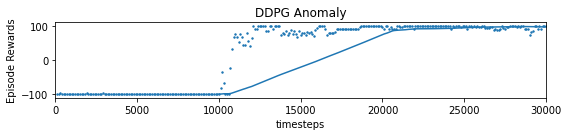

In [4]:
algorithm_name = "ddpg"
algorithm = algorithms[algorithm_name]

episode_length = 100
obs_size = 1
train_timesteps = 30000

log_dir = "tmp/"

#for i in range(4, 21):
env = gym.make("Anomaly-v6", data=data, episode_length=episode_length, obs_size=obs_size)
#print(check_env(env))
env = Monitor(env, log_dir)
obs = env.reset(force=True)
model = algorithm('MlpPolicy', env, device="cuda", train_freq = 8, learning_starts=10000)
callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir, algorithm=algorithm_name)

model.learn(total_timesteps=train_timesteps, callback=callback)

plot_results([log_dir], train_timesteps, results_plotter.X_TIMESTEPS, f"{algorithm_name.upper()} Anomaly")
plt.show()